# Programme for International Student Assessment (PISA)
## by (Haitham Essam)

## Preliminary Wrangling
This document explores a dataset of a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


## Table of content
 * Data Wrangling
     * <a href="#Gather">Gather</a>
     * <a href="#Assess">Assess</a>
     * <a href="#Clean">Clean</a>
 * <a href="#uni">Univariate Exploration</a>
 * <a href="#bi">Bivariate Exploration<a/>
 * <a href="#Multi">Multivariate Exploration</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<span id="Gather"></span>
### Gather

In [3]:
# Load dataset
pisa_df=pd.read_csv("pisa2012.csv", encoding='latin-1')

C:\Users\pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's divide data into tables to use it easier

In [4]:
pisa_df.sample(5)

Unnamed: 0      CNT  SUBNATIO  STRATUM  OECD       NC  SCHOOLID  \
76868        76869   Canada   1240000  CAN0982  OECD  Canada        104   
48199        48200  Belgium    560100  BEL0111  OECD  Belgium       229   
346667      346668   Mexico   4840000  MEX0513  OECD  Mexico       1347   
42221        42222  Belgium    560000  BEL0223  OECD  Belgium        32   
187428      187429   France   2500000  FRA0003  OECD  France        144   

        STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76  W_FSTR77  \
76868      2399       10      2.0  ...    6.8004    6.8004   21.7876   
48199      6813       10      8.0  ...    6.8293    6.8293    6.8293   
346667    30965       10      7.0  ...   22.4070   22.4070   22.4070   
42221       835       10     15.0  ...    7.6326    7.6509   22.8978   
187428     2925       10      4.0  ...  265.4734   99.7964  254.9591   

        W_FSTR78  W_FSTR79  W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
76868     6.8004   21.7876    6.8004       52        2     0.0403  22NOV13  
48199     6.8293   20.4880   20.4880       44        1     0.1159  22NOV13  
346667   22.4070    7.4690    7.4690       60        1     0.0113  22NOV13  
42221    22.8431   22.8431   22.8431       16        2     0.1295  22NOV13  
187428  105.9771  270.0870  283.7478       42        1     0.2727  22NOV13  

[5 rows x 636 columns]

In [5]:
# high-level overview of data shape and composition
print(pisa_df.shape)
pisa_df.dtypes.head(20)

(485490, 636)


Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
NC             object
SCHOOLID        int64
STIDSTD         int64
ST01Q01         int64
ST02Q01       float64
ST03Q01         int64
ST03Q02         int64
ST04Q01        object
ST05Q01        object
ST06Q01       float64
ST07Q01        object
ST07Q02        object
ST07Q03        object
ST08Q01        object
ST09Q01        object
dtype: object

In [6]:
# descriptive statistics for numeric variables
pisa_df.describe()

Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201   
std    140149.035431  2.524434e+06     278.563016    6733.144944   
min         1.000000  8.000000e+04       1.000000       1.000000   
25%    121373.250000  2.030000e+06      61.000000    1811.000000   
50%    242745.500000  4.100000e+06     136.000000    3740.000000   
75%    364117.750000  6.880000e+06     291.000000    7456.000000   
max    485490.000000  8.580000e+06    1471.000000   33806.000000   

             ST01Q01        ST02Q01        ST03Q01        ST03Q02  \
count  485490.000000  485438.000000  485490.000000  485490.000000   
mean        9.813323       2.579260       6.558512    1996.070061   
std         3.734726       2.694013       3.705244       0.255250   
min         7.000000       1.000000       1.000000    1996.000000   
25%         9.000000       1.000000       4.000000    1996.000000   
50%        10.000000       1.000000       7.000000    1996.000000   
75%        10.000000       3.000000       9.000000    1996.000000   
max        96.000000      25.000000      99.000000    1997.000000   

             ST06Q01       ST115Q01  ...       W_FSTR74       W_FSTR75  \
count  457994.000000  479269.000000  ...  485490.000000  485490.000000   
mean        6.148963       1.265356  ...      50.844201      51.020378   
std         0.970693       0.578992  ...     120.684726     122.946533   
min         4.000000       1.000000  ...       0.292900       0.292900   
25%         6.000000       1.000000  ...       4.660300       4.664800   
50%         6.000000       1.000000  ...      13.637700      13.698900   
75%         7.000000       1.000000  ...      41.233500      41.512500   
max        16.000000       4.000000  ...    2476.566800    4155.283000   

            W_FSTR76       W_FSTR77       W_FSTR78       W_FSTR79  \
count  485490.000000  485490.000000  485490.000000  485490.000000   
mean       50.943149      50.685275      51.019842      50.540724   
std       121.170883     119.267686     122.981541     119.479516   
min         0.292900       0.292900       0.292900       0.292900   
25%         4.643100       4.667000       4.675200       4.651850   
50%        13.611700      13.672100      13.731100      13.582000   
75%        41.695200      41.097300      41.189600      41.290925   
max      3743.450100    3232.163700    3904.868100    3607.478300   

            W_FSTR80       WVARSTRR       VAR_UNIT     SENWGT_STU  
count  485490.000000  485490.000000  485490.000000  485490.000000  
mean       50.721164      40.013920       1.531189       0.140054  
std       119.799018      22.951264       0.539759       0.137864  
min         0.292900       1.000000       1.000000       0.000500  
25%         4.660300      20.000000       1.000000       0.037800  
50%        13.600200      40.000000       2.000000       0.145200  
75%        41.356000      60.000000       2.000000       0.199900  
max      3412.174100      80.000000       3.000000       5.095500  

[8 rows x 268 columns]

At International Grade(ST01Q01) average students score 9.8, median and 75& is 10 and max score 96 which seems to be an outlier<br>
At International Grade(ST02Q01) max score 25 which absolutely an outlier as max is 6.

Any grade more than 6 is an outlier and we can replace it with the average<br>
Any Nan replace it with average also

In [7]:
(pisa_df.ST02Q01.isna().sum()+(pisa_df.ST02Q01>6).sum())/pisa_df.shape[0]*100

7.96926816206307

Since < 10% we can remove them

In [8]:
pisa_df.ST02Q01=pisa_df.ST02Q01.dropna()

In [9]:
pisa_df=pisa_df[pisa_df.ST02Q01 <= 6]

In [10]:
pisa_df.ST02Q01.unique()

array([1., 3., 2., 4., 5., 6.])

Let's **Test**  

In [11]:
pisa_df.ST02Q01.isna().sum()

0

In [12]:
pisa_df[pisa_df.ST02Q01>6]

Empty DataFrame
Columns: [Unnamed: 0, CNT, SUBNATIO, STRATUM, OECD, NC, SCHOOLID, STIDSTD, ST01Q01, ST02Q01, ST03Q01, ST03Q02, ST04Q01, ST05Q01, ST06Q01, ST07Q01, ST07Q02, ST07Q03, ST08Q01, ST09Q01, ST115Q01, ST11Q01, ST11Q02, ST11Q03, ST11Q04, ST11Q05, ST11Q06, ST13Q01, ST14Q01, ST14Q02, ST14Q03, ST14Q04, ST15Q01, ST17Q01, ST18Q01, ST18Q02, ST18Q03, ST18Q04, ST19Q01, ST20Q01, ST20Q02, ST20Q03, ST21Q01, ST25Q01, ST26Q01, ST26Q02, ST26Q03, ST26Q04, ST26Q05, ST26Q06, ST26Q07, ST26Q08, ST26Q09, ST26Q10, ST26Q11, ST26Q12, ST26Q13, ST26Q14, ST26Q15, ST26Q16, ST26Q17, ST27Q01, ST27Q02, ST27Q03, ST27Q04, ST27Q05, ST28Q01, ST29Q01, ST29Q02, ST29Q03, ST29Q04, ST29Q05, ST29Q06, ST29Q07, ST29Q08, ST35Q01, ST35Q02, ST35Q03, ST35Q04, ST35Q05, ST35Q06, ST37Q01, ST37Q02, ST37Q03, ST37Q04, ST37Q05, ST37Q06, ST37Q07, ST37Q08, ST42Q01, ST42Q02, ST42Q03, ST42Q04, ST42Q05, ST42Q06, ST42Q07, ST42Q08, ST42Q09, ST42Q10, ST43Q01, ...]
Index: []

[0 rows x 636 columns]

Let's examine each variable alone 

In [13]:
# How many countries participated in 2012 pisa
pisa_df.CNT.nunique()

66

In [14]:
# How many National centers that the test happen in them
pisa_df.NC.nunique()

64

In [15]:
# How many countries participate in the test but in a NC of anothr country
pisa_df[~pisa_df.CNT.isin(pisa_df.NC)].CNT.nunique()

37

There are 37 countries that have no NC

In [16]:
# How many null rows in the data
pisa_df.isnull().sum()

Unnamed: 0    0
CNT           0
SUBNATIO      0
STRATUM       0
OECD          0
             ..
W_FSTR80      0
WVARSTRR      0
VAR_UNIT      0
SENWGT_STU    0
VER_STU       0
Length: 636, dtype: int64

It is hard to understand any thing from this data let's divide it to tables

In [17]:
# Here we will explore databased on the mindset of the student
agree_disagree_col=["ST02Q01", "ST29Q03", "ST29Q04", "ST29Q05", "ST29Q06", "ST29Q07", "ST29Q08", "ST35Q01", "ST35Q02",
                    "ST35Q03", "ST35Q04", "ST35Q05", "ST35Q06", "ST42Q01", "ST42Q02", "ST42Q03", "ST42Q04", "ST42Q05", 
                    "ST42Q06", "ST42Q07", "ST42Q08", "ST42Q09", "ST42Q10", "ST43Q01", "ST43Q02", "ST43Q03", "ST43Q04",
                    "ST43Q05", "ST43Q06", "ST46Q01", "ST46Q02", "ST46Q03", "ST46Q04", "ST46Q05", "ST46Q06", "ST46Q07",
                    "ST46Q08", "ST46Q09", "ST86Q01", "ST86Q02", "ST86Q03", "ST86Q04", "ST86Q05", "ST87Q01", "ST87Q02",
                    "ST87Q03", "ST87Q04", "ST87Q05", "ST87Q06", "ST87Q07", "ST87Q08", "ST87Q09", "ST88Q01", "ST88Q02",
                    "ST88Q03", "ST88Q04", "ST89Q02", "ST89Q03", "ST89Q04", "ST89Q05", "ST91Q01", "ST91Q02", "ST91Q03",
                    "ST91Q04", "ST91Q05", "ST91Q06", "IC22Q01", "IC22Q02", "IC22Q04", "IC22Q06", "IC22Q07", "IC22Q08",
                    "ST84Q01", "ST84Q02", "ST84Q02", "ST85Q01"]
agree_disagree_df=pisa_df[agree_disagree_col]

In [18]:
# Here we will see the teacher roles to enhance the student
teacher_roles=["ST02Q01","ST77Q01", "ST77Q02", "ST77Q04", "ST77Q05", "ST77Q06", "ST79Q01", "ST79Q02", "ST79Q05", "ST79Q06",
               "ST79Q08","ST79Q11", "ST79Q12", "ST79Q15", "ST79Q17", "ST80Q01", "ST80Q04", "ST80Q05", "ST80Q06", "ST80Q07",
               "ST80Q08", "ST80Q09", "ST80Q10", "ST80Q11", "ST82Q01", "ST82Q02", "ST82Q03", "ST83Q01", "ST83Q02", "ST83Q03",
               "ST83Q04", "ST85Q02", "ST85Q03", "ST85Q04"]
teacher_roles_df=pisa_df[teacher_roles]

In [19]:
# Here we will see the student roles and what make each one different from others
student_roles=["ST02Q01","ST49Q01", "ST49Q02", "ST49Q03", "ST49Q04", "ST49Q05", "ST49Q06", "ST49Q07", "ST49Q09",
              "ST53Q01", "ST53Q02", "ST53Q03", "ST53Q04", "ST55Q01", "ST55Q02", "ST55Q03", "ST55Q04", "ST57Q01",
              "ST57Q02", "ST57Q03", "ST57Q04", "ST57Q05", "ST57Q06", "ST79Q03", "ST79Q04", "ST79Q07", "ST79Q10",
              "ST81Q01", "ST81Q02", "ST81Q03", "ST81Q04", "ST81Q05", "ST44Q01", "ST44Q03", "ST44Q04", "ST44Q05",
              "ST44Q07", "ST44Q08", "ST37Q01", "ST37Q02", "ST37Q03", "ST37Q04", "ST37Q05", "ST37Q06", "ST37Q07",
              "ST37Q08", "IC09Q02", "IC09Q03", "IC09Q07", "EC03Q01", "EC03Q02", "EC03Q03", "EC03Q04", "EC03Q05", 
              "EC03Q06", "EC03Q07", "ST96Q02", "ST96Q03", "ST96Q05", "ST101Q01", "ST101Q02", "ST101Q03", "ST101Q05",
              "ST104Q01", "ST104Q04", "ST104Q05", "ST104Q06"]
student_roles_df=pisa_df[student_roles]

In [20]:
# Here we will see the whether the facilities affects the grades or not
facilities=["ST02Q01", "IC01Q01", "IC01Q02", "IC01Q03", "IC01Q04", "IC01Q05", "IC01Q06", "IC01Q07", "IC01Q08", 
            "IC01Q09", "IC01Q10", "IC01Q11", "IC02Q01", "IC02Q02", "IC02Q03", "IC02Q04", "IC02Q05", "IC02Q06", 
            "IC02Q07", "ST26Q01", "ST26Q02", "ST26Q03", "ST27Q01", "ST27Q02", "ST27Q03", "ST27Q04", "ST27Q05", 
            "ST28Q01", "ST29Q01", "ST29Q02"
    
]
facilities_df=pisa_df[facilities]

---

In [21]:
# How many duplicated rows in the data
pisa_df.duplicated().sum()

0

<span id="Assess"></span>
### Assess

`Quality`
 * columns are in uppercase instead of the lowercase

`Tidy`
 * index column is duplicated with name "Unnamed: 0"
 * Make new tables
 * rename column to to be representative 

Dependent variables ==> ST02Q01(pisa grade 1-->6)   

### What is the structure of your dataset?
There are 485490 students in the dataset with 636 
you can take a look at them at "pisadict2012.csv"


The survey was branched to different branches or questions. We are interested in ==> agree or disagree, Attributions to Failure, Math Behaviour, Learning Strategies, Teacher and there roles, the student and his mindset and Facilities at home and school.

We have some ordinal data as agree or disagree (Strongly agree > Agree > Disagree > Strongly disagree)

Most variables are numeric in nature about 268.


### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for studying and what the superior students do.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think teacher and student's mindset have a great impact on the student and his grade, studying hour +ve relation with grade.



<span id="Cleaning"></span>
### Cleaning

In [22]:
# copy the df
agree_disagree_df_clean=agree_disagree_df.copy()
teacher_roles_df_clean=teacher_roles_df.copy()
student_roles_df_clean=student_roles_df.copy()
facilities_df_clean=facilities_df.copy()

#### Define
the columns in `agree_disagree_df_clean` doesn't representatives

#### Code

In [23]:
# renaming the columns
agree_disagree_df_clean=agree_disagree_df_clean.rename(columns={
    "ST02Q01":"grade", "ST29Q03":"look_forward_to_lessons", "ST29Q04":"enjoy_maths", "ST29Q05":"worthwhile_for_career_chances ",
    "ST29Q06":"interested_in_math", "ST29Q07":"important_for_future_study", "ST29Q08":"helps_to_get_a_job",
    "ST35Q01":"friends_do_well_in_mathematics","ST35Q02":"friends_work_hard_on_mathematics","ST35Q03":"friends_enjoy_mathematics_tests",
    "ST35Q04":"parents_believe_studying_mathematics_is_important", "ST35Q05":"parents_believe_mathematics_is_important_for_career",
    "ST35Q06":"parents_like_mathematics", "ST42Q01":"worry_that_it_will_be_difficult", "ST42Q02":"believe_not_good_at_maths",
    "ST42Q03":"very_tense_math", "ST42Q04":'believe_good_grades_in_math', "ST42Q05":"very_nervous_math","ST42Q06":"learn_quickly_math",
    "ST42Q07":"math_one_of_best_subjects", "ST42Q08":"feel_helpless", "ST42Q09":"understand_difficult_work", "ST42Q10":"worry_about_getting_poor_grades",
    "ST43Q01":"can_succeed_with_enough_effort", "ST43Q02":"doing_well_is_completely_up_to_me", "ST43Q03":"family_demands_and_problems",
    "ST43Q04":"different_teachers","ST43Q05":"if_i_wanted_i_could_perform_well", "ST43Q06":"perform_poorly_regardless",
    "ST46Q01":"homework_completed_in_time", "ST46Q02":"work_hard_on_homework", "ST46Q03":"prepared_for_exams", "ST46Q04":"study_hard_for_quizzes",
    "ST46Q05":"study_until_i_understand_everything", "ST46Q06":"pay_attention_in_classes", "ST46Q07":"listen_in_classes",
    "ST46Q08":"avoid_distractions_when_studying", "ST46Q09":"keep_work_organized", "ST86Q01":"get_along_with_teachers",
    "ST86Q02":"teachers_are_interested", "ST86Q03":"teachers_listen_to_students", "ST86Q04":"teachers_help_students",
    "ST86Q05":"teachers_treat_students_fair", "ST87Q01":"feel_like_outsider", "ST87Q02":"make_friends_easily",
    "ST87Q03":"belong_at_school", "ST87Q04":"feel_awkward_at_school", "ST87Q05":"liked_by_other_students",
    "ST87Q06":"feel_lonely_at_school", "ST87Q07":"feel_happy_at_school", "ST87Q08":"things_are_ideal_at_school",
    "ST87Q09":"satisfied_at_school", "ST88Q01":"does_little_to_prepare_me_for_life", "ST88Q02":"waste_of_time",
    "ST88Q03":"gave_me_confidence", "ST88Q04":"useful_for_job", "ST89Q02":"sc_helps_to_get_a_job", "ST89Q03":"prepare_for_college",
    "ST89Q04":"enjoy_good_grades", "ST89Q05":"trying_hard_is_important", "ST91Q01":"can_succeed_with_enough_effort_school",
    "ST91Q02":"my_choice_whether_i_will_be_good", "ST91Q03":"problems_prevent_from_putting_effort_into_school",
    "ST91Q04":"different_teachers_would_make_me_try_harder", "ST91Q05":"could_perform_well_if_i_wanted", 
    "ST91Q06":"perform_poor_regardless", "IC22Q01":"useful_for_schoolwork", "IC22Q02":"homework_more_fun",
    "IC22Q04":"source_of_information", "IC22Q06":"troublesome", "IC22Q07":"not_suitable_for_schoolwork", "IC22Q08":"too_unreliable",
    "ST84Q01":"students_frequently_interrupt/teacher_arrives_early", "ST84Q02":"students_are_calm/teacher_arrives_on_time",
    "ST84Q03":"students_frequently_Interrupt/teacher_Arrives_late", "ST85Q01":"students_listen"
    
    
})

#### Test

In [24]:
agree_disagree_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446800 entries, 0 to 485489
Data columns (total 76 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   grade                                                446800 non-null  float64
 1   look_forward_to_lessons                              290099 non-null  object 
 2   enjoy_maths                                          289937 non-null  object 
 3   worthwhile_for_career_chances                        290389 non-null  object 
 4   interested_in_math                                   289925 non-null  object 
 5   important_for_future_study                           290244 non-null  object 
 6   helps_to_get_a_job                                   290407 non-null  object 
 7   friends_do_well_in_mathematics                       290998 non-null  object 
 8   friends_work_hard_on_mathematics                     2

#### Define
the columns in `teacher_roles_df_clean` doesn't representatives

#### Code

In [25]:
# The list that contains the new name of the columns in order
teacher_col=["grade", "shows_interest ", "extra_help", "helps", "continues", "express_opinions", "sets_clear_goals",
             "encourages_thinking_and_reasoning", "gives_feedback", "checks_understanding", "summarizes_previous_lessons",
            "gives_feedback_on_strengths_and_weaknesses", "informs_about_expectations", "informs_about_learning_goals",
            "tells_how_to_get_better", "teacher_encourages_to_reflect_problems", "gives_problems_that_require_to_think",
            "asks_to_use_own_procedures", "presents_problems_with_no_obvious_solutions", "presents_problems_in_different_contexts",
            "helps_learn_from_mistakes", "asks_for_explanations", "apply_what_we_learned", "problems_with_multiple_solutions",
            "hw_every_day_back_in_time", "hw_once_a_week_back_in_time", "hw_once_a_week_not_Back_in_time",
            "lets_us_know_we_have_to_work_hard", "provides_extra_help_when_needed", "helps_students_with_learning",
            "gives_opportunity_to_express_opinions", "keeps_class_orderly", "starts_on_time", "wait_long_to_quiet_down"]

teacher_dict=dict()
for old, new in zip(teacher_roles ,teacher_col):
    teacher_dict[old]=new
    
teacher_roles_df_clean=teacher_roles_df_clean.rename(columns=teacher_dict)

#### Test

In [26]:
teacher_roles_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446800 entries, 0 to 485489
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   grade                                        446800 non-null  float64
 1   shows_interest                               290348 non-null  object 
 2   extra_help                                   290024 non-null  object 
 3   helps                                        289553 non-null  object 
 4   continues                                    289953 non-null  object 
 5   express_opinions                             289949 non-null  object 
 6   sets_clear_goals                             290035 non-null  object 
 7   encourages_thinking_and_reasoning            289489 non-null  object 
 8   gives_feedback                               288866 non-null  object 
 9   checks_understanding                         289087 non-nul

#### Define
the columns in `student_roles_df_clean` doesn't representatives

In [27]:
# The list that contains the new name of the columns in order
# p==>what did he do when facing a problem
student_col=["grade", "talk_about_maths_with_friends", "help_friends_with_maths", "extracurricular_activity",
             "participate_in_competitions", "study_more_than_2_extra_hours_a_day", "play_chess", "computer_programming",
            "participate_in_math_club", "important_parts_vs._existing_knowledge_vs._learn_by_heart",
            "improve_understanding_vs._new_ways_vs._memory", "other_subjects_vs._learning_goals_vs._rehearse_problems",
            "repeat_examples_vs._everyday_applications_vs._more_information", "test_lang", "maths", "science", "other",
            "homework", "guided_homework", "personal_tutor", "commercial_company", "with_parent", "computer",
            "differentiates_between_students_when_giving_tasks", "assigns_complex_projects",
             "has_students_work_in_small_groups", "plans_classroom_activities","students_don’t_listen", "noise_and_disorder",
            "teacher_has_to_wait_until_its_quiet", "students_don’t_work_well", "students_start_working_late",
            "af_not_good_at_maths_problems", "af_teacher_did_not_explain_well", "af_bad_guesses", "af_material_too_hard",
            "af_teacher_did'nt_get_students_interested", "af_unlucky", "cf_using_a_train_timetable", "cf_calculating_tV_discount",
            "cf_calculating_square_metres_of_tiles", "cf_understanding_graphs_in_newspapers", "cf_solving_equation_1", 
            "cf_distance_to_scale", "cf_solving_equation_2", "cf_calculate_petrol_consumption_rate", "email_students",
            "email_teachers", "share_school_material","internship", "work_site_visits", "job_fair", "career_advisor_at_school", 
            "career_advisor_outside_school", "questionnaire", "internet_search", "p_trace_steps", "Manual", "ask_a_friend", 
            "read_brochure", "study_map", "leave_it_to_brother", "just_drive", "similarities", "try_buttons", "ask_for_help",
            "find_ticket_office"]

student_dict=dict()
for old, new in zip(student_roles ,student_col):
    student_dict[old]=new
    
student_roles_df_clean=student_roles_df_clean.rename(columns=student_dict)

#### Test

In [28]:
student_roles_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446800 entries, 0 to 485489
Data columns (total 67 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   grade                                                           446800 non-null  float64
 1   talk_about_maths_with_friends                                   288704 non-null  object 
 2   help_friends_with_maths                                         288268 non-null  object 
 3   extracurricular_activity                                        287470 non-null  object 
 4   participate_in_competitions                                     287661 non-null  object 
 5   study_more_than_2_extra_hours_a_day                             287873 non-null  object 
 6   play_chess                                                      287844 non-null  object 
 7   computer_programming                  

#### Define
the columns in `facilities_df_clean` doesn't representatives

#### Code


In [29]:
# The list that contains the new name of the columns in order
# h ==> Home , s ==> school, N ==> Number
facilities_col=["grade", "h_pc", "h_laptop", "h_tablet", "h_internet", "h_video_games", "h_cell_phone_w/o_internet",
                "h_cell_phone_with_internet", "h_mp3/mp4_player", "h_printer", "h_usb_(memory)_stick", "h_ebook_reader",
                "s_pc", "s_laptop", "s_tablet", "s_internet", "s_printer", "s_usb_(memory)_stick", "s_ebook_reader",
                "desk", "own_room", "study_place", "N_cellular_phones", "N_televisions", "N_computers", "N_cars",
                "N_rooms_bath_or_shower", "N_books_at_home", "enjoy_Reading", "worthwhile_for_work"]

facilities_dict=dict()
for old, new in zip(facilities ,facilities_col):
    facilities_dict[old]=new
    
facilities_df_clean=facilities_df_clean.rename(columns=facilities_dict)

#### Test

In [30]:
facilities_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446800 entries, 0 to 485489
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   grade                       446800 non-null  float64
 1   h_pc                        264530 non-null  object 
 2   h_laptop                    264599 non-null  object 
 3   h_tablet                    263285 non-null  object 
 4   h_internet                  264839 non-null  object 
 5   h_video_games               264197 non-null  object 
 6   h_cell_phone_w/o_internet   262677 non-null  object 
 7   h_cell_phone_with_internet  263805 non-null  object 
 8   h_mp3/mp4_player            264651 non-null  object 
 9   h_printer                   264392 non-null  object 
 10  h_usb_(memory)_stick        264966 non-null  object 
 11  h_ebook_reader              262956 non-null  object 
 12  s_pc                        264510 non-null  object 
 13  s_laptop      

**Lets assess the data once more** 

Let's start with the first table `agree_disagree_df_clean`

In [31]:
# check for nulls in columns
agree_disagree_df_clean.isnull().sum()

grade                                                       0
look_forward_to_lessons                                156701
enjoy_maths                                            156863
worthwhile_for_career_chances                          156411
interested_in_math                                     156875
                                                        ...  
too_unreliable                                         189465
students_frequently_interrupt/teacher_arrives_early    160356
students_are_calm/teacher_arrives_on_time              159968
students_are_calm/teacher_arrives_on_time              159968
students_listen                                        159025
Length: 76, dtype: int64

In [32]:
# Show the descriptive statistics
agree_disagree_df_clean.describe()

grade
count  446800.000000
mean        1.948138
std         1.354744
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000

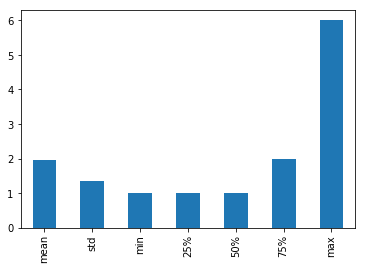

In [33]:
# Show the descriptive statistics visually
agree_disagree_df_clean.describe()[1:].plot(kind="bar", legend=False);

According to [this discuss](https://discuss.analyticsvidhya.com/t/how-to-handle-missing-values-of-categorical-variables/310) about how to deal with null categorical data I will Treat missing data as just another category

Let's assess the second table `teacher_roles_df_clean`

In [34]:
# check for nulls in columns
teacher_roles_df_clean.isnull().sum()

grade                                               0
shows_interest                                 156452
extra_help                                     156776
helps                                          157247
continues                                      156847
express_opinions                               156851
sets_clear_goals                               156765
encourages_thinking_and_reasoning              157311
gives_feedback                                 157934
checks_understanding                           157713
summarizes_previous_lessons                    157456
gives_feedback_on_strengths_and_weaknesses     157805
informs_about_expectations                     158093
informs_about_learning_goals                   157747
tells_how_to_get_better                        157560
teacher_encourages_to_reflect_problems         157443
gives_problems_that_require_to_think           158062
asks_to_use_own_procedures                     158885
presents_problems_with_no_ob

In [35]:
# Show the descriptive statistics
teacher_roles_df_clean.describe()

grade
count  446800.000000
mean        1.948138
std         1.354744
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000

Let's assess the next table `student_roles_df_clean`

In [36]:
# check for nulls in columns
student_roles_df_clean.isnull().sum()

grade                                 0
talk_about_maths_with_friends    158096
help_friends_with_maths          158532
extracurricular_activity         159330
participate_in_competitions      159139
                                  ...  
just_drive                       160808
similarities                     161018
try_buttons                      161471
ask_for_help                     161083
find_ticket_office               161260
Length: 67, dtype: int64

In [37]:
# Show the descriptive statistics
student_roles_df_clean.describe()

grade       homework  guided_homework  personal_tutor  \
count  446800.000000  277189.000000    248161.000000   261625.000000   
mean        1.948138       5.555058         1.640387        0.983476   
std         1.354744       5.458424         2.617050        2.187582   
min         1.000000       0.000000         0.000000        0.000000   
25%         1.000000       2.000000         0.000000        0.000000   
50%         1.000000       4.000000         1.000000        0.000000   
75%         2.000000       7.000000         2.000000        1.000000   
max         6.000000      30.000000        30.000000       30.000000   

       commercial_company    with_parent       computer  read_brochure  \
count        257811.00000  266527.000000  266309.000000  286572.000000   
mean              0.95385       1.212091       1.573176       1.835232   
std               2.41756       2.360516       2.748239       0.888366   
min               0.00000       0.000000       0.000000       1.000000   
25%               0.00000       0.000000       0.000000       1.000000   
50%               0.00000       0.000000       1.000000       2.000000   
75%               1.00000       2.000000       2.000000       2.000000   
max              30.00000      30.000000      30.000000       4.000000   

           study_map  leave_it_to_brother     just_drive   similarities  \
count  286217.000000        285686.000000  285992.000000  285782.000000   
mean        2.020603             2.827237       2.187974       1.886088   
std         0.910948             0.970520       0.908871       0.804523   
min         1.000000             1.000000       1.000000       1.000000   
25%         1.000000             2.000000       2.000000       1.000000   
50%         2.000000             3.000000       2.000000       2.000000   
75%         3.000000             4.000000       3.000000       2.000000   
max         4.000000             4.000000       4.000000       4.000000   

         try_buttons   ask_for_help  find_ticket_office  
count  285329.000000  285717.000000       285540.000000  
mean        2.832281       1.959386            1.926227  
std         0.997903       0.879722            0.850315  
min         1.000000       1.000000            1.000000  
25%         2.000000       1.000000            1.000000  
50%         3.000000       2.000000            2.000000  
75%         4.000000       2.000000            2.000000  
max         4.000000       4.000000            4.000000

We will every null in the numeric data with its average

In [38]:
for col in student_roles_df_clean.describe().columns:
    mask = student_roles_df_clean[col].isna()
    student_roles_df_clean.loc[mask,col]=np.ceil(student_roles_df_clean[col].mean())

Let's assess the last table `facilities_df_clean`

In [39]:
# check for nulls in columns
facilities_df_clean.isnull().sum()

grade                              0
h_pc                          182270
h_laptop                      182201
h_tablet                      183515
h_internet                    181961
h_video_games                 182603
h_cell_phone_w/o_internet     184123
h_cell_phone_with_internet    182995
h_mp3/mp4_player              182149
h_printer                     182408
h_usb_(memory)_stick          181834
h_ebook_reader                183844
s_pc                          182290
s_laptop                      183462
s_tablet                      184310
s_internet                    182316
s_printer                     183006
s_usb_(memory)_stick          183259
s_ebook_reader                184609
desk                           11392
own_room                       14214
study_place                    12369
N_cellular_phones               7679
N_televisions                   8078
N_computers                    11015
N_cars                         11934
N_rooms_bath_or_shower         14396
N

In [40]:
# Show the descriptive statistics
facilities_df_clean.describe()

grade
count  446800.000000
mean        1.948138
std         1.354744
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000

<span id="uni"><span/>
## Univariate Exploration


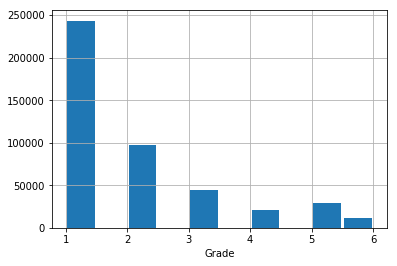

In [41]:
# Let's see the distribution of the grade
pisa_df.ST02Q01.hist(rwidth=0.9);
plt.xlabel("Grade");

Most popular grade is 1 and least one is 6<br>
The grade will be less popular as it increases

In [42]:
# convert the degree of agree columns in the table into ordered categorical types
student_ideas=["worry_that_it_will_be_difficult", "believe_not_good_at_maths", "very_tense_math", "believe_good_grades_in_math",
              "very_nervous_math", "learn_quickly_math", "math_one_of_best_subjects", "feel_helpless", "understand_difficult_work",
              "worry_about_getting_poor_grades", "can_succeed_with_enough_effort", "doing_well_is_completely_up_to_me",
              "family_demands_and_problems", "different_teachers", "if_i_wanted_i_could_perform_well", "perform_poorly_regardless"]

ordinal_var_dict = {}

for col in student_ideas:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

In [43]:
# Let's test
agree_disagree_df_clean.worry_that_it_will_be_difficult.unique()

['Agree', NaN, 'Strongly agree', 'Disagree', 'Strongly disagree']
Categories (4, object): ['Strongly disagree' < 'Disagree' < 'Agree' < 'Strongly agree']

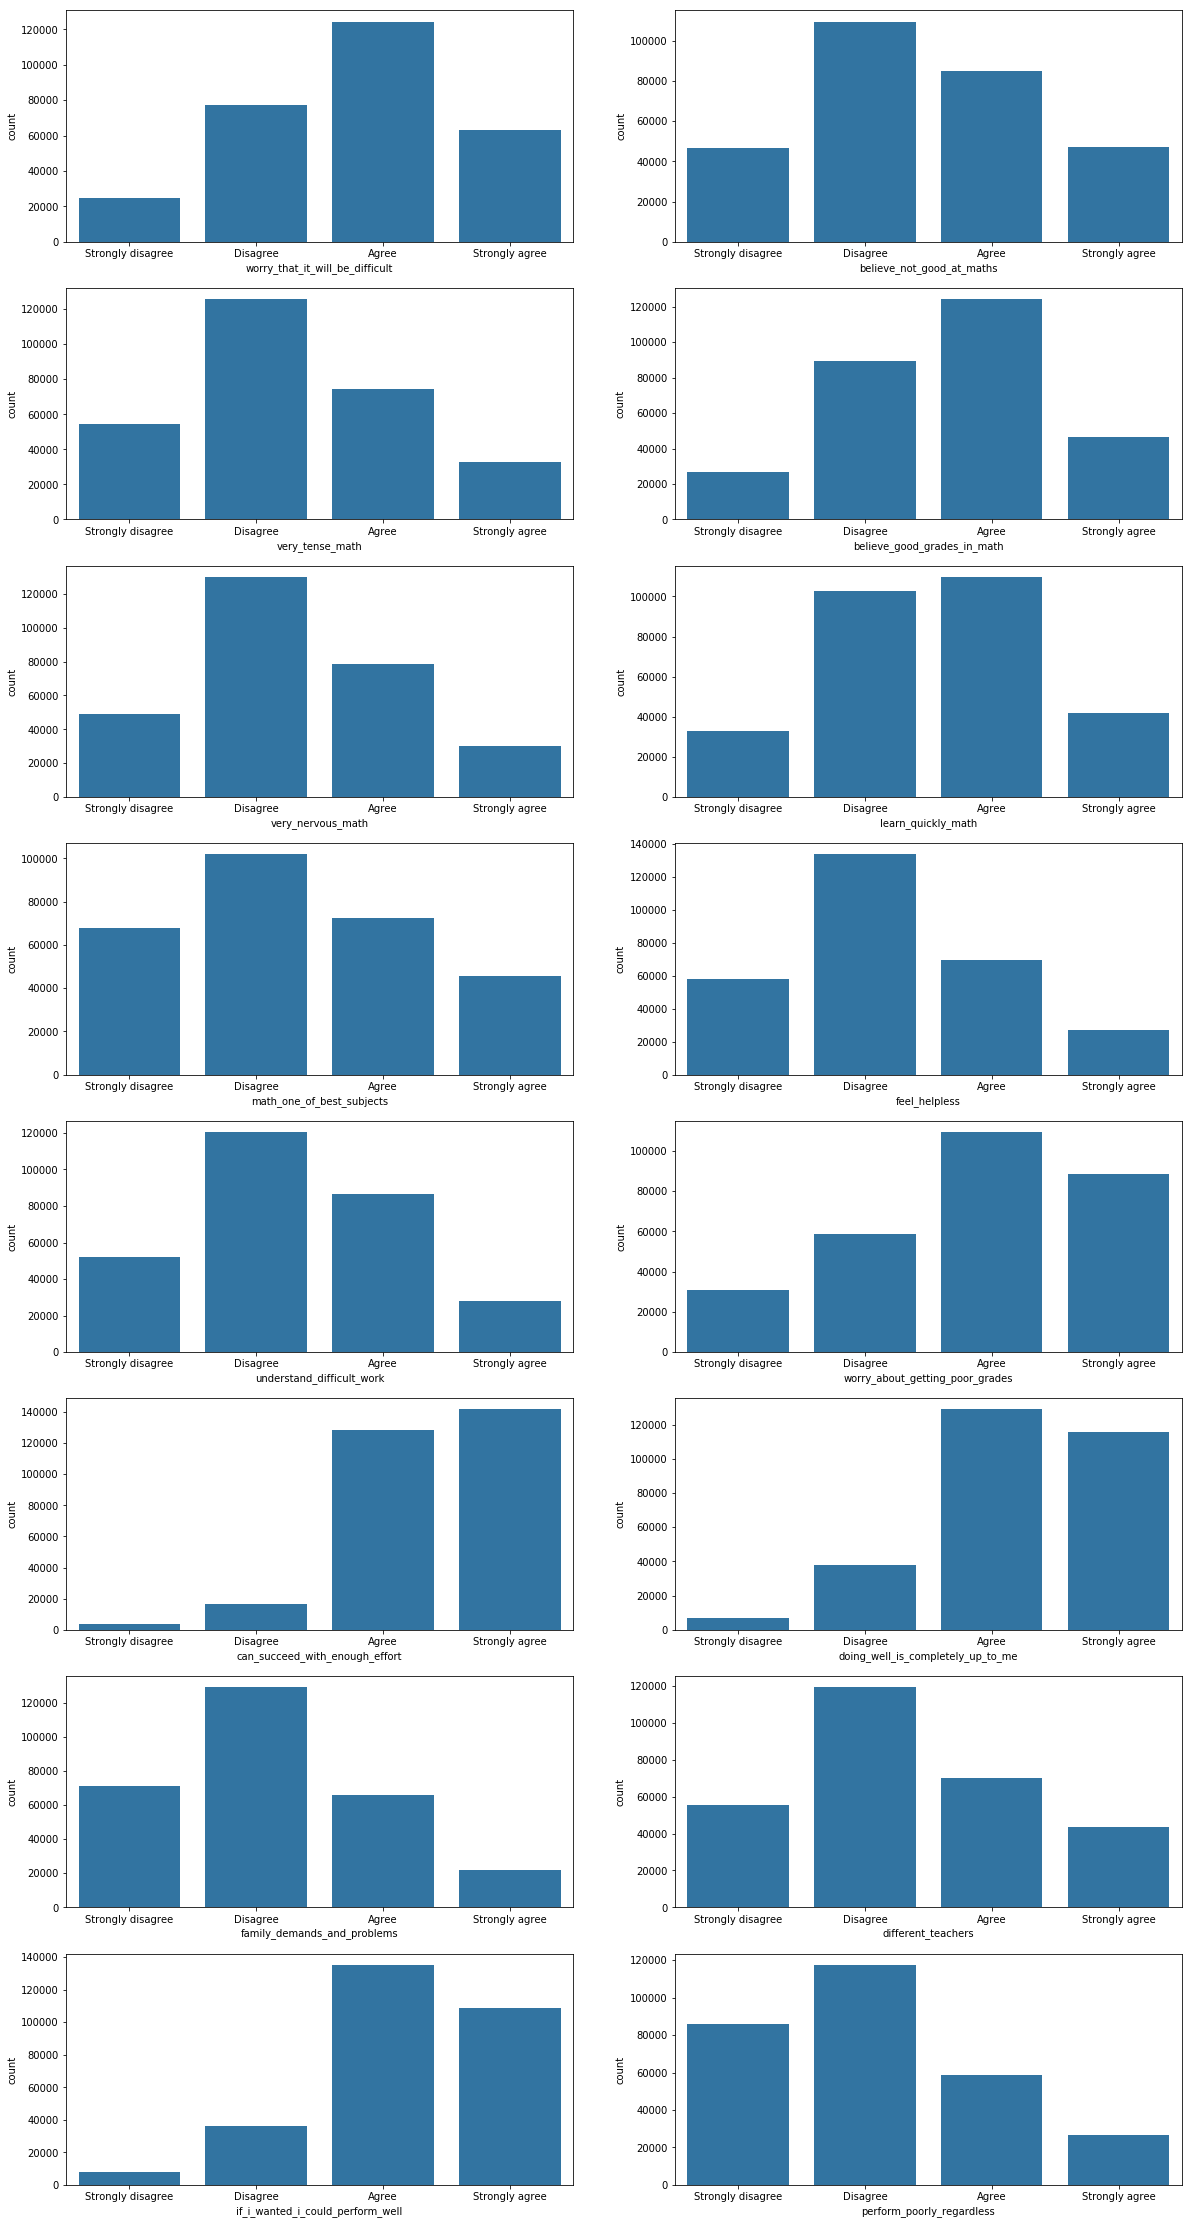

In [44]:
# Let's explore student idea about subjects

nrows=int(np.ceil(len(student_ideas)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(student_ideas)):#enumerate(student_ideas): 
    sb.countplot(data = agree_disagree_df_clean, x = student_ideas[i], color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Many student afraid of the exam, worry that it will be difficult and worry about poor grades although they are confident and believe good grades in math, believe if they want they could perform well, believe that doing well is completely up to him,  and can succeed with enough effort

Students aren't nervous or very tense, doesn't think that they perform poorly regardless

Most student doesn't like math or it is just not their best subject

----

In [45]:
# convert the degree of agree columns in the table into ordered categorical types
student_effort=["homework_completed_in_time", "work_hard_on_homework", "prepared_for_exams", "study_hard_for_quizzes", 
               "study_until_i_understand_everything", "pay_attention_in_classes", "listen_in_classes", 
                "avoid_distractions_when_studying", "keep_work_organized"]

ordinal_var_dict = {}

for col in student_effort:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

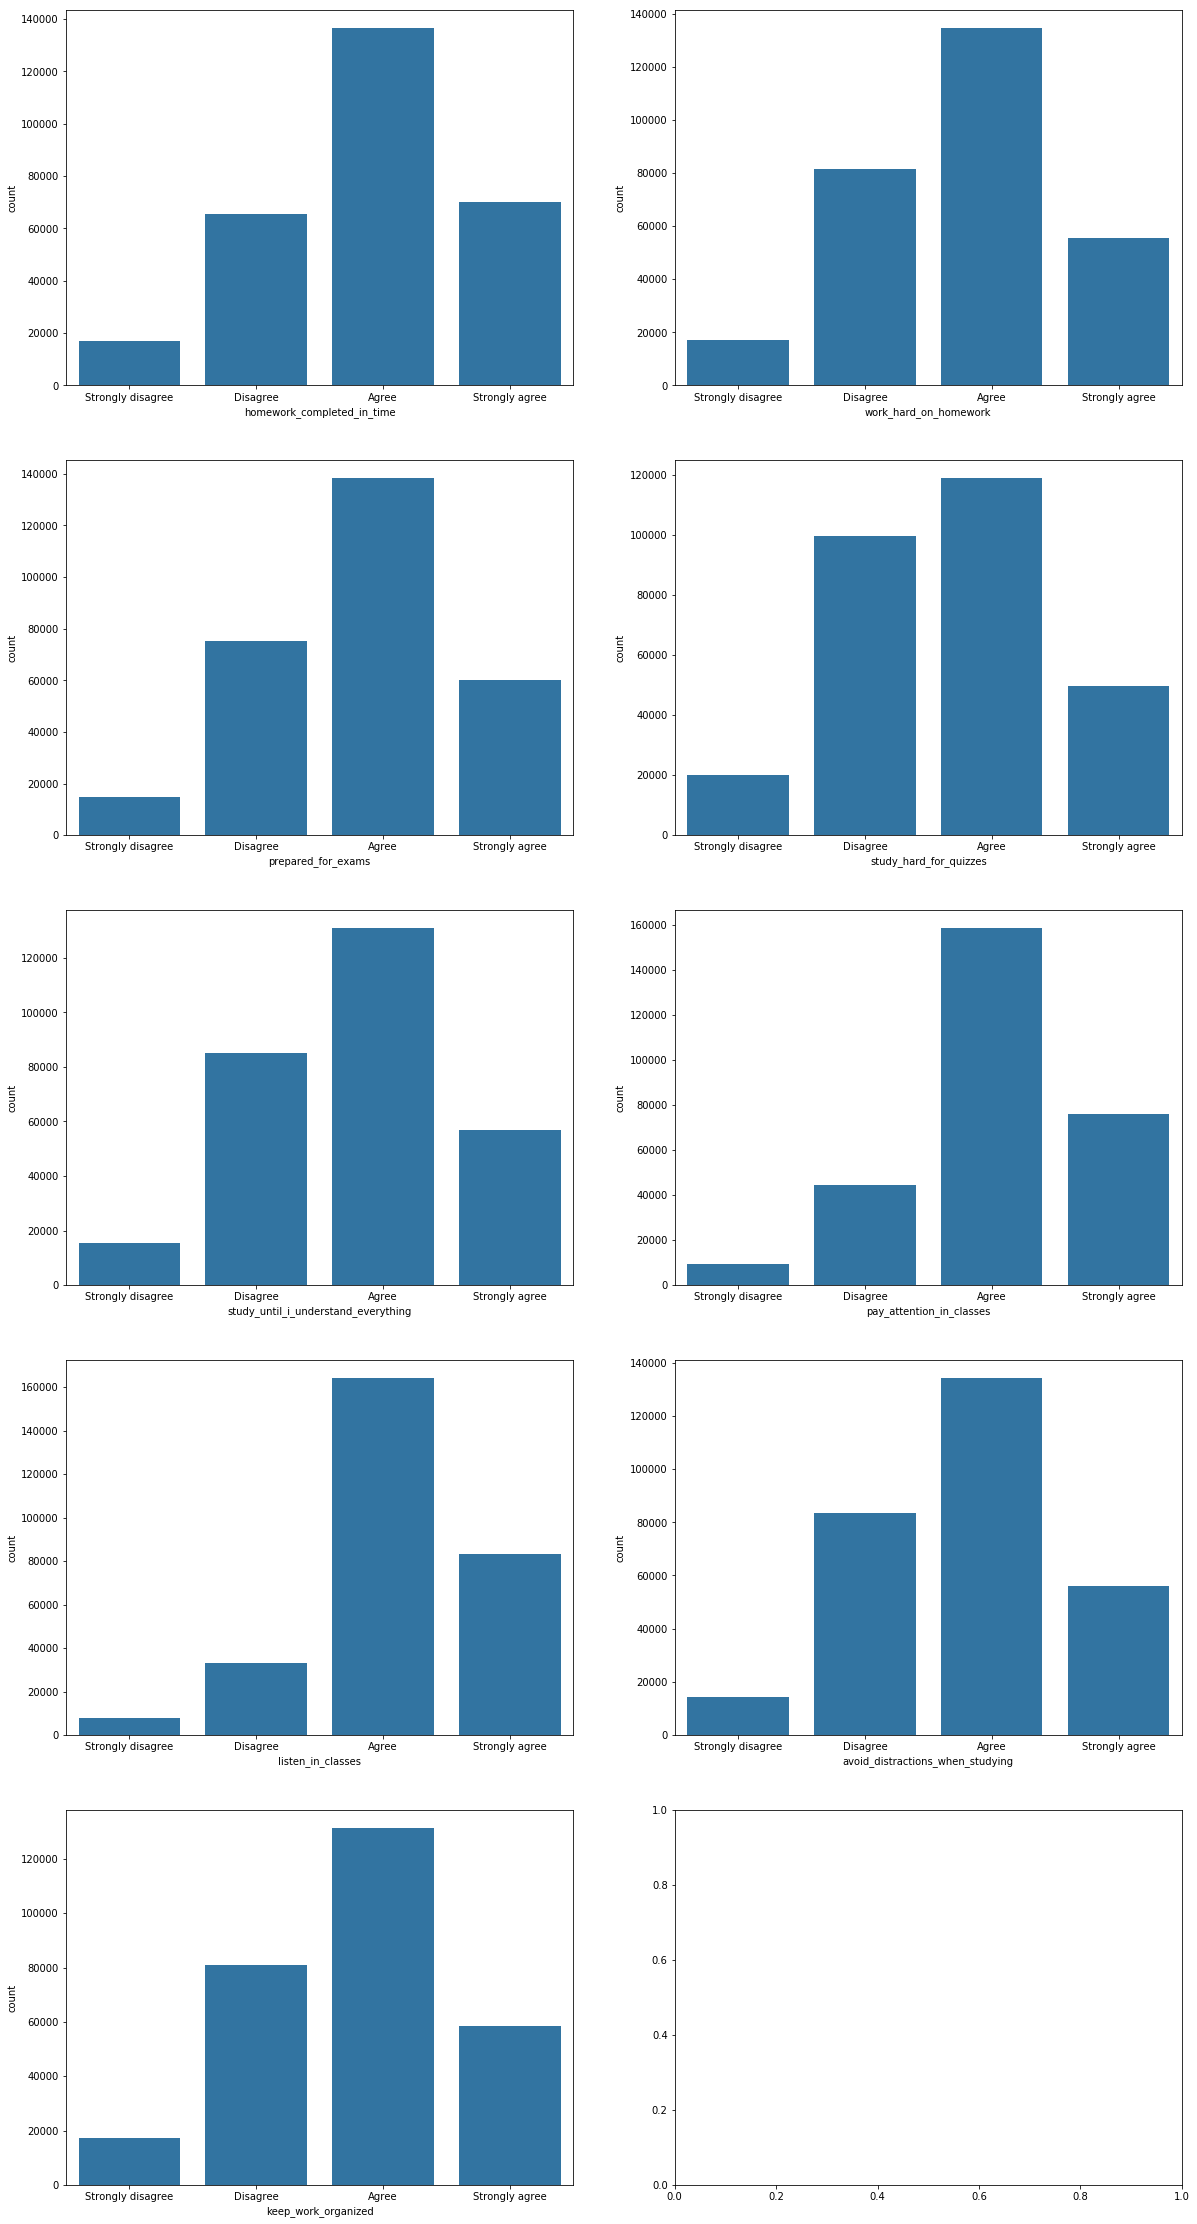

In [46]:
# Let's explore student effort about subjects

nrows=int(np.ceil(len(student_effort)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(student_effort)):
    sb.countplot(data = agree_disagree_df_clean, x = student_effort[i], color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

It seems that the students in this data are disciplined or they believe that, we need to know whether that affects the grades or not and which factor or effort has the highest impact.

___


In [47]:
# convert the degree of agree columns in the table into ordered categorical types
student_relation=["get_along_with_teachers", "teachers_are_interested", "teachers_listen_to_students", 
                 "teachers_help_students", "teachers_treat_students_fair", "feel_awkward_at_school", "liked_by_other_students",
                 "feel_like_outsider", "make_friends_easily", "belong_at_school", 
                 "feel_lonely_at_school", "feel_happy_at_school", "things_are_ideal_at_school", "satisfied_at_school"]

ordinal_var_dict = {}

for col in student_relation:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

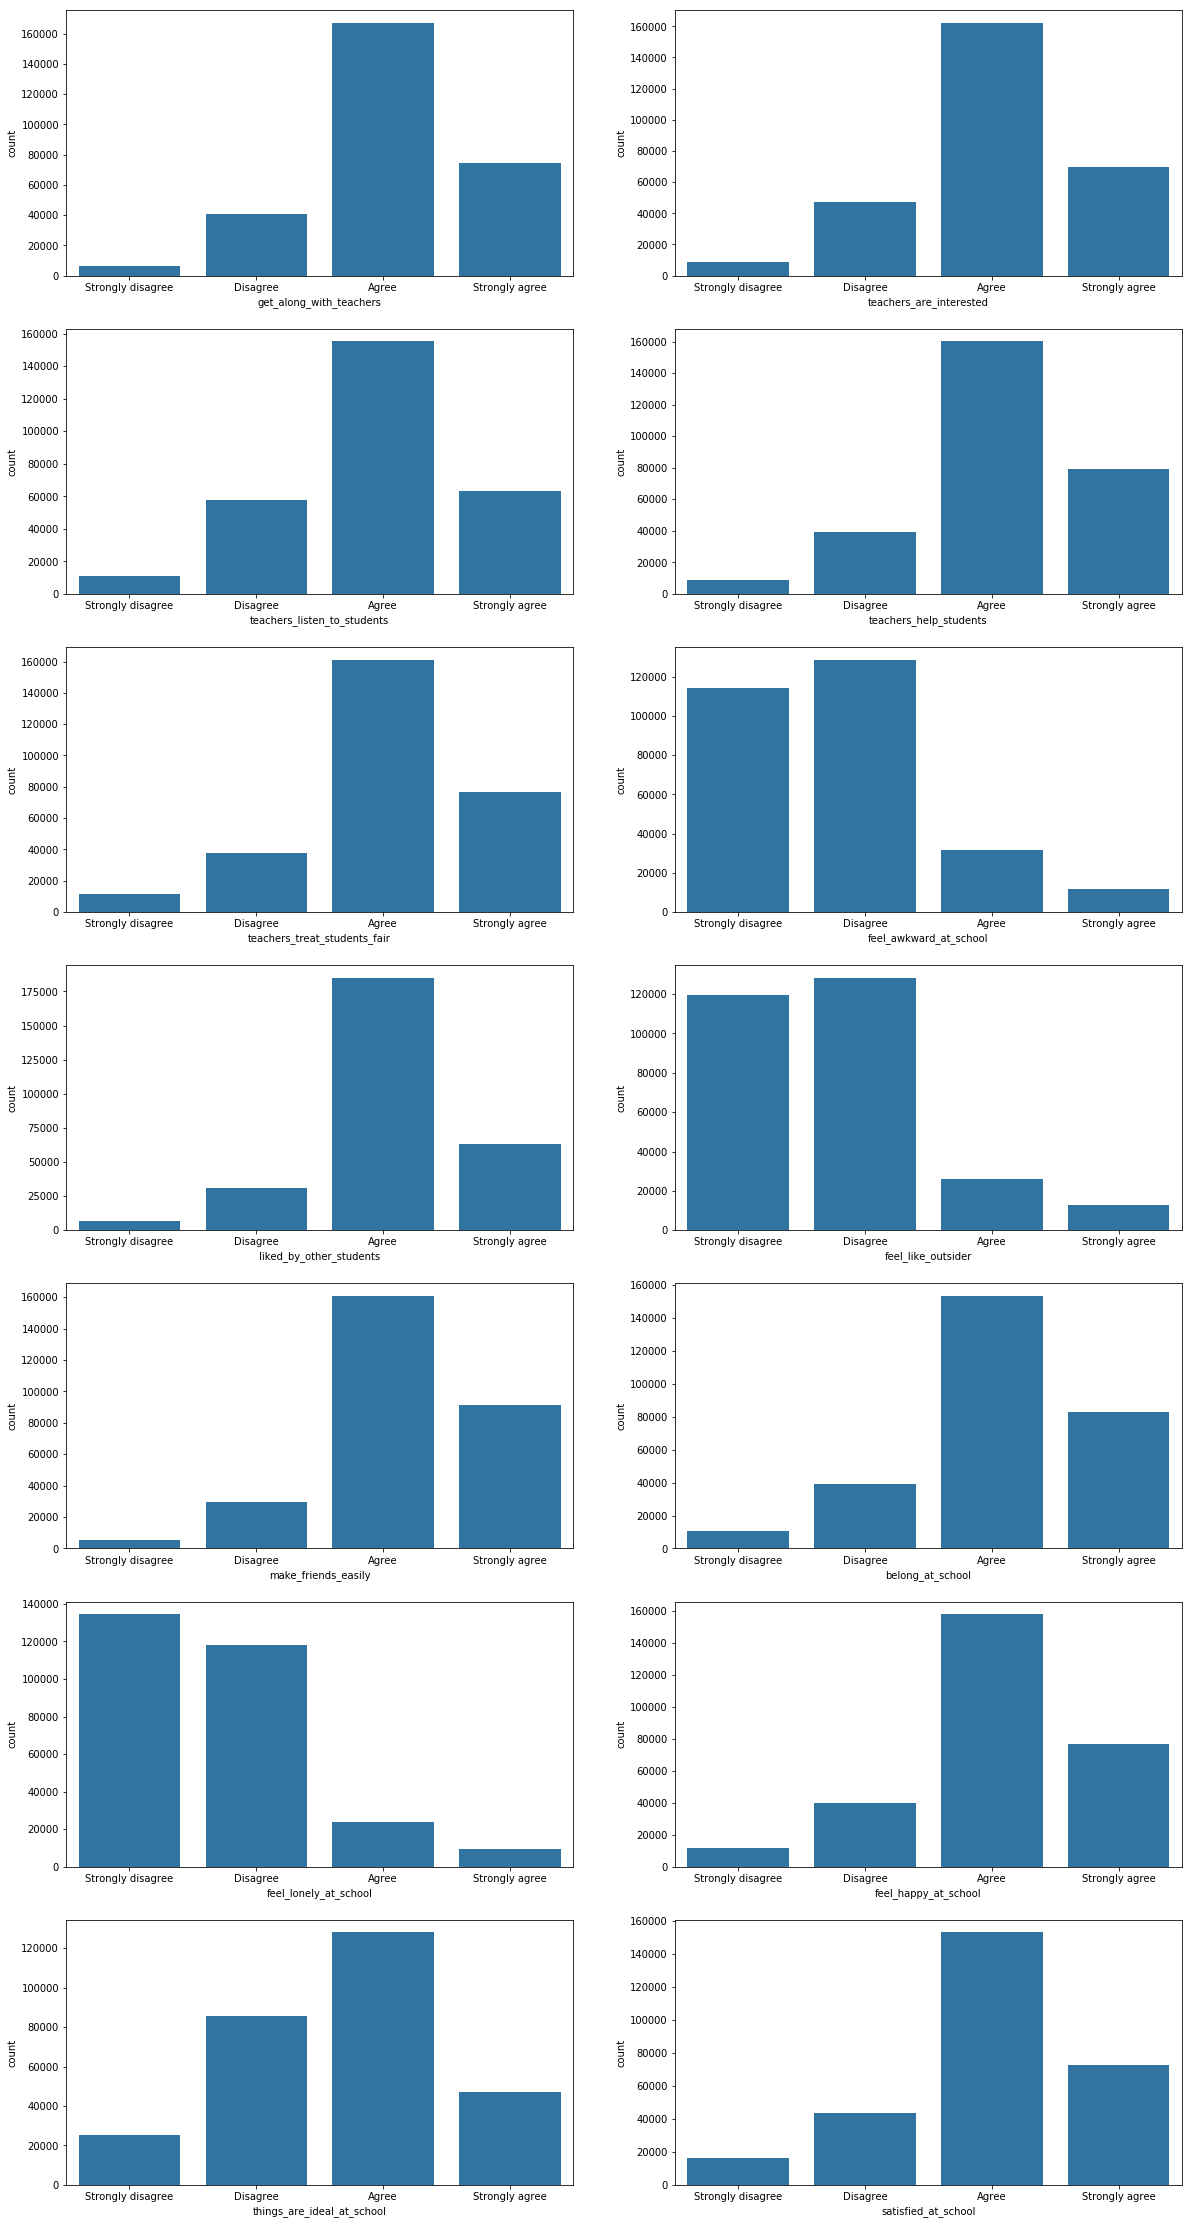

In [48]:
# Let's explore student effort about subjects

nrows=int(np.ceil(len(student_relation)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(student_relation)): 
    sb.countplot(data = agree_disagree_df_clean, x = student_relation[i], color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

It seems that the students in this data are social -have a good relation with their friends and teachers-, feel to be belonged to the school or they believe that

_____________

In [49]:
# convert the degree of agree columns in the table into ordered categorical types
student_sch_thought_attitude=["does_little_to_prepare_me_for_life", "waste_of_time", "gave_me_confidence", "useful_for_job",
                            "sc_helps_to_get_a_job", "prepare_for_college", "enjoy_good_grades", "trying_hard_is_important",
                            "can_succeed_with_enough_effort_school", "my_choice_whether_i_will_be_good", 
                            "problems_prevent_from_putting_effort_into_school", "different_teachers_would_make_me_try_harder",
                            "could_perform_well_if_i_wanted", "perform_poor_regardless", "useful_for_schoolwork", 
                            "homework_more_fun", "source_of_information", "troublesome", "not_suitable_for_schoolwork",
                            "too_unreliable"]

ordinal_var_dict = {}

for col in student_sch_thought_attitude:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    agree_disagree_df_clean[var] = agree_disagree_df_clean[var].astype(ordered_var)

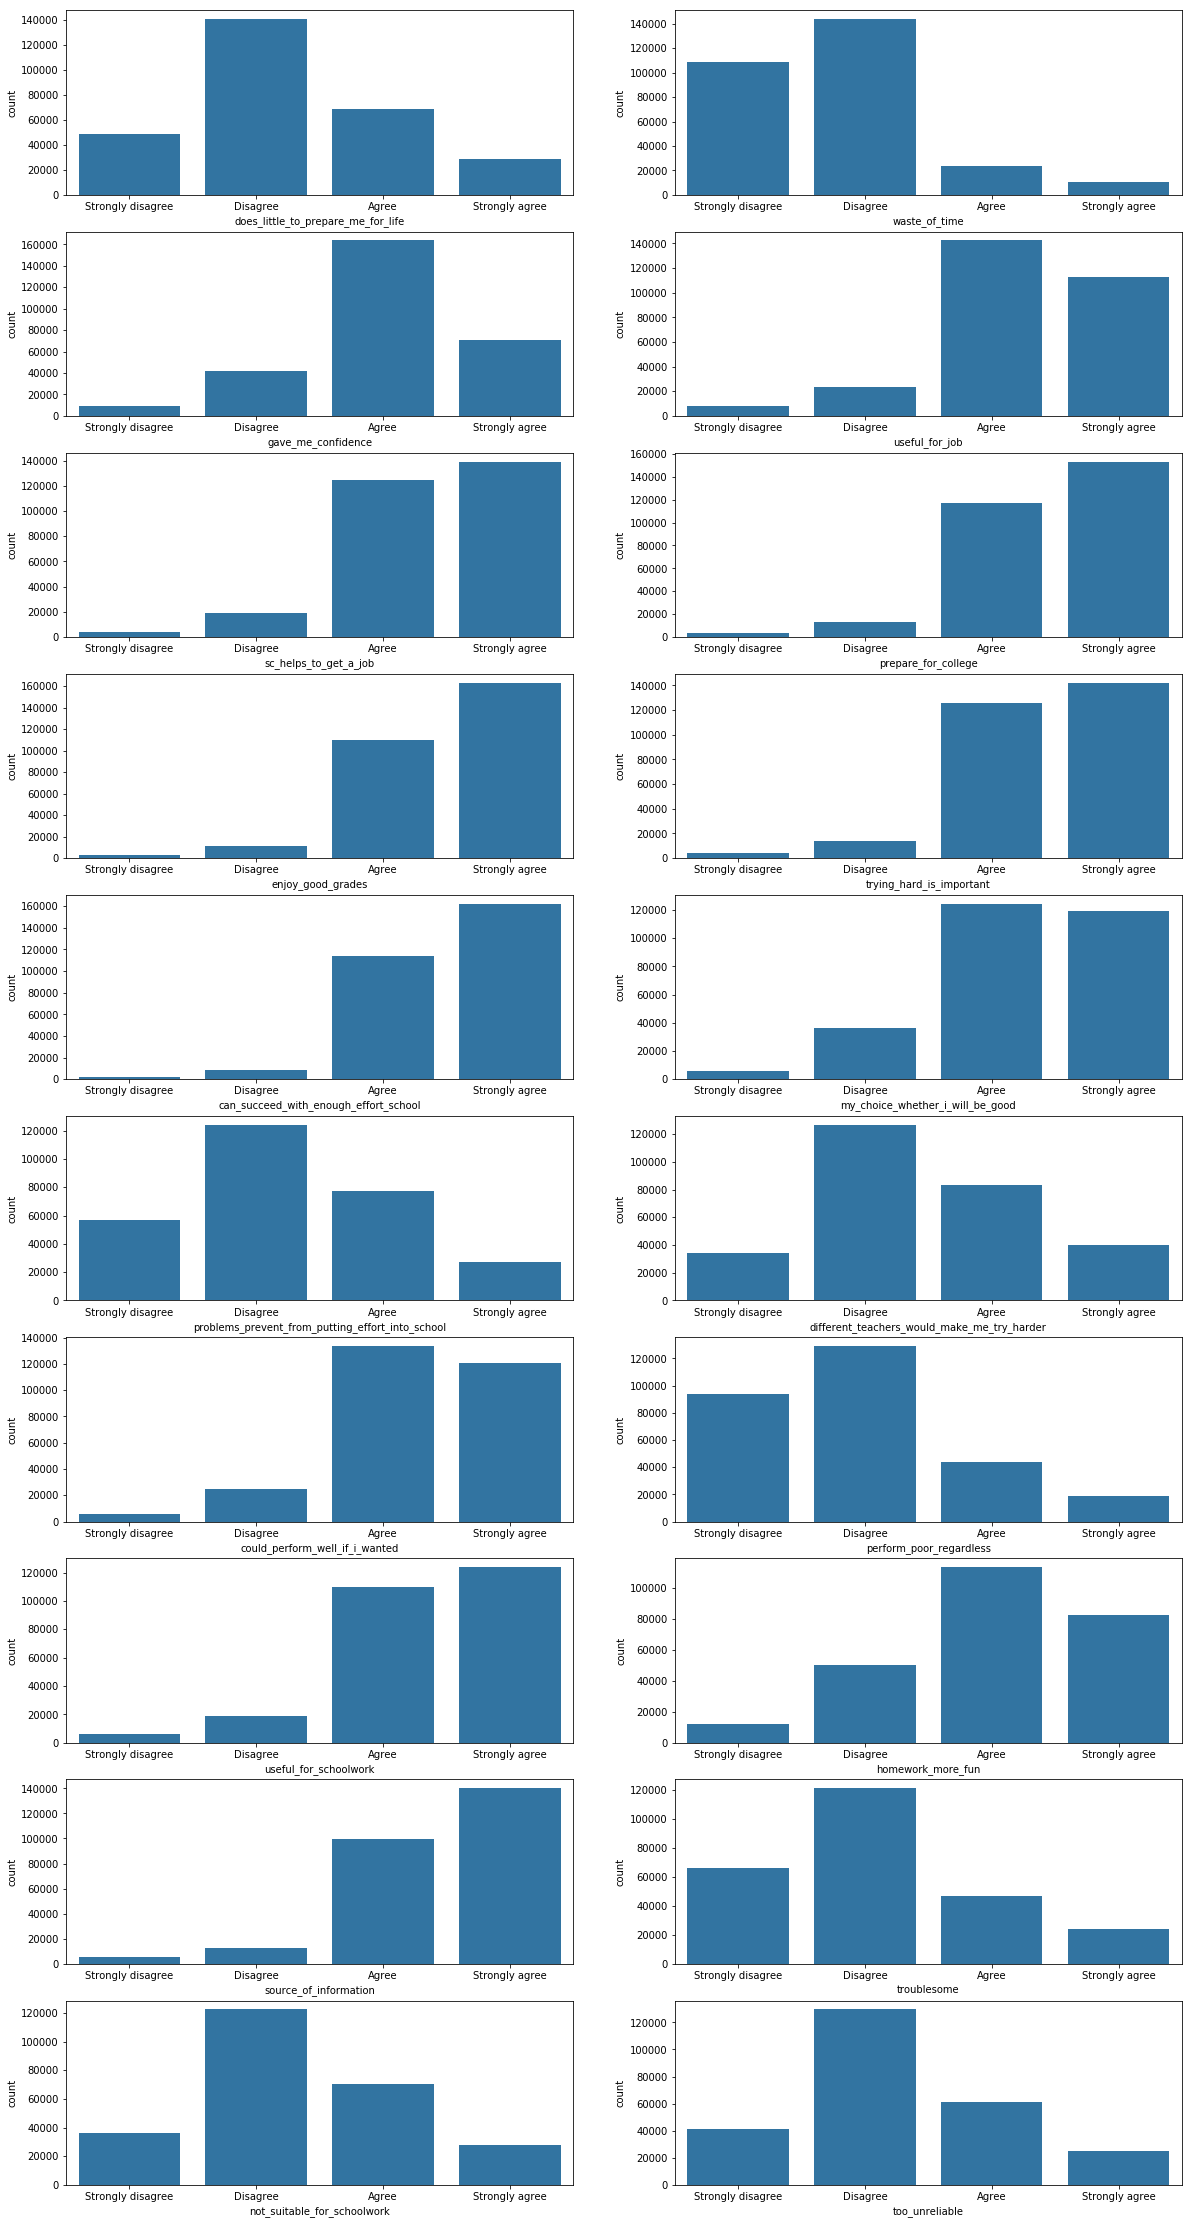

In [50]:
# Let's explore student student_school thought and attitude 

nrows=int(np.ceil(len(student_sch_thought_attitude)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(student_sch_thought_attitude)): 
    sb.countplot(data = agree_disagree_df_clean, x = student_sch_thought_attitude[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Students thought that school doesn't waste of time, gave confidence, not only helps to get a job but also useful for job, prepare for college, his choice whether to be good, source of info 

---------------------------

In [51]:
# convert the degree of agree columns in the table into ordered categorical types
teacher_instructions=["sets_clear_goals", "encourages_thinking_and_reasoning", "gives_feedback", "checks_understanding",
                      "summarizes_previous_lessons", "gives_feedback_on_strengths_and_weaknesses", "informs_about_expectations",
                      "informs_about_learning_goals", "tells_how_to_get_better",]
                     

ordinal_var_dict = {}

for col in teacher_instructions:
    ordinal_var_dict[col]=['Never or Hardly Ever', 'Some Lessons',  'Most Lessons','Every Lesson']
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    teacher_roles_df_clean[var] = teacher_roles_df_clean[var].astype(ordered_var)

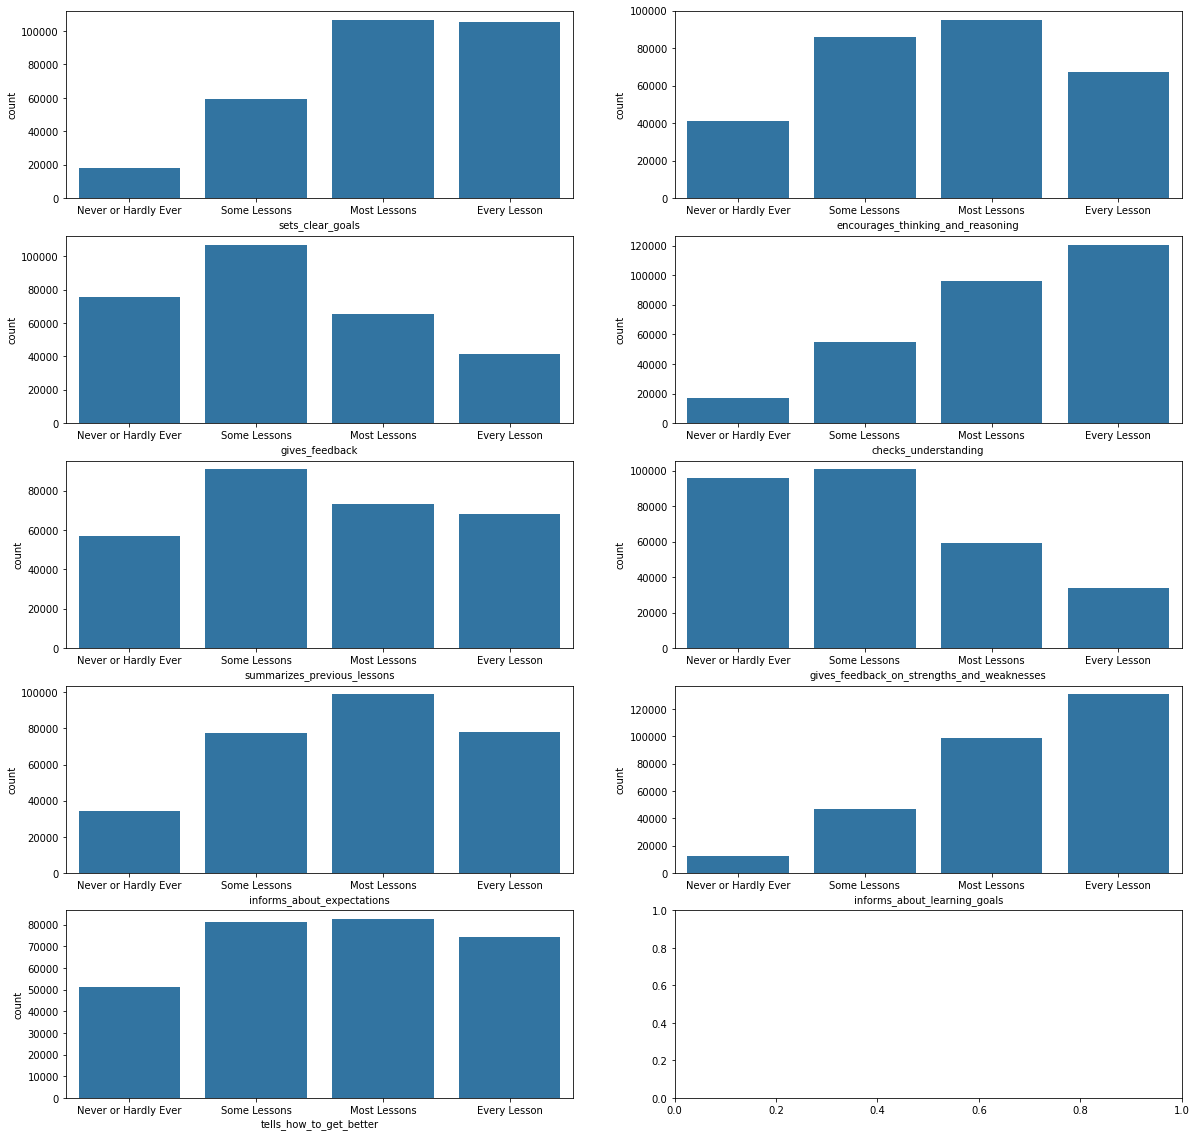

In [52]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(teacher_instructions)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i in range(len(teacher_instructions)): 
    sb.countplot(data = teacher_roles_df_clean, x = teacher_instructions[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Teachers helps the students

In [53]:
# convert the degree of agree columns in the table into ordered categorical types
teacher_role1=["teacher_encourages_to_reflect_problems", "gives_problems_that_require_to_think", "asks_to_use_own_procedures", 
               "presents_problems_with_no_obvious_solutions", "presents_problems_in_different_contexts", 
               "helps_learn_from_mistakes", "asks_for_explanations", "apply_what_we_learned", "problems_with_multiple_solutions"]
ordinal_var_dict = {}

for col in teacher_role1:
    ordinal_var_dict[col]=['Never or rarely', 'Sometimes',  'Often','Always or almost always']
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    teacher_roles_df_clean[var] = teacher_roles_df_clean[var].astype(ordered_var)



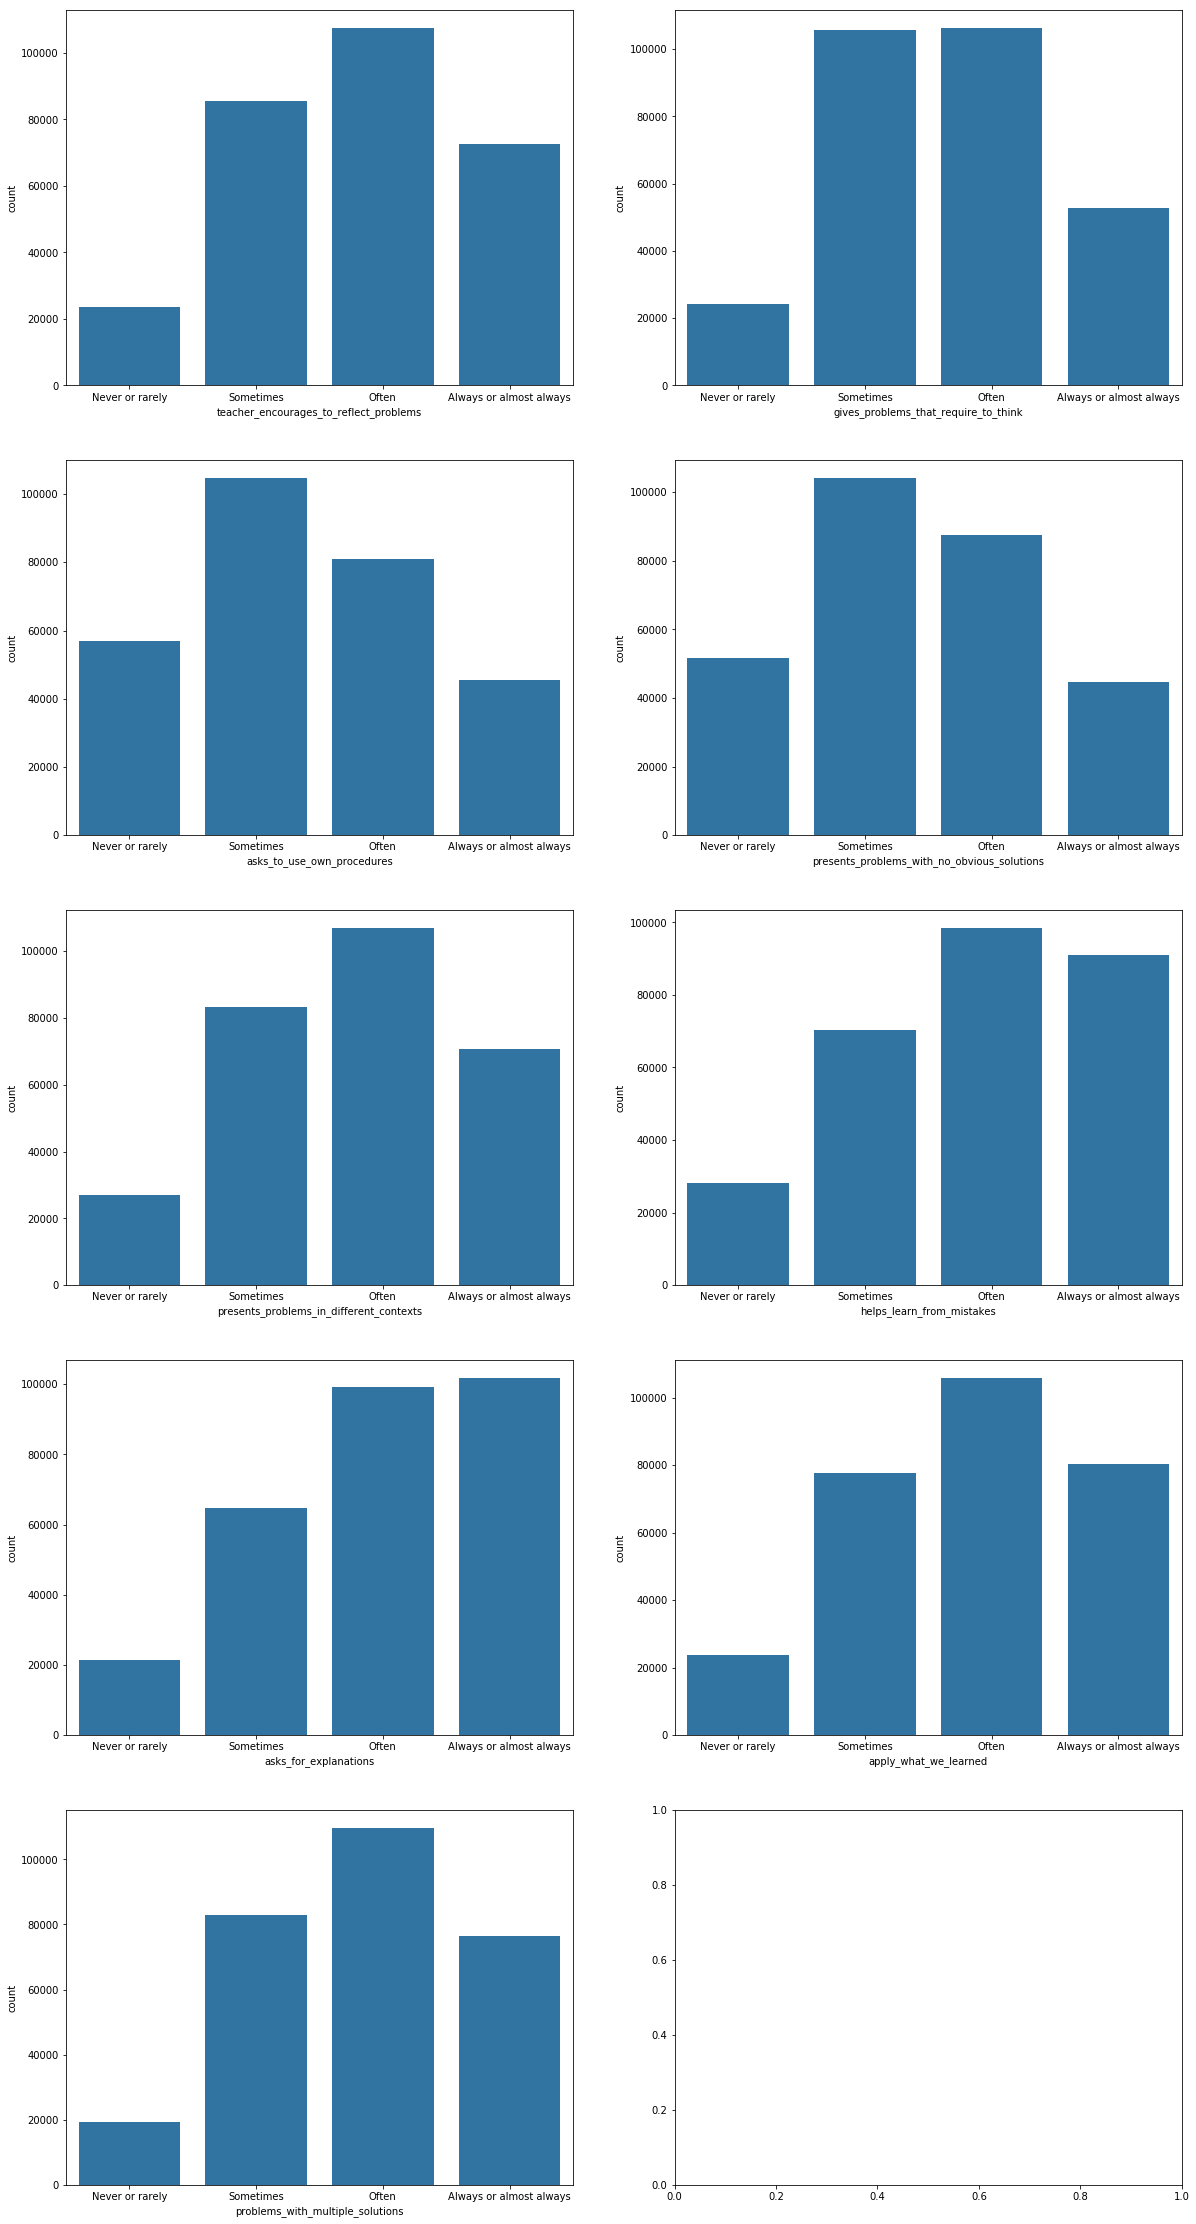

In [54]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(teacher_role1)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(teacher_role1)): 
    sb.countplot(data = teacher_roles_df_clean, x = teacher_role1[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

teachers in this data are studious

In [55]:
# convert the degree of agree columns in the table into ordered categorical types
teacher_support=["hw_every_day_back_in_time", "hw_once_a_week_back_in_time", "hw_once_a_week_not_Back_in_time",
                 "lets_us_know_we_have_to_work_hard", "provides_extra_help_when_needed", "helps_students_with_learning",
                 "gives_opportunity_to_express_opinions", "keeps_class_orderly", "starts_on_time", "wait_long_to_quiet_down"]

ordinal_var_dict = {}

for col in teacher_support:
    ordinal_var_dict[col]=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    teacher_roles_df_clean[var] = teacher_roles_df_clean[var].astype(ordered_var)


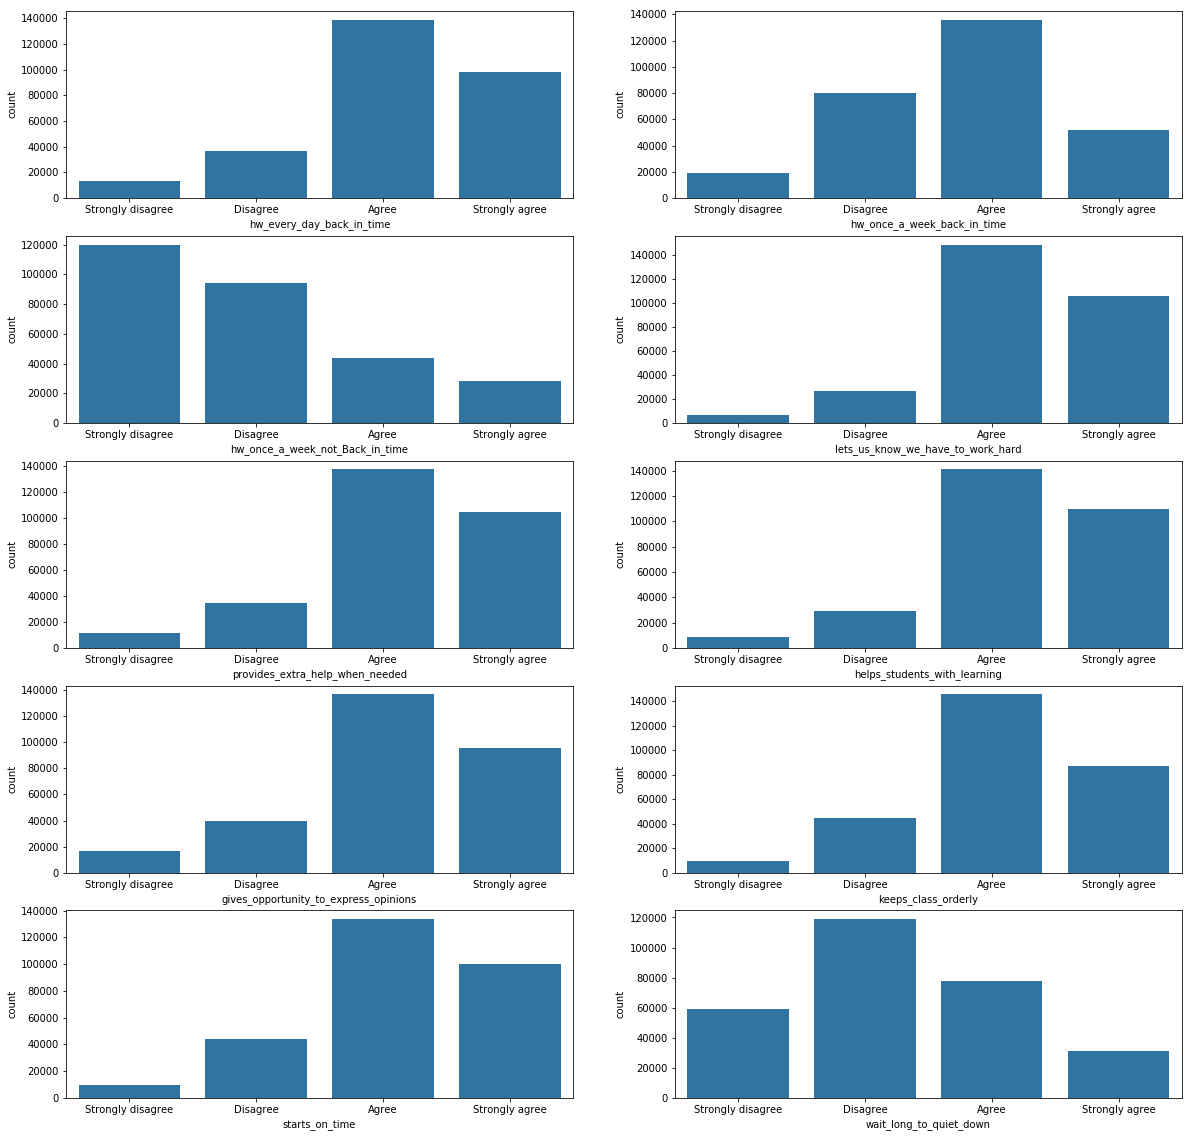

In [56]:
# Let's explore teacher support

nrows=int(np.ceil(len(teacher_support)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i in range(len(teacher_support)): 
    sb.countplot(data = teacher_roles_df_clean, x = teacher_support[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Again the teachers and students in this data are studious


_____________

In [57]:
# convert the degree of agree columns in the table into ordered categorical types
student_confidence=["cf_using_a_train_timetable", "cf_calculating_tV_discount", "cf_calculating_square_metres_of_tiles",
                    "cf_understanding_graphs_in_newspapers", "cf_solving_equation_1", "cf_distance_to_scale",
                    "cf_solving_equation_2", "cf_calculate_petrol_consumption_rate"]
ordinal_var_dict = {}

for col in student_confidence:
    ordinal_var_dict[col]=["Not at all confident",  "Not very confident",  "Confident","Very confident"]
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    student_roles_df_clean[var] = student_roles_df_clean[var].astype(ordered_var)


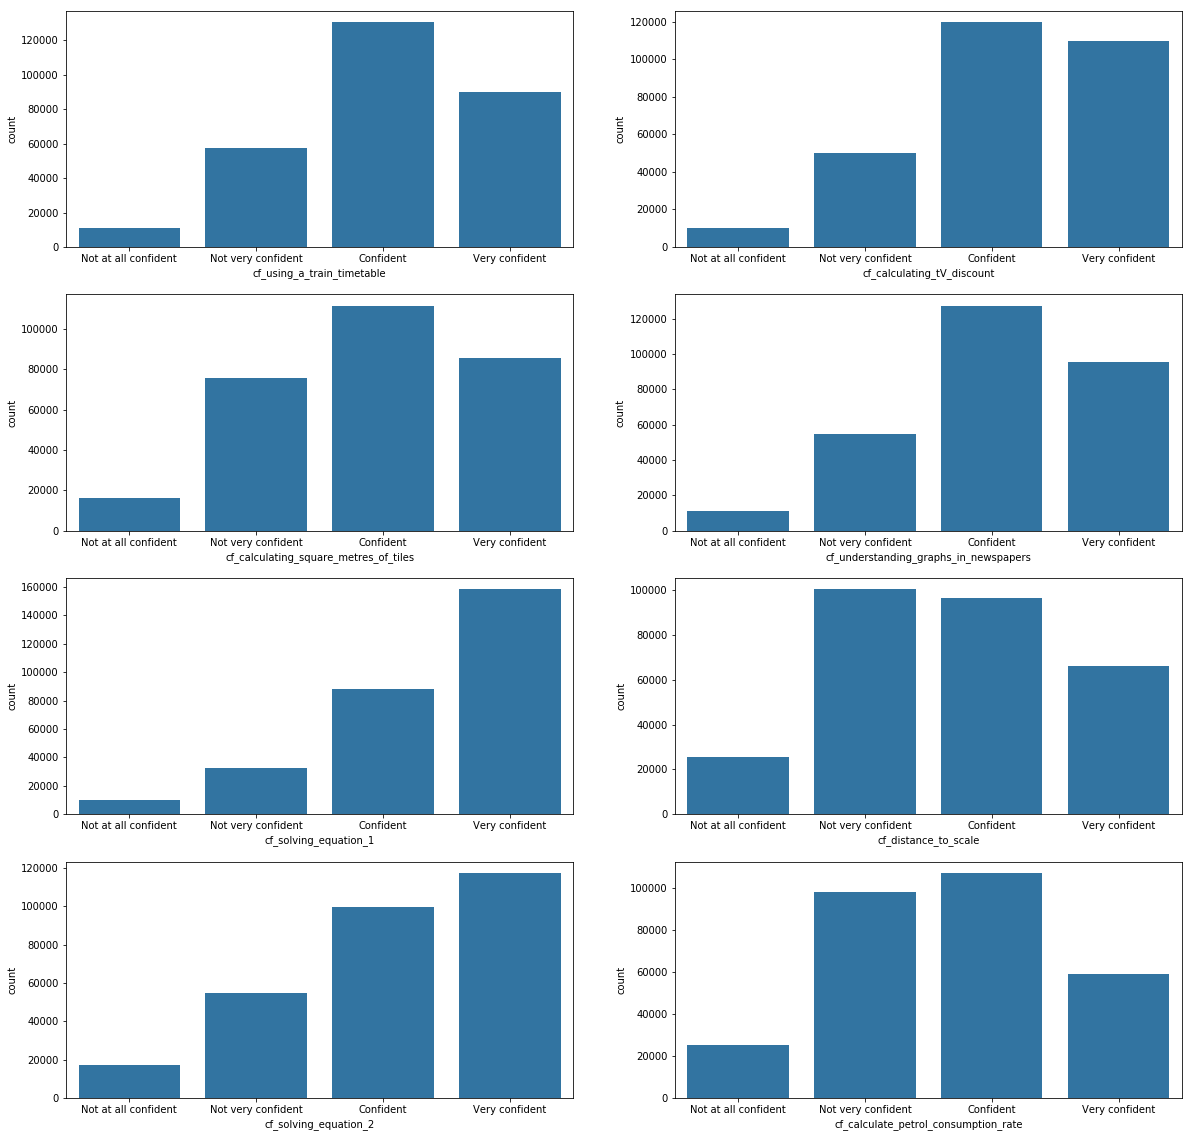

In [58]:
# Let's explore student_confidence

nrows=int(np.ceil(len(student_confidence)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i in range(len(student_confidence)): 
    sb.countplot(data = student_roles_df_clean, x = student_confidence[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Students mostly are confident

In [59]:
# convert the degree of agree columns in the table into ordered categorical types
student_attribution_failure=["af_not_good_at_maths_problems", "af_teacher_did_not_explain_well", "af_bad_guesses",
                             "af_material_too_hard", "af_teacher_did'nt_get_students_interested", "af_unlucky"]


ordinal_var_dict = {}

for col in student_attribution_failure:
    ordinal_var_dict[col]=[ "Not at all likely",  "Slightly likely", "Likely","Very   Likely"]
    
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    student_roles_df_clean[var] = student_roles_df_clean[var].astype(ordered_var)


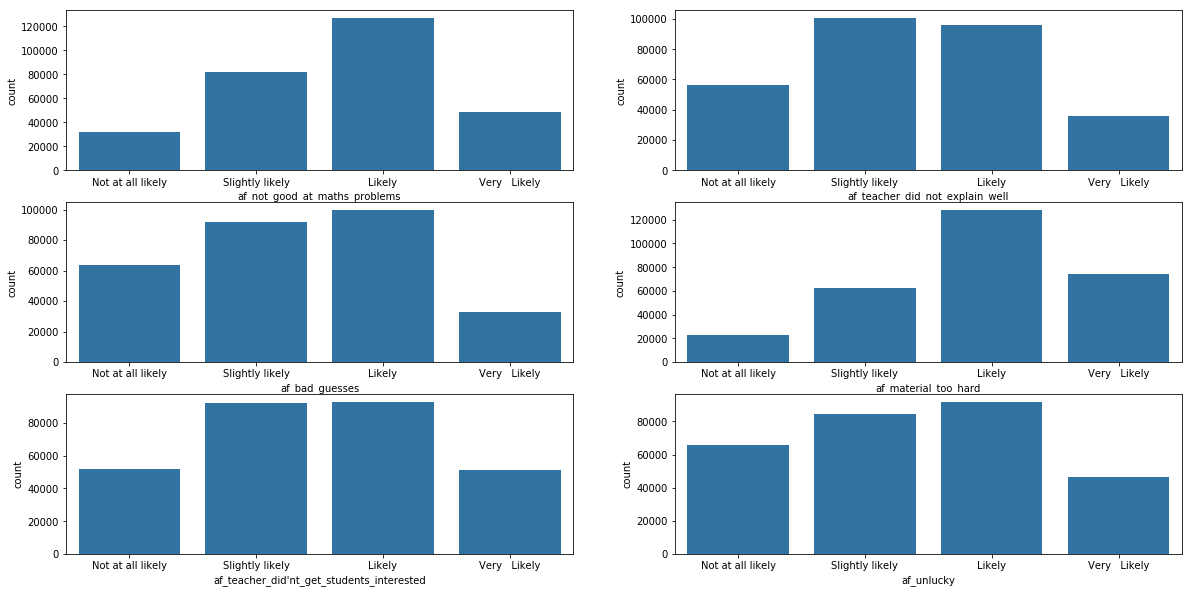

In [60]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(student_attribution_failure)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,10])

default_color = sb.color_palette()[0]
for i in range(len(student_attribution_failure)): 
    sb.countplot(data = student_roles_df_clean, x = student_attribution_failure[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

The main reasons of bad grades that many students agree on it are not good at the subject(math) and the material is too hard, the other seem to be normally distributed

In [61]:
# convert the degree of agree columns in the table into ordered categorical types
student_way=["talk_about_maths_with_friends", "help_friends_with_maths", "extracurricular_activity", "participate_in_competitions",
         "study_more_than_2_extra_hours_a_day", "play_chess", "computer_programming", "participate_in_math_club"]


ordinal_var_dict = {}

for col in student_way:
    ordinal_var_dict[col]=['Never or rarely', 'Sometimes',  'Often','Always or almost always']
    
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    student_roles_df_clean[var] = student_roles_df_clean[var].astype(ordered_var)

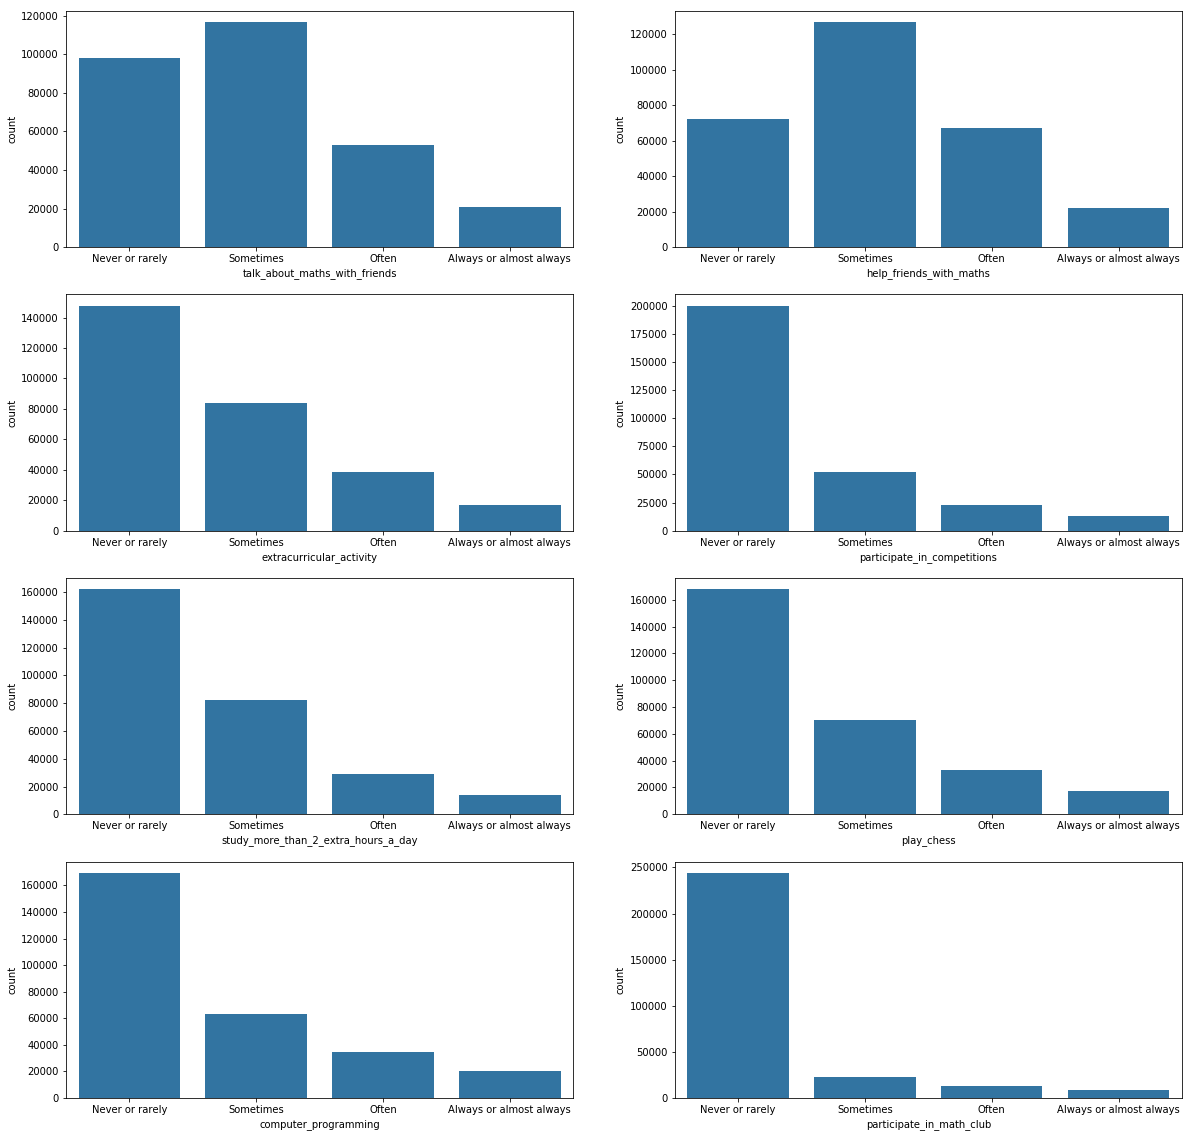

In [62]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(student_way)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i in range(len(student_way)): 
    sb.countplot(data = student_roles_df_clean, x = student_way[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

students in this dataset does not participate in any activity related to the subject(math)

In [63]:
# convert the degree of agree columns in the table into ordered categorical types
student_orientation =["assigns_complex_projects","has_students_work_in_small_groups", "plans_classroom_activities",
                      "students_don’t_listen", "noise_and_disorder", "teacher_has_to_wait_until_its_quiet",
                      "students_don’t_work_well", "students_start_working_late"]

ordinal_var_dict = {}

for col in student_orientation:
    ordinal_var_dict[col]=['Never or Hardly Ever', 'Some Lessons',  'Most Lessons','Every Lesson']
    
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    student_roles_df_clean[var] = student_roles_df_clean[var].astype(ordered_var)

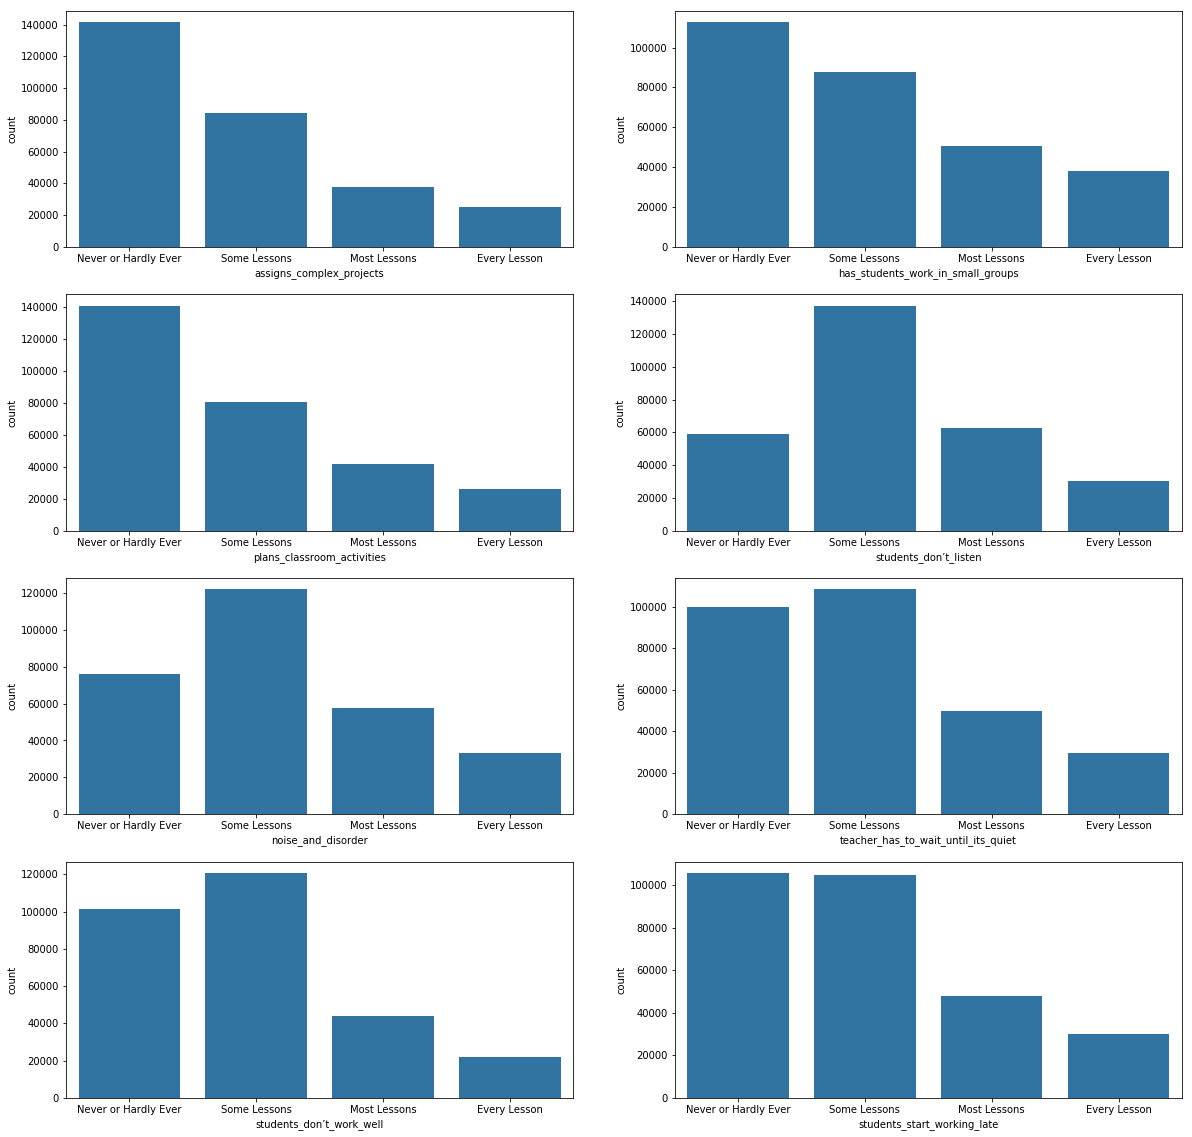

In [64]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(student_orientation)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i in range(len(student_orientation)): 
    sb.countplot(data = student_roles_df_clean, x = student_orientation[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
    
plt.show()

Students in this data doesn't work on complex or small projects <br>
Students think that their fellow don't listen and make noise in some lessons, don't work well, start working late

In [65]:
# convert the degree of agree columns in the table into ordered categorical types
student_and_problem=["p_trace_steps", "Manual", "ask_a_friend"]
ordinal_var_dict = {}

for col in student_and_problem:
    ordinal_var_dict[col]=['definitely not do this', 'probably not do this', 'probably do this','definitely do this']

    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    student_roles_df_clean[var] = student_roles_df_clean[var].astype(ordered_var)

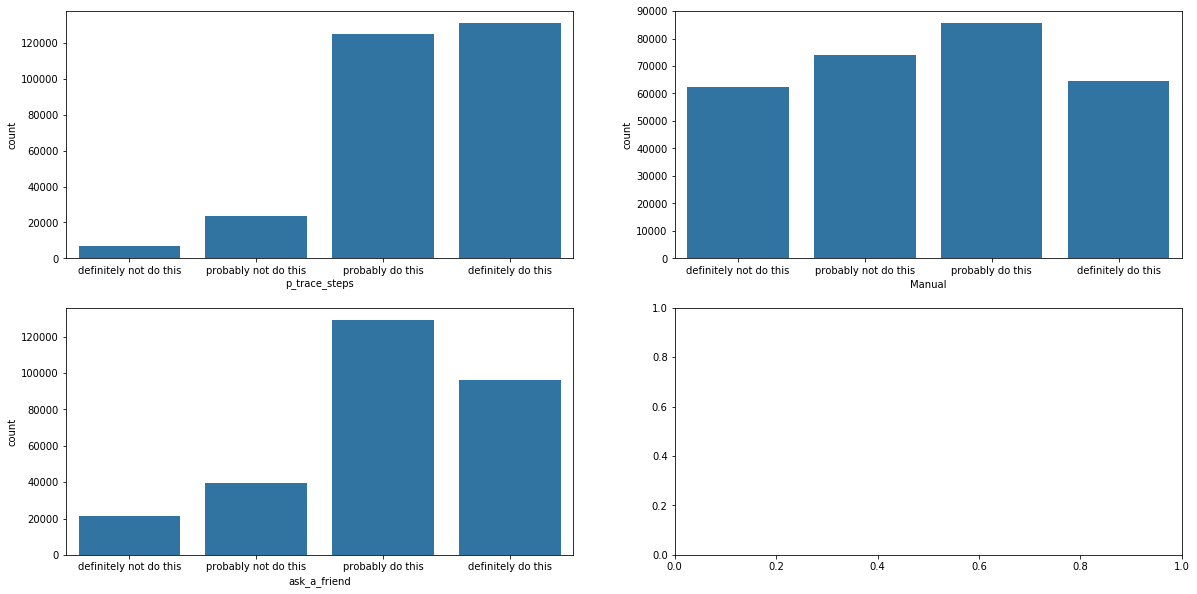

In [66]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(student_and_problem)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,10])

default_color = sb.color_palette()[0]
for i in range(len(student_and_problem)): 
    sb.countplot(data = student_roles_df_clean, x = student_and_problem[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
    
plt.show()

Students trends to trace the steps and ask friends when facing a problem

In [67]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
nrows=5
ncols=3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

default_color = sb.color_palette()[0]
for i, col in enumerate(student_roles_df_clean.describe().columns): 
    sb.countplot(data = student_roles_df_clean, x = col, color = default_color, ax = ax[i%nrows,i%ncols])
    
    
plt.show()

The previous data shows how does the student react when facing a problem<br>
just drive, leave it to brother and study map seem to be normally distributed<br>
read brochure seem to be right skewed<br>

The previous data also shows how does the students remeber the problem<br>
Try buttos seem to be normally distributed<br>
similarities, ask for helps and find ticket office seem to be right skewed<br>

The study time out school<br>
with parent, computer, homework, Guided Homework, Personal Tutor and Commercial Company  seem to have much outliers and skewed may be log scale be usefule here<br>
Actually all the study time variables are skewed let's visualize them alone

In [68]:
cols=["with_parent", "computer", "homework", "guided_homework", "personal_tutor", "commercial_company"]
nrows=3
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,20])

for i in range(len(cols)):
    var = cols[i]
    ax[i%nrows,i%ncols].hist(data = student_roles_df_clean, x = var,  bins = 50)
    ax[i%nrows,i%ncols].set_xlabel('{}'.format(var), size=14)

plt.show()

Still hard to observe, Let's plot each one alone with xlim to remove the long tails

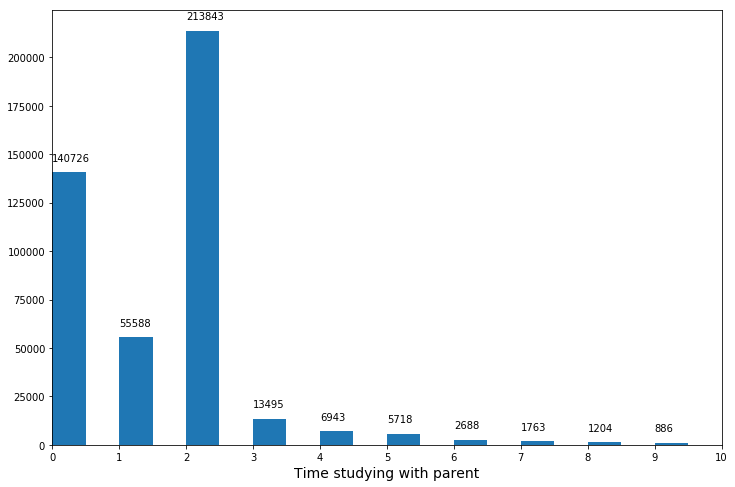

In [69]:
# plot the time studing with parent
plt.figure(figsize=[12,8])
plt.hist(data=student_roles_df_clean, x="with_parent", bins=60);
plt.xticks(list(range(11)))

for i in range (10):
    count = student_roles_df_clean.with_parent.value_counts()[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+10000, count, ha = 'left', va='top')

plt.xlabel("Time studying with parent", size=14)
plt.xlim(0,10);

Students don't study much time with parents max 2 hours

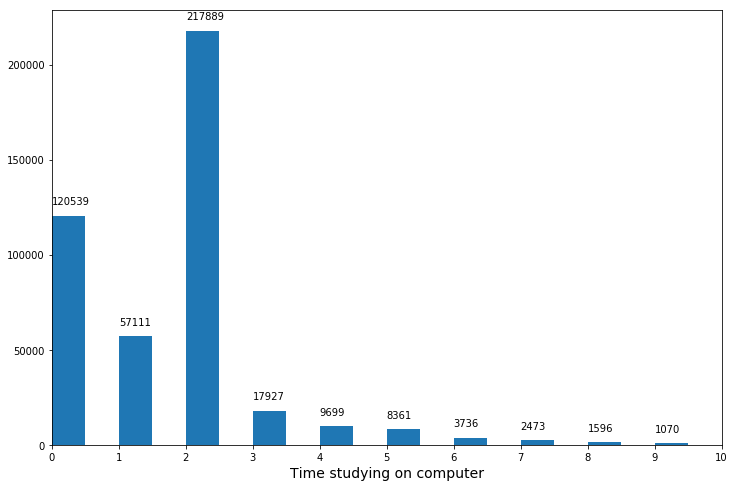

In [70]:
# plot the time studing on computer
plt.figure(figsize=[12,8])
plt.hist(data=student_roles_df_clean, x="computer", bins=60);
plt.xticks(list(range(11)))

for i in range (10):
    count = student_roles_df_clean.computer.value_counts()[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+10000, count, ha = 'left', va='top')

plt.xlabel("Time studying on computer", size=14)
plt.xlim(0,10);

Also, most of them  don't spend much time on computer to study max 2 hours

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-

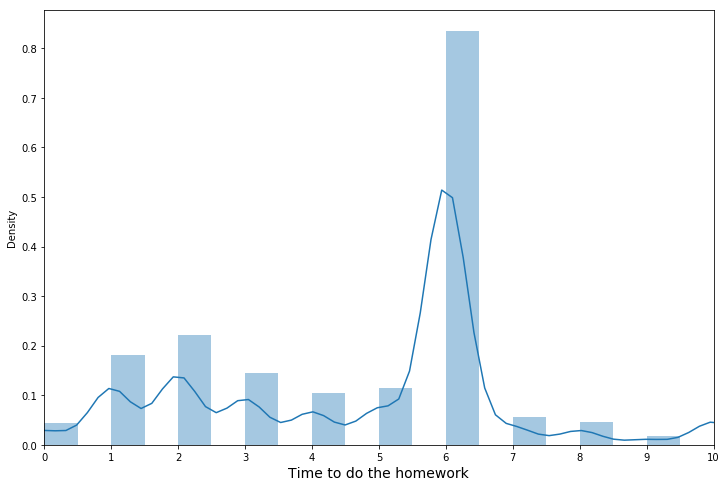

In [71]:
# plot the time to do the homework
plt.figure(figsize=[12,8])
sb.distplot(student_roles_df_clean.homework, bins=60, color = default_color);

plt.xticks(list(range(11)))
plt.xlabel("Time to do the homework", size=14)
plt.xlim(0,10);

The average time frequency is between 25000-50000 or 0.1-0.2 but the six hours seems to be something all students agree on it regardless their year.

In [72]:
# plot the time to do the guided_homework
plt.figure(figsize=[12,8])
sb.distplot(student_roles_df_clean.guided_homework, bins=60, color = default_color);
plt.xticks(list(range(11)))

plt.xlabel("Time to do the guided_homework", size=14)
plt.xlim(0,10);

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-

The guided_homework helps students to spend less hour on it

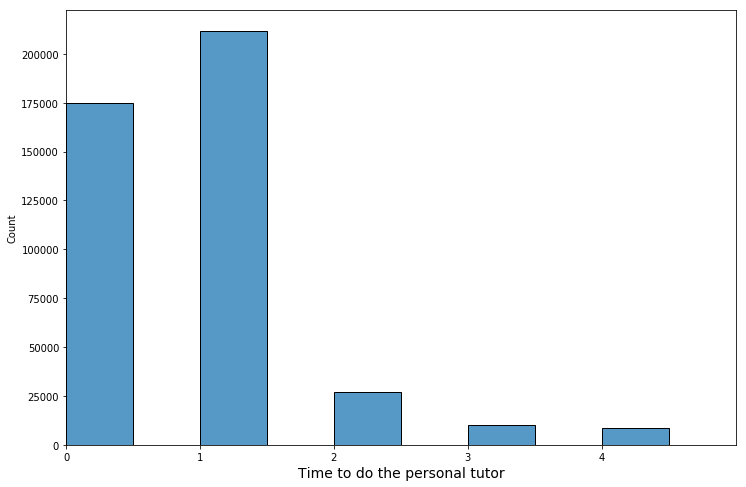

In [73]:
# plot the time to do the personal_tutor
plt.figure(figsize=[12,8])
sb.histplot(student_roles_df_clean.personal_tutor, bins=60);
plt.xticks(list(range(5)))

plt.xlabel("Time to do the personal tutor", size=14)
plt.xlim(0,5);

The personal tutor is 0-2 only 

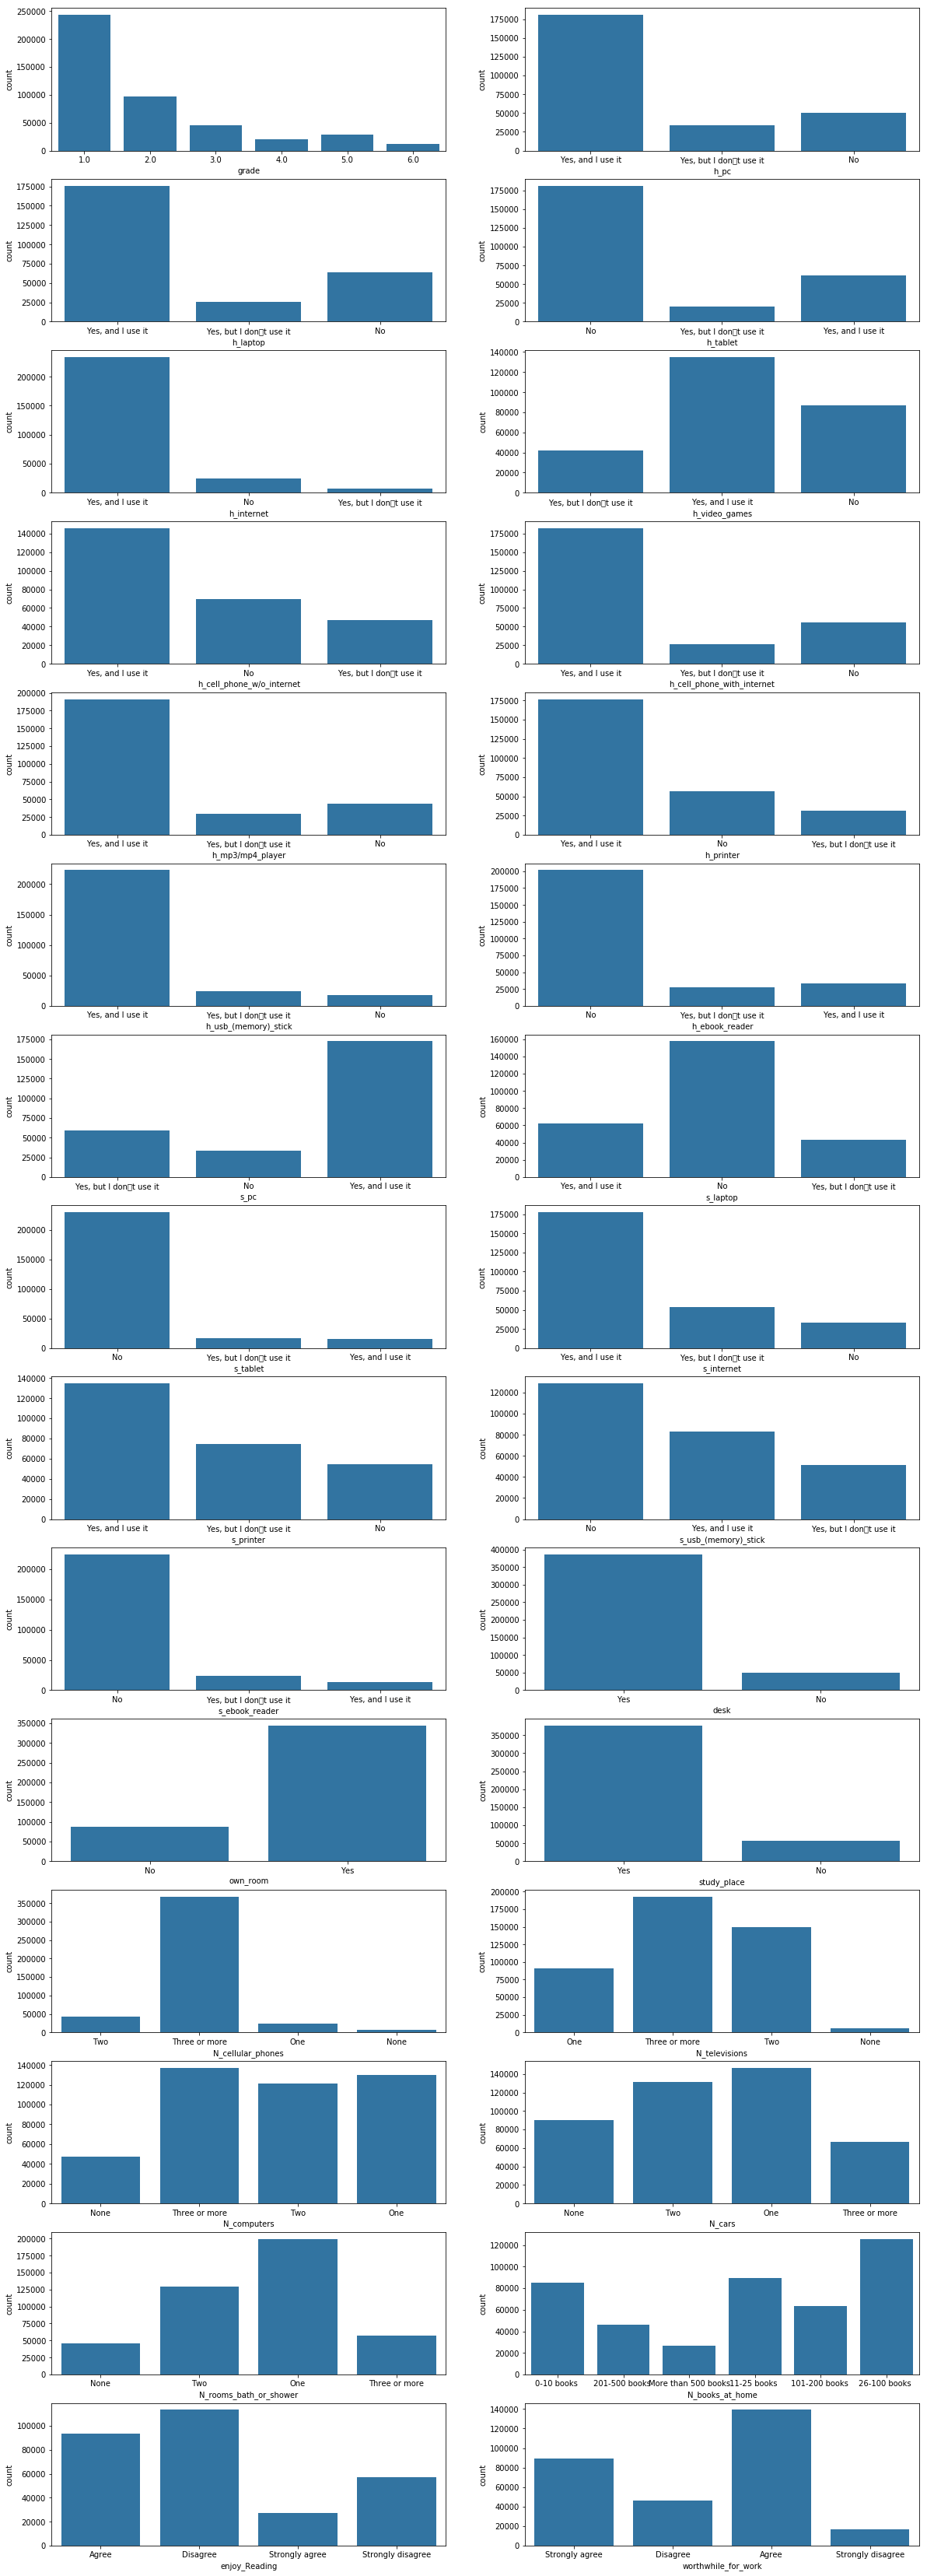

In [74]:
# Let's explore teacher instructions

nrows=int(np.ceil(len(facilities_col)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,60])

default_color = sb.color_palette()[0]
for i in range(len(facilities_col)): 
    sb.countplot(data = facilities_df_clean, x = facilities_col[i],
                 color = default_color, ax = ax[i//ncols,i%ncols])
    
plt.show()

Most students have pc, laptop, internet, cell phone, video games and printer at home and school<br>
Most popular number of device is three or more<br>
Students in this data doesn't prefer reading


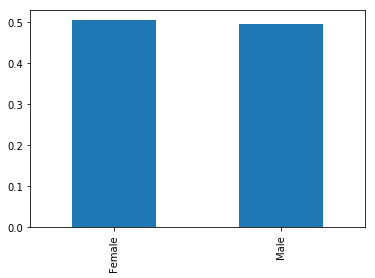

In [75]:
# Let's explore the gender
(pisa_df.ST04Q01.value_counts()/pisa_df.shape[0]).plot(kind="bar")

They are distributed equally without bias

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Most popular grade is 1 and least one is 6, the grade will be less popular as it increases and that is normal because according to [Test Levels](http://www.oecd.org/pisa/test/summary-description-seven-levels-of-proficiency-science-pisa-2015.htm) 1 is worst and 6 is the best. Moreover, 1 may be high frequent because we have 1a and 1b

At agree_disagree_df_clean table I tried to change all to ordinal data
Students thought they are perfect regardless as any good behaviour in the question agree and any bad behaviour disagree.
They also worry about poor grade, exam difficulty

The student in this data are disciplined or they believe that.

The students in this data are social and have the feel of belonging or they believe that.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The studying times have log tails. So, I used `plt.xlim` to remove unwanted tail


<span id="bi"></span>
## Bivariate Exploration


### Functions

In [76]:
def make_boxplot(var_list, width=20, height=40):
    """
        Make boxplot for each variable alone with grade
        var_list: list of our variables
    """
    nrows=int(np.ceil(len(var_list)/2))
    ncols=2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [width,height])

    default_color = sb.color_palette()[0]
    for i in range(len(var_list)): 
        sb.boxplot(data = agree_disagree_df_clean, x = var_list[i], y=agree_disagree_df_clean.grade,
                   color = default_color, ax = ax[i//ncols,i%ncols])

    plt.show()

In [77]:
def make_dist(var_list, table):
    """
        Make a distribution for each variable alone with grade
        var_list: list of our variables
    """
    
    for var in var_list:
        group_means = table.groupby([var]).mean()
        group_order = group_means.sort_values(['grade'], ascending = False).index

        g = sb.FacetGrid(data = table, col = var, col_wrap = 4, height = 4)
        g.map(plt.hist, "grade",  bins = np.arange(0, 6+0.5, 0.5))
        g.set_ylabels(var, size=14)
        g.set_xlabels("Grade", size=14)

        g.set_titles('{col_name}', size=14)


Let's see the relation with grades<br>
Let's start with `agree_disagree_df_clean`

#### Does good and bad idea at Math (subject) leads to bad grades?

In [78]:
# Let's see the relation with the grade
make_boxplot(student_ideas)


Seems all have the same range and IQR and all median=1 may be because his huge number or counts 

Let's visualize the violin but we will remove grade 1 

In [79]:
# Grades with no ones
grade_one=agree_disagree_df_clean[agree_disagree_df_clean.grade != 1]

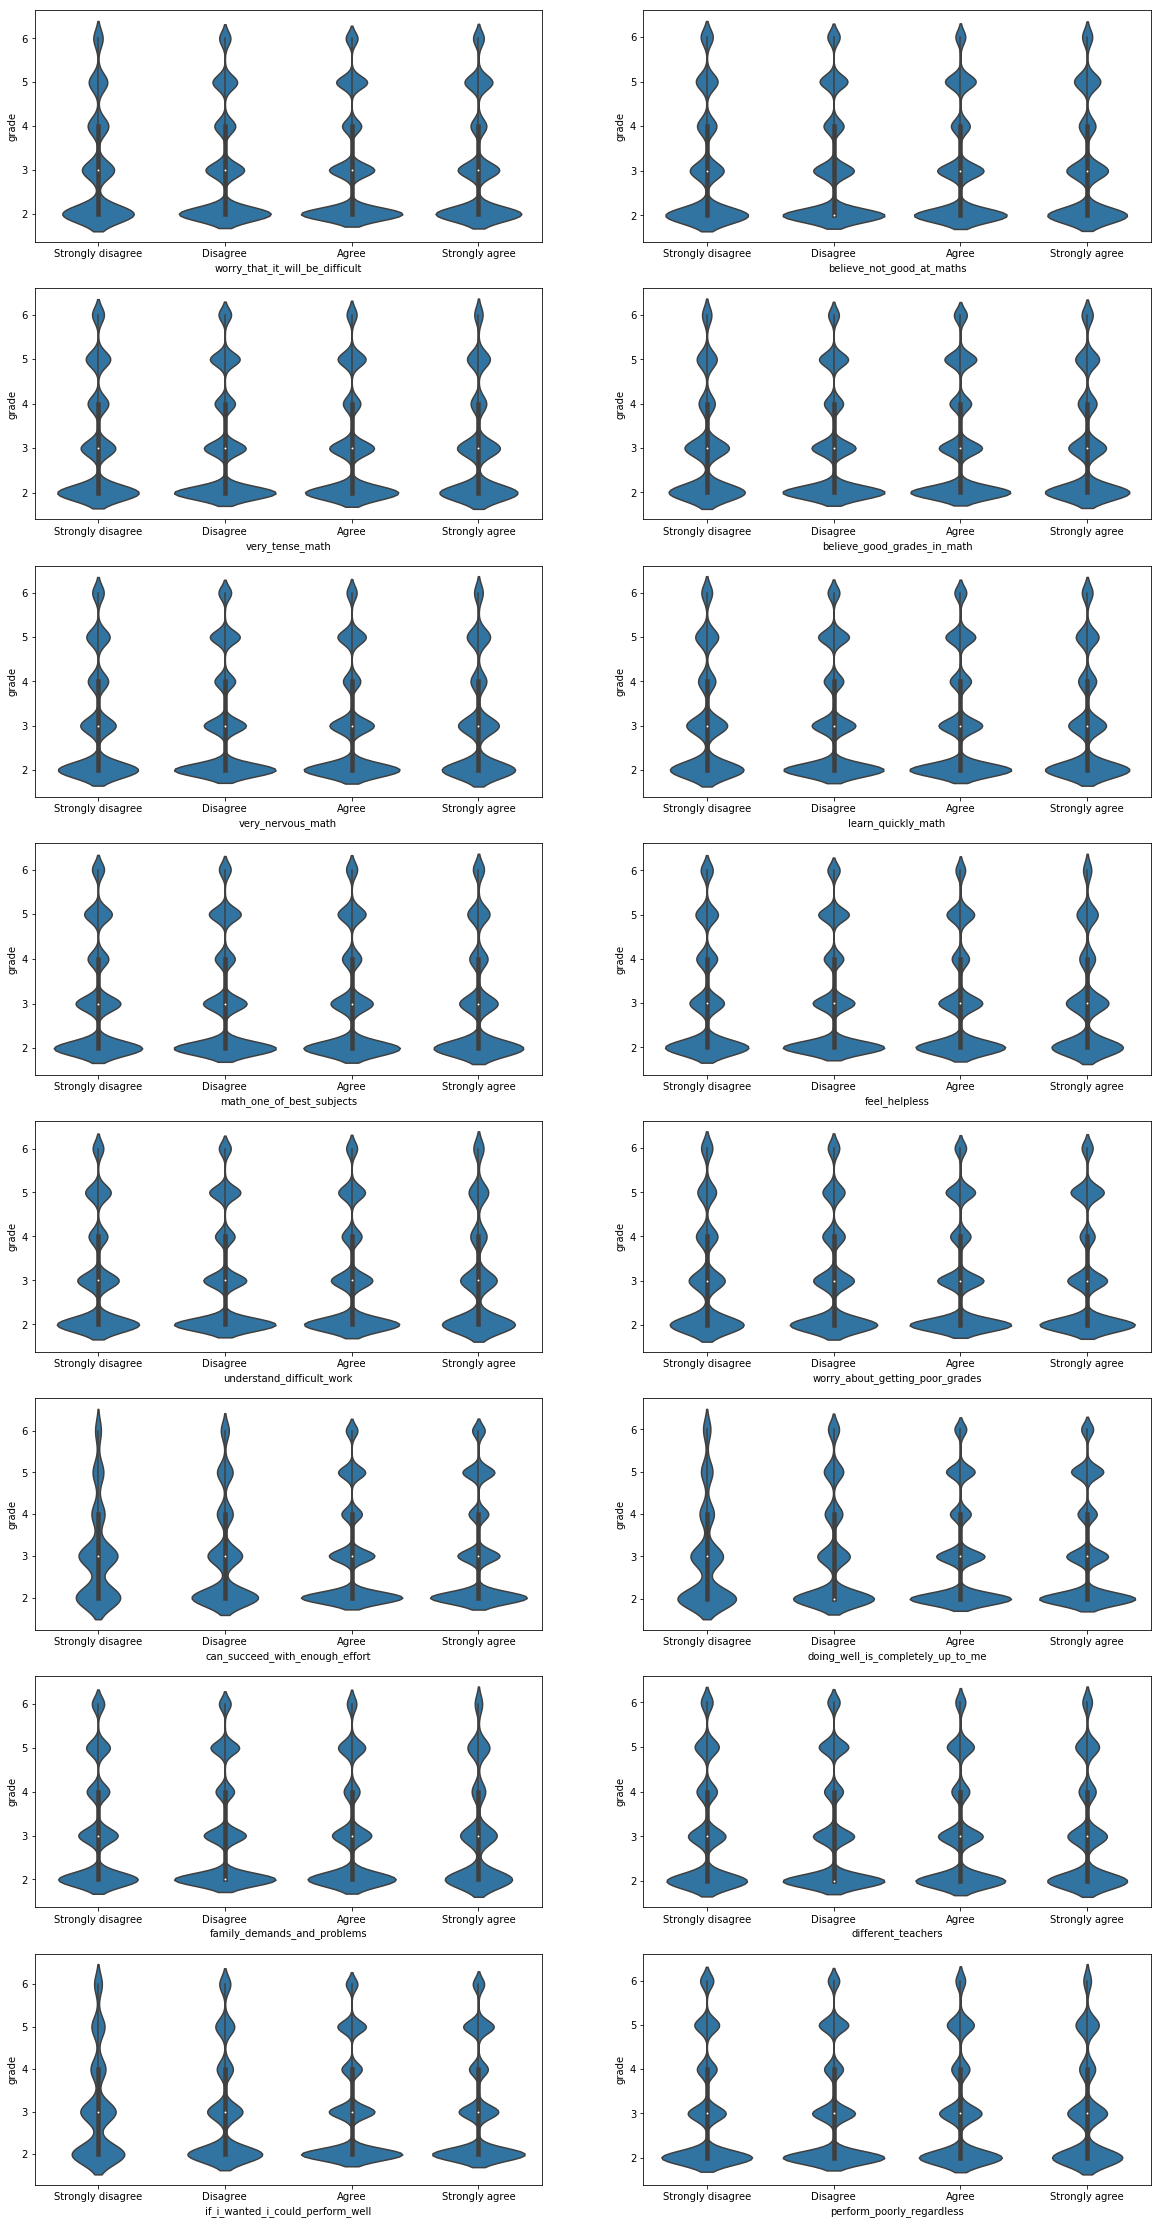

In [80]:
# Let's see the relation with the grade
nrows=int(np.ceil(len(student_ideas)/2))
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = [20,40])

default_color = sb.color_palette()[0]
for i in range(len(student_ideas)): 
    sb.violinplot(data=grade_one, x=student_ideas[i], y=grade_one.grade, color = default_color,
                  ax = ax[i//ncols,i%ncols]);
plt.show()

Indeed the median that wasn't appear in the box plot appears here and it is 1 and this is why it isn't appear 

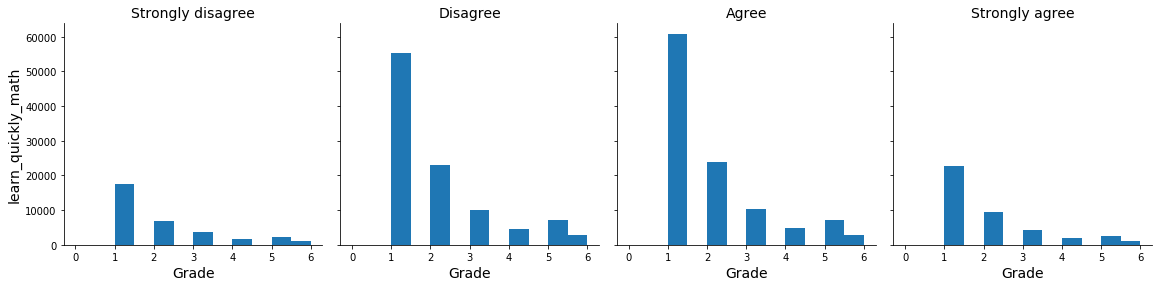

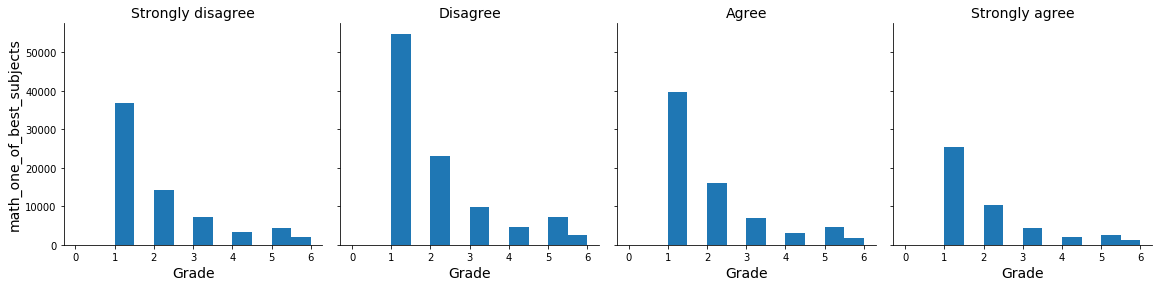

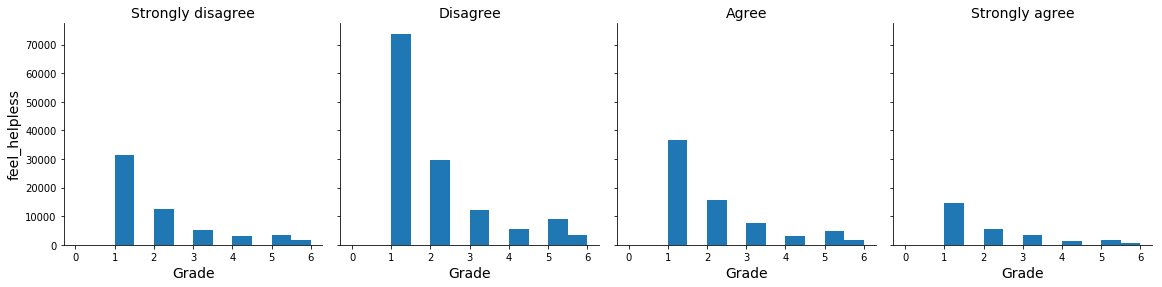

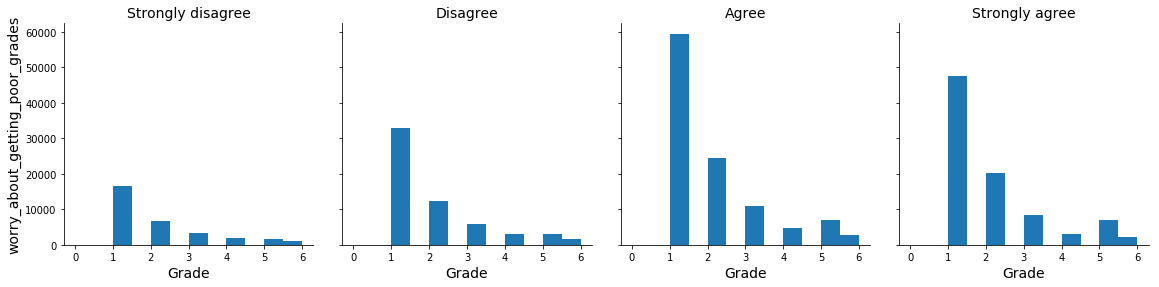

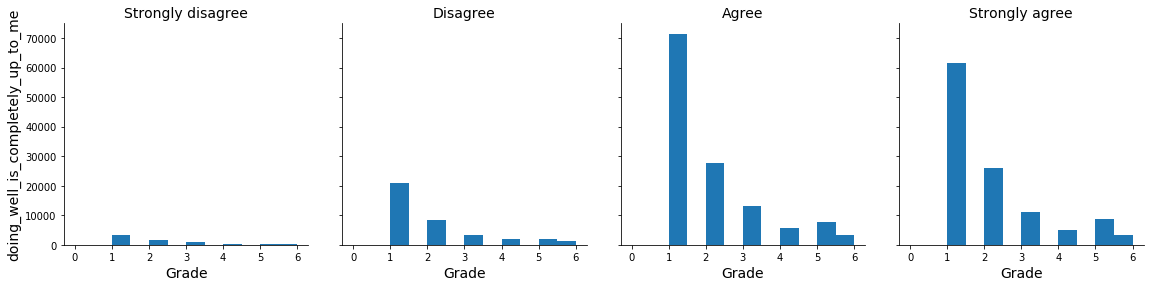

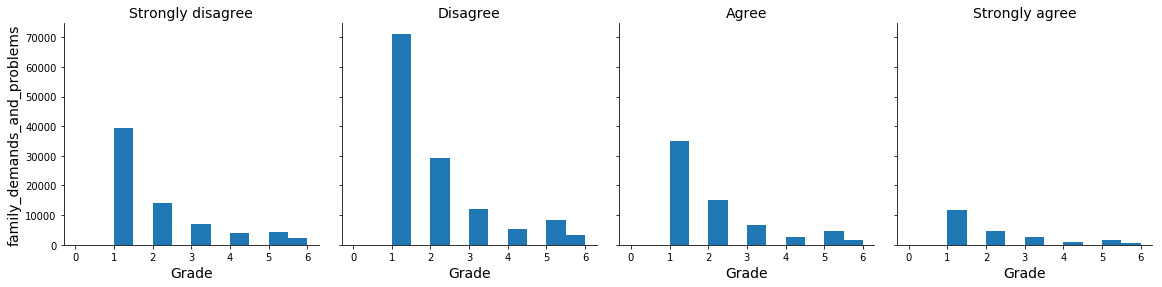

In [81]:
# Let's see the distribution for each one alone
make_dist(student_ideas, agree_disagree_df_clean)

From previous charts it has been clear that believes affects the grades

Good believes and self confident lead to high grades and bad believes leads to poor grades

#### How does the efforts affect the grade?

In [82]:
# Let's see the relation with the grade
make_boxplot(student_effort)

It seems that the students in this data are lying as they didn't study but get higher grades or just students who study well, they may be because they are afraid of envy

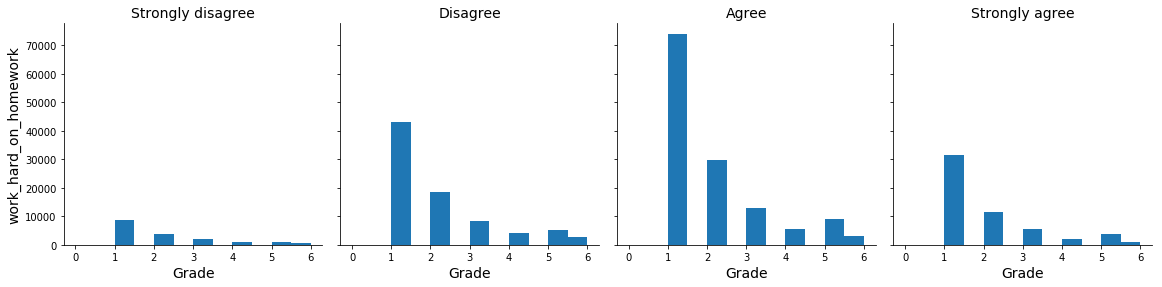

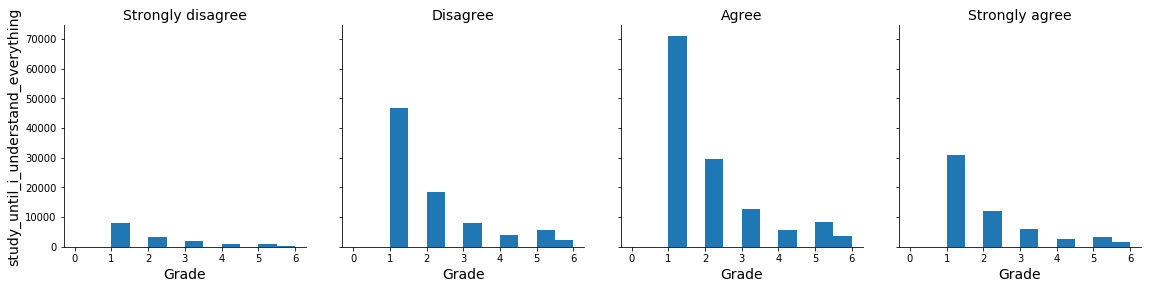

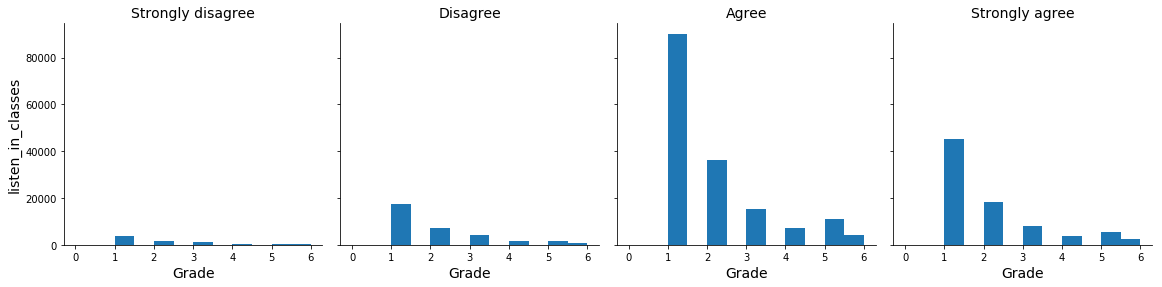

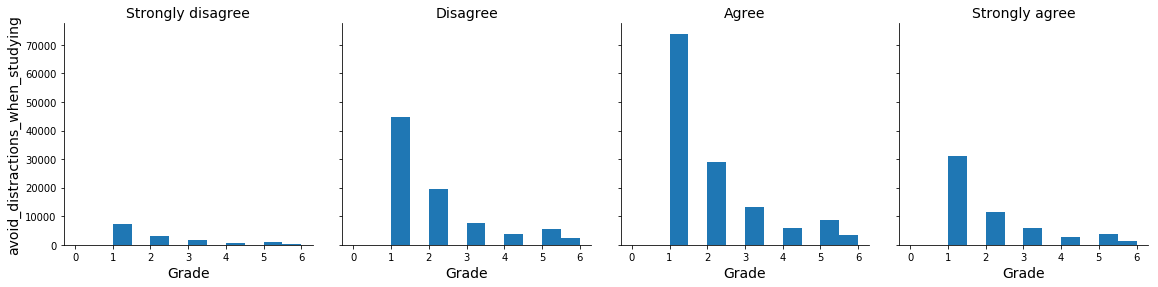

In [83]:
# Let's see the distribution for each one alone
make_dist(student_effort, agree_disagree_df_clean)

From the previous graph it has been clear that more efforts means higher grades


#### Does a good relation between student and teacher and students with his fellow makes a good grade?

In [84]:
# Let's see the relation with the grade
var=["get_along_with_teachers", "teachers_are_interested", "teachers_listen_to_students", "teachers_help_students",
     "teachers_treat_students_fair", "feel_awkward_at_school", "liked_by_other_students"]
make_boxplot(var)

Students who think that they are liked by other get much higher grades than others

wether teachers treat them fair,  listen to them, help them or teachers are interested doesn't matter

We can say that high grades are depend on the student him/herself

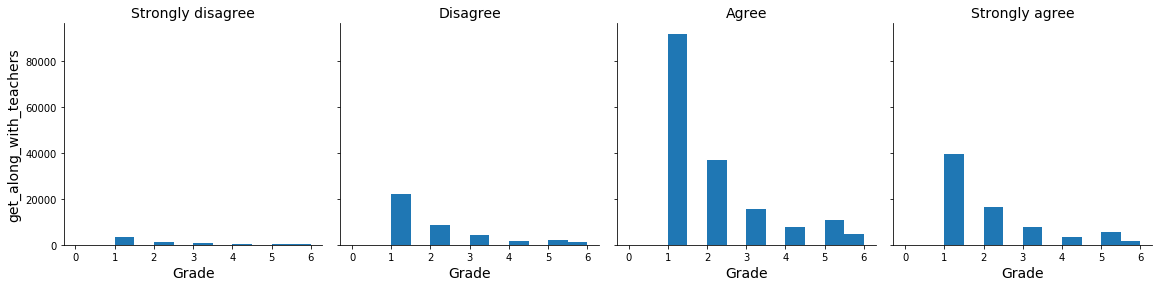

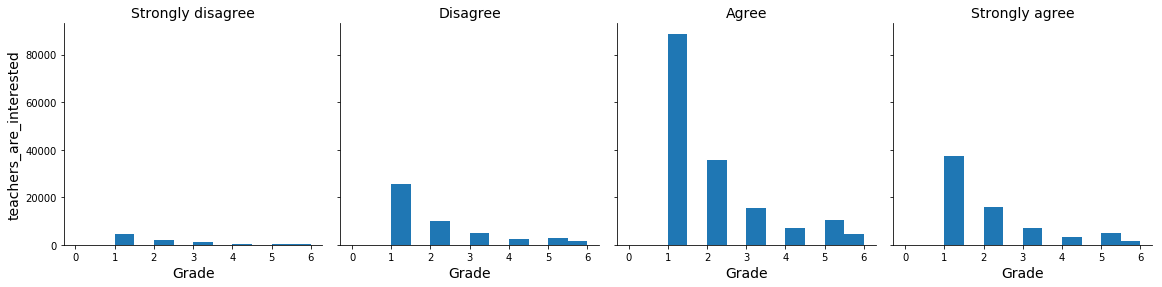

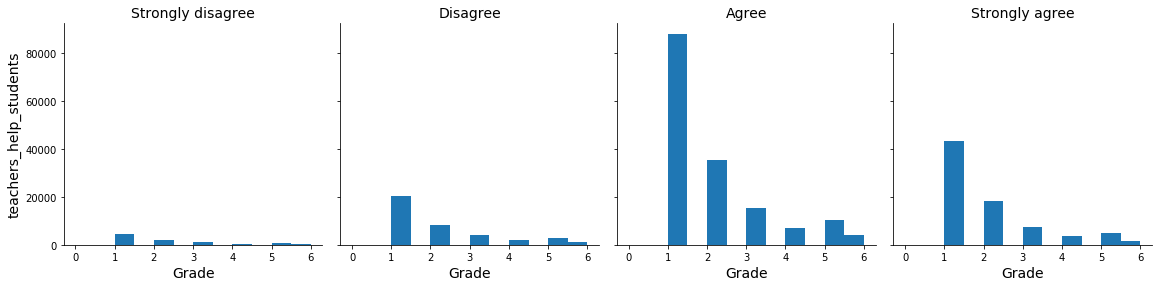

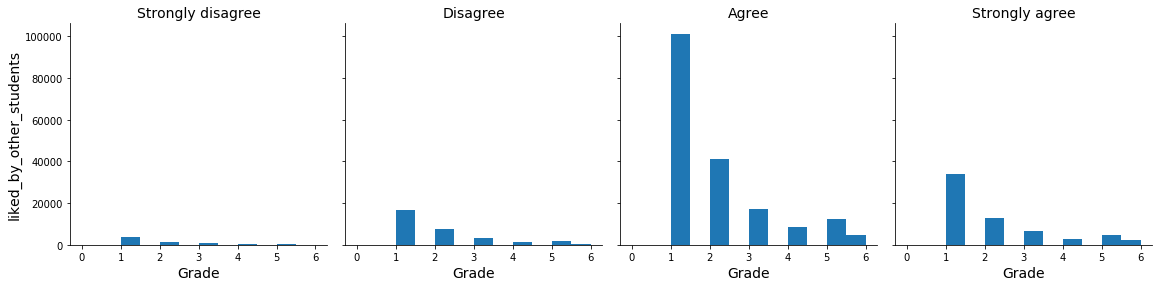

In [85]:
# Let's see the distribution for each one alone using faceting
make_dist(var, agree_disagree_df_clean)

Relation with teachers is poitive relation with grades and teachers have a great role in high grades 

#### Does sense of belonging affects the student grade?

In [86]:
# Let's see the relation with the grade
var=["feel_like_outsider", "make_friends_easily", "belong_at_school"]
make_boxplot(var, 20, 10)

Students that feel outsider get higher marks

It doesn't matter whether you make friends easily or not and whether you belong to school or not

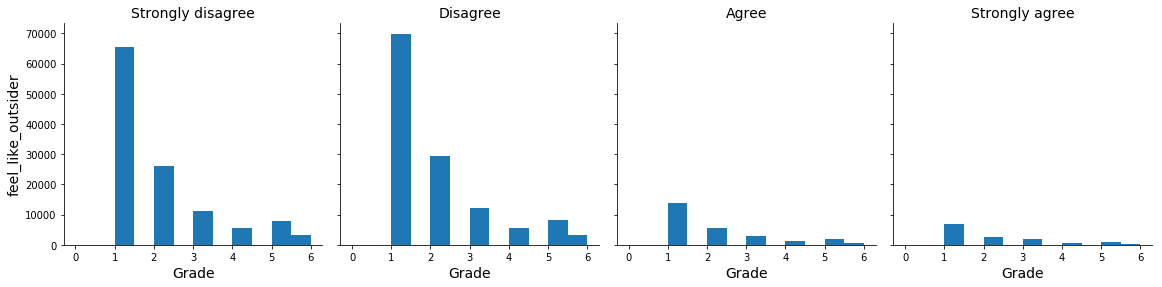

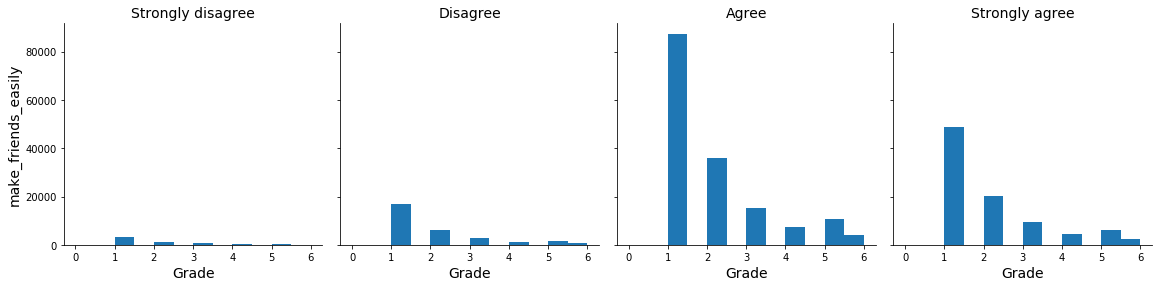

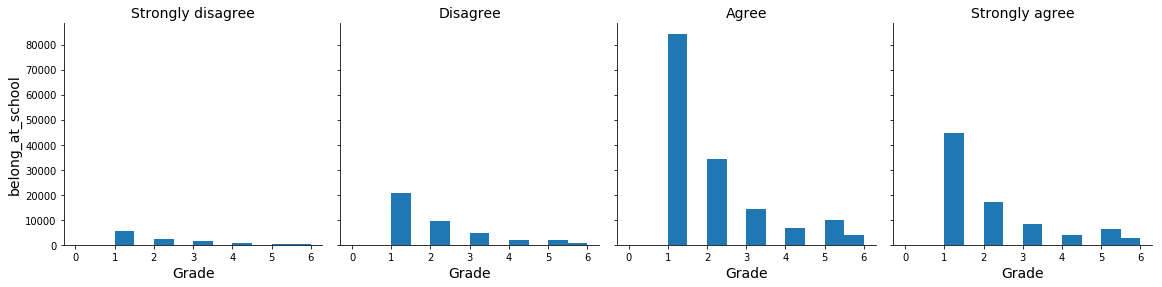

In [87]:
# Let's see the distribution for each one alone using faceting
make_dist(var, agree_disagree_df_clean)

Unlike the boxplot the outsiders get lower mark, belonging to school and making friends easily lead to high grades.

#### Does the Psychological state affect the grade?

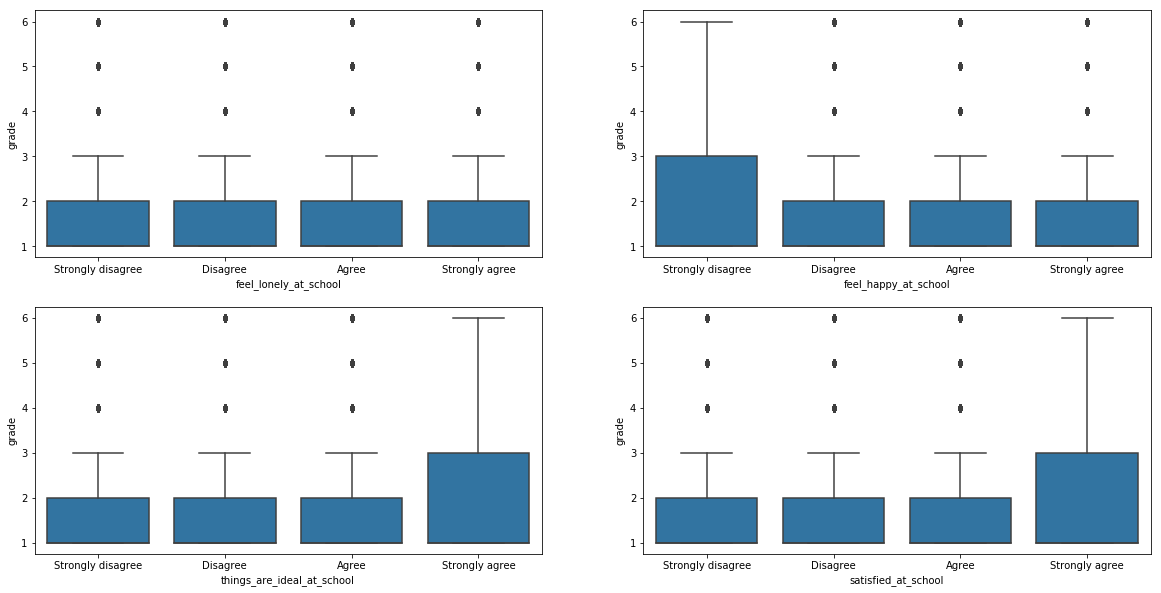

In [88]:
# Let's see the relation with the grade usin boxplot
var=["feel_lonely_at_school", "feel_happy_at_school", "things_are_ideal_at_school", "satisfied_at_school"]
make_boxplot(var, 20, 10)

Psychological state affect the grade

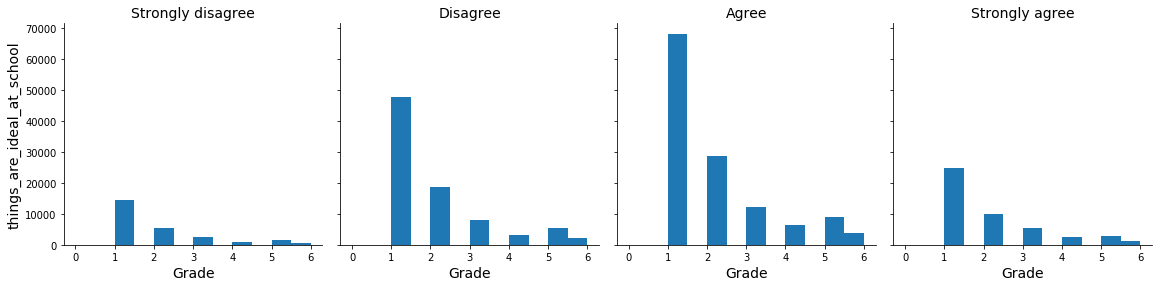

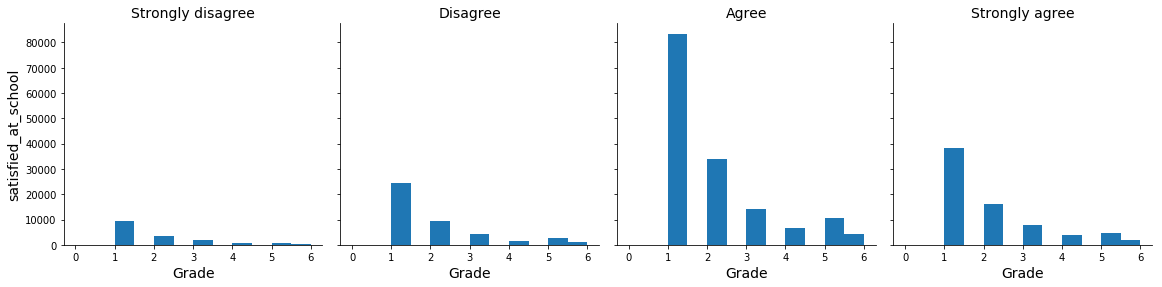

In [89]:
# Let's see the distribution for each one alone using faceting
make_dist(var, agree_disagree_df_clean)

Psychological state affect the grade

#### Does the thought about the school affects the grades?

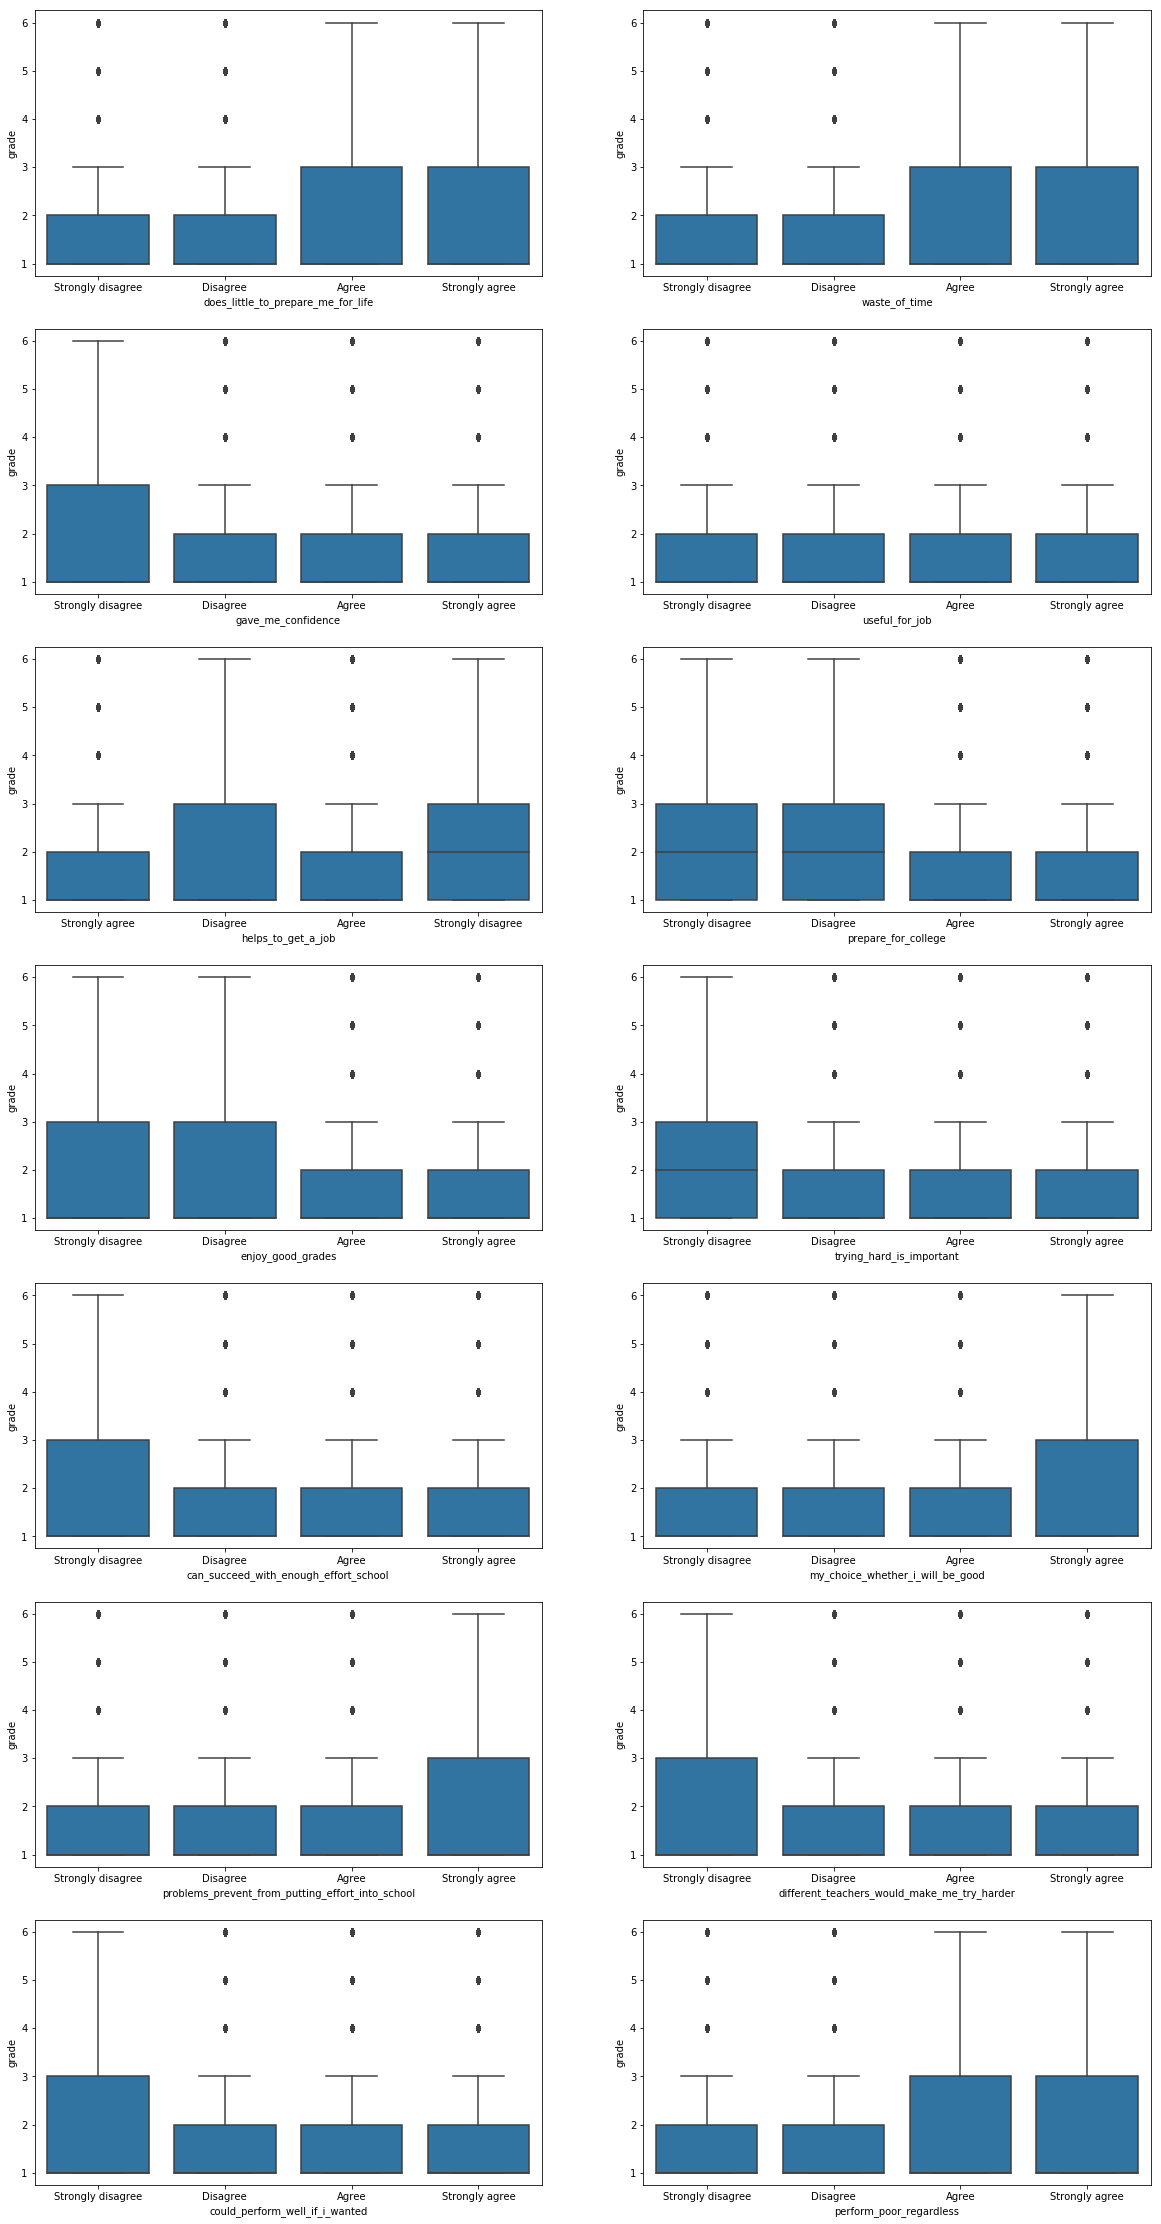

In [90]:
# Let's see the relation with the grade usin boxplot
var=["does_little_to_prepare_me_for_life", "waste_of_time", "gave_me_confidence", "useful_for_job",
    "helps_to_get_a_job", "prepare_for_college", "enjoy_good_grades", "trying_hard_is_important",
    "can_succeed_with_enough_effort_school", "my_choice_whether_i_will_be_good", 
    "problems_prevent_from_putting_effort_into_school", "different_teachers_would_make_me_try_harder",
    "could_perform_well_if_i_wanted", "perform_poor_regardless"]
make_boxplot(var)


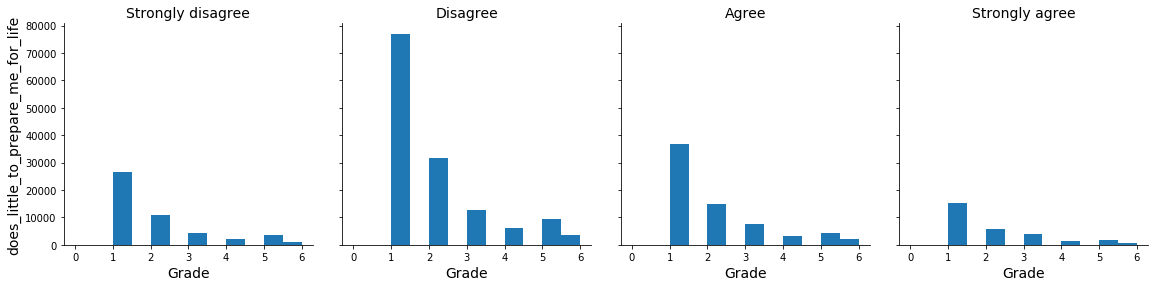

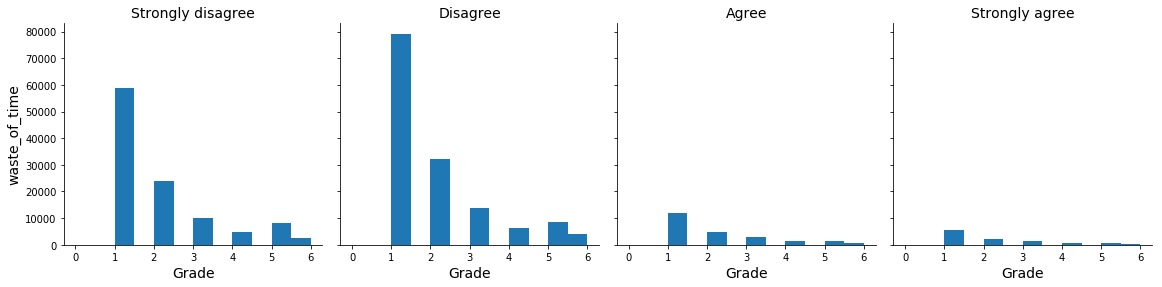

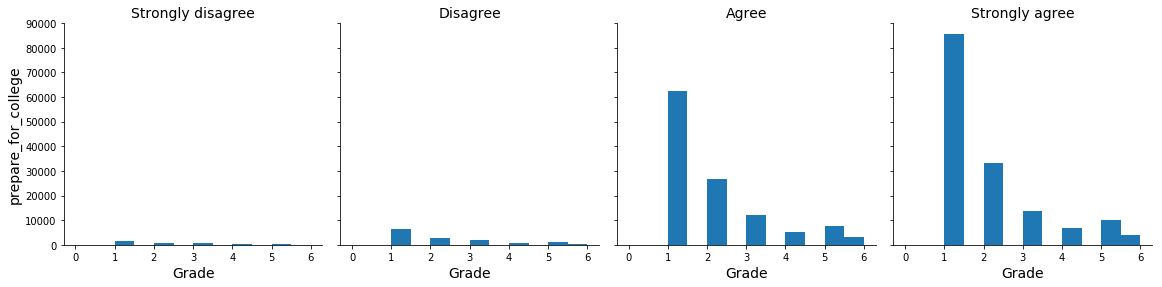

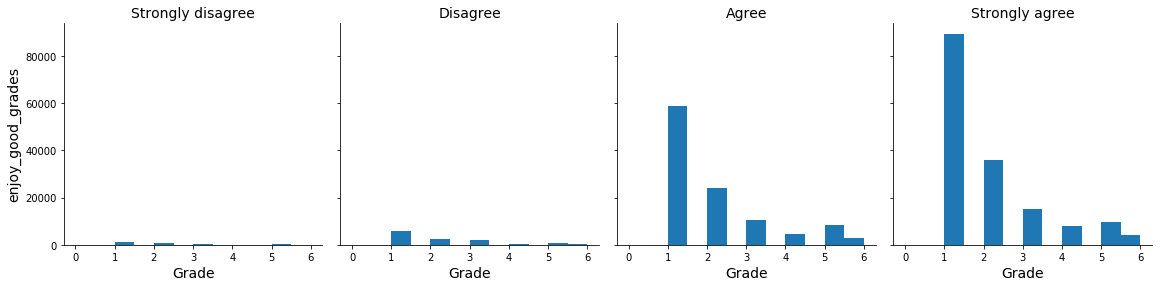

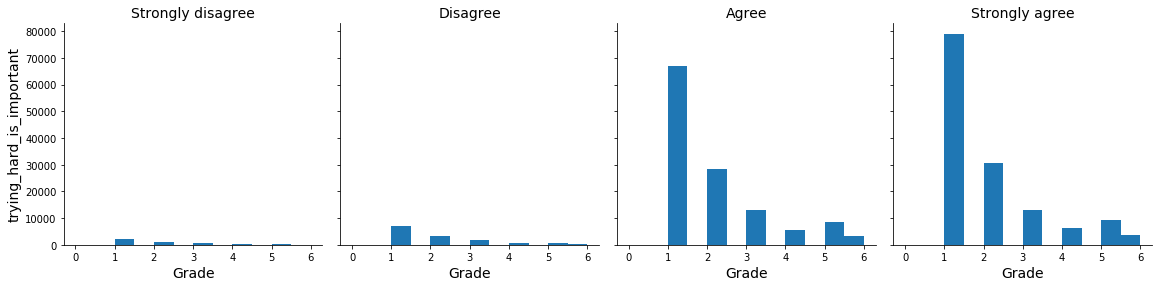

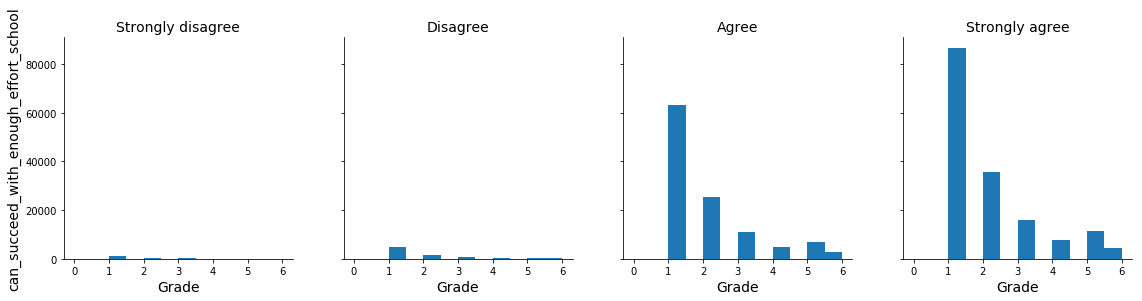

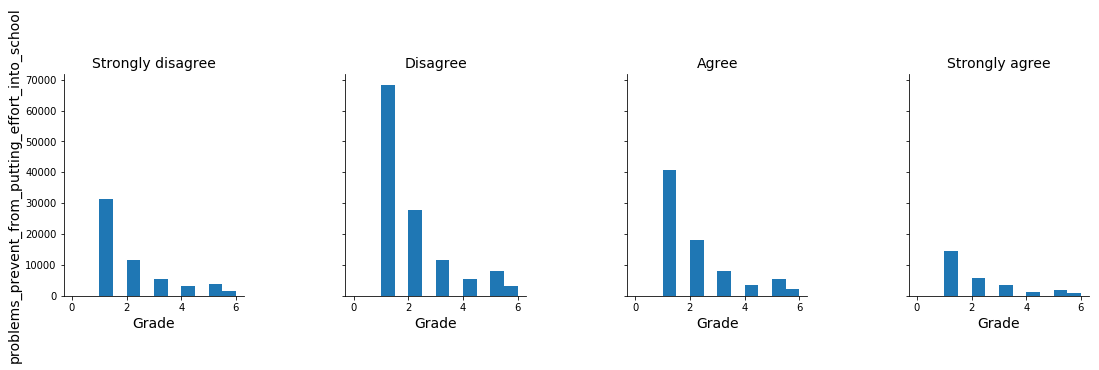

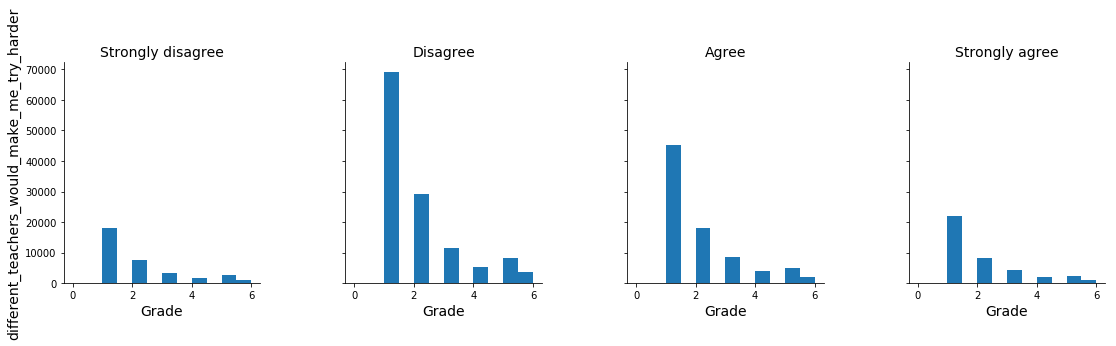

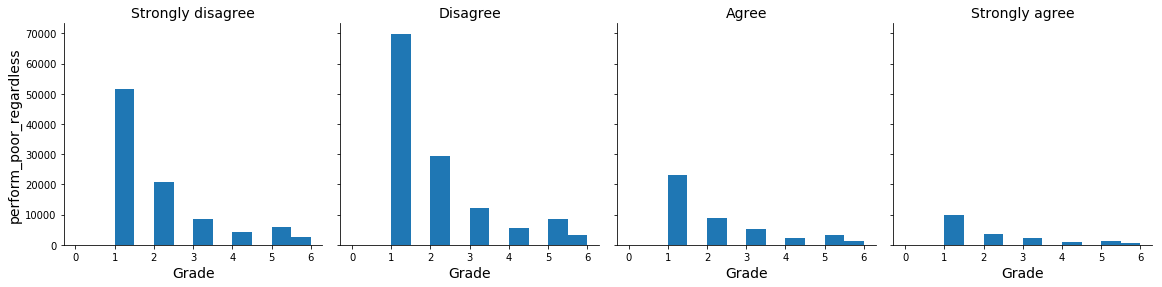

In [91]:
# Let's see the distribution for each one alone using faceting
make_dist(var, agree_disagree_df_clean)

Students who thought that school doesn't waste of time, gave him confident, useful for job, helps to get a job, tryig hard s important, high grades depends on him get high grades



#### Does the attitudes affects the grades?

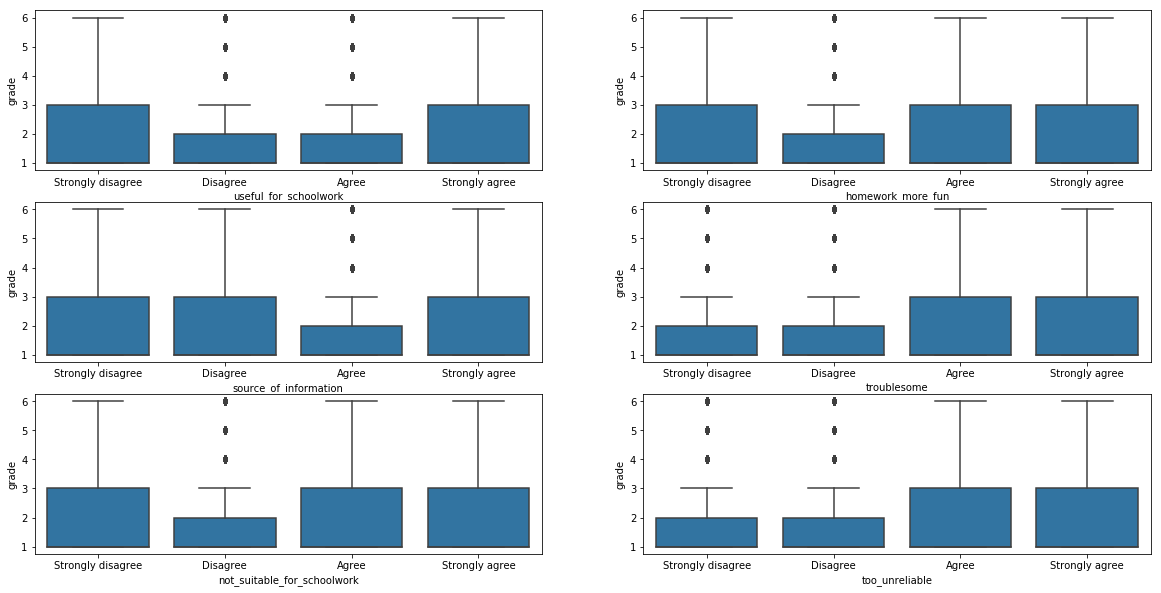

In [92]:
# Let's see the relation with the grade usin boxplot
var=["useful_for_schoolwork", "homework_more_fun", "source_of_information", "troublesome", "not_suitable_for_schoolwork",
    "too_unreliable"]
make_boxplot(var, 20, 10)

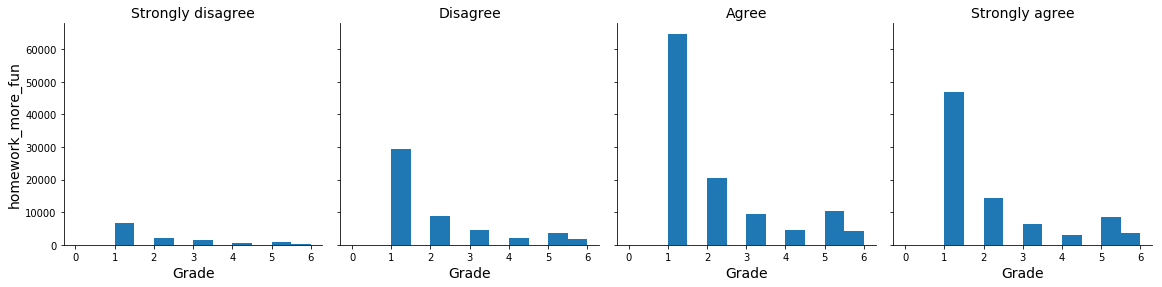

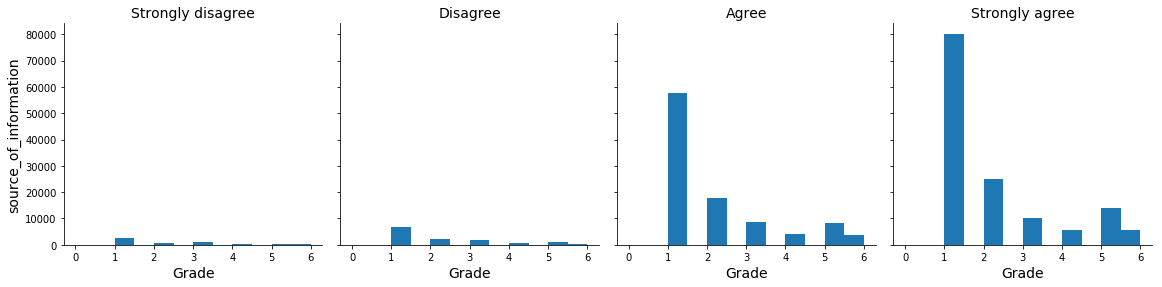

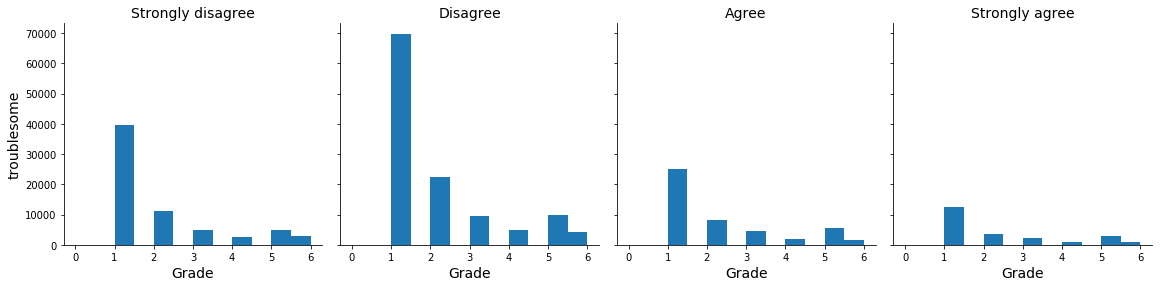

In [93]:
# Let's see the distribution for each one alone using faceting
make_dist(var, agree_disagree_df_clean)

Any good attitudes leads to good grades and any bad attitudes leads to bad grades

#### Does parents opinions affects the grades? 

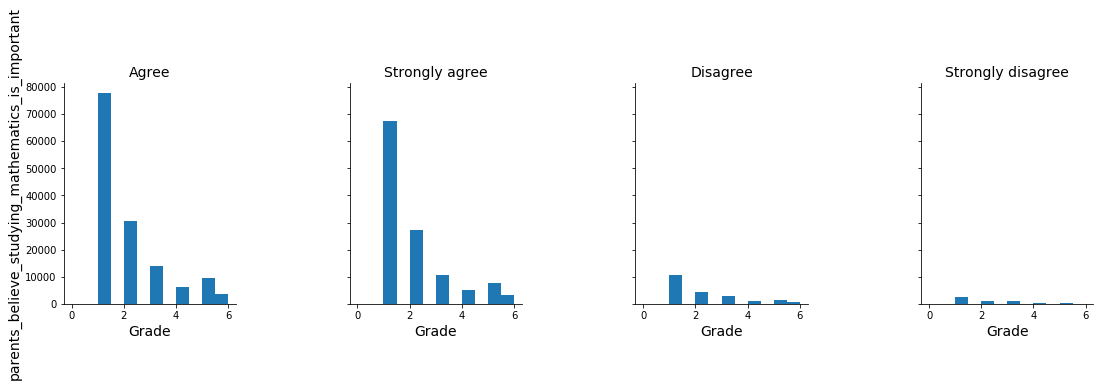

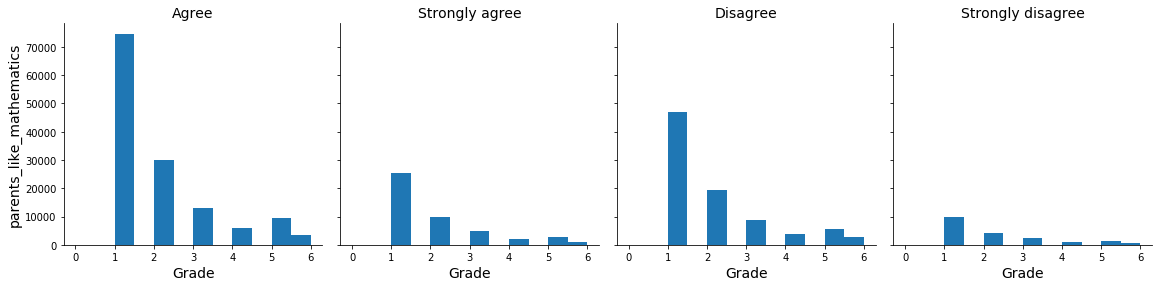

In [94]:
# Let's see the distribution for each one alone using faceting
make_dist(["parents_believe_studying_mathematics_is_important",
           "parents_believe_mathematics_is_important_for_career",
           "parents_like_mathematics"], agree_disagree_df_clean)

Parents beliefs affects students grades

wew, we have just finished `agree_disagree_df_clean` -the first table- let's go to the next one `teacher_roles_df_clean`

#### Does Teacher's Instructions affect the grades?

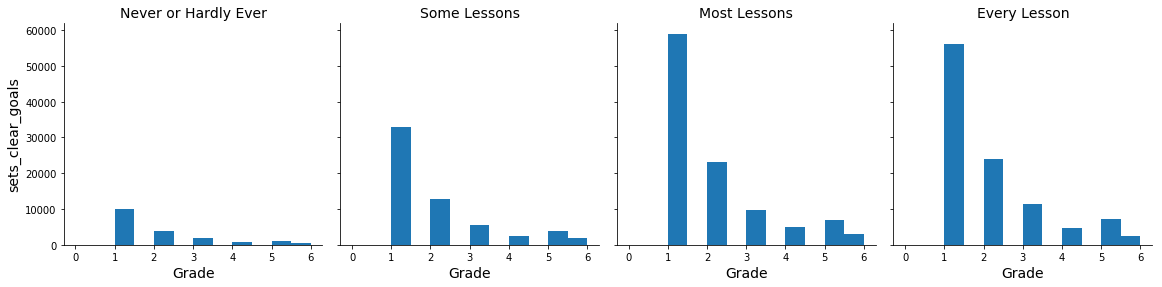

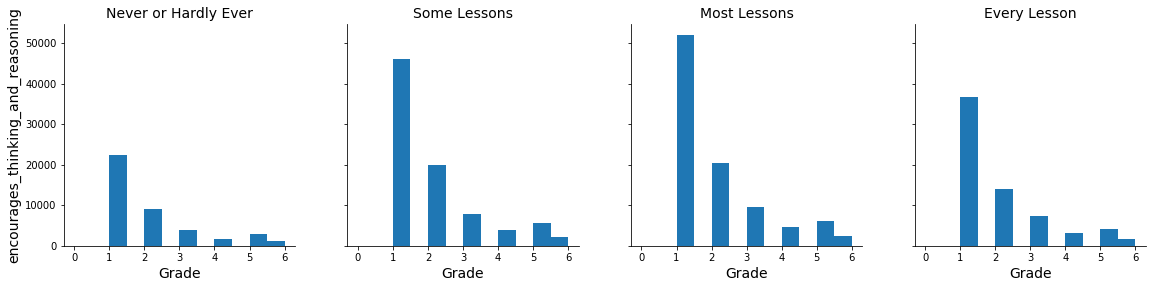

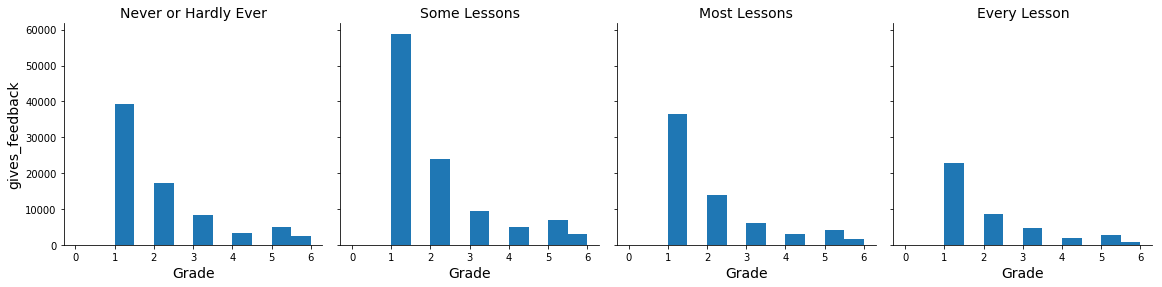

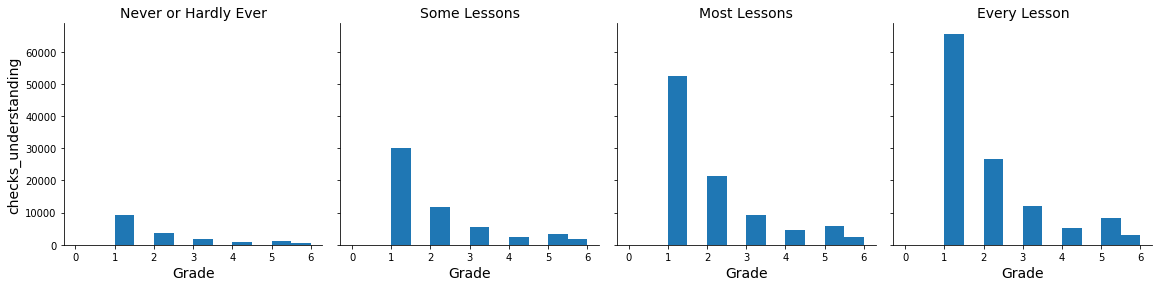

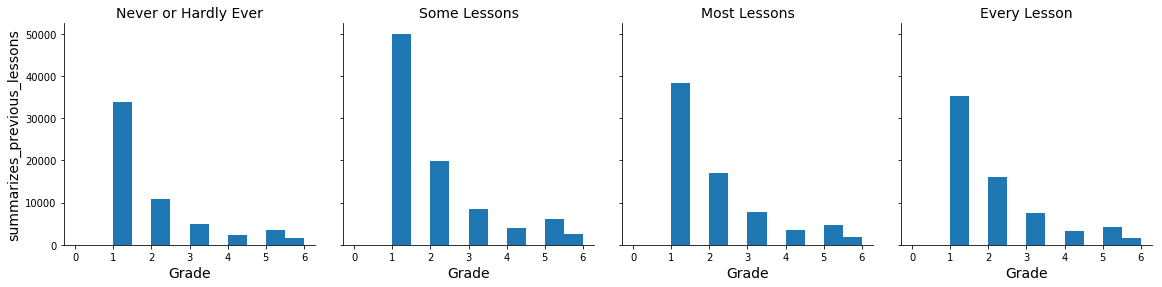

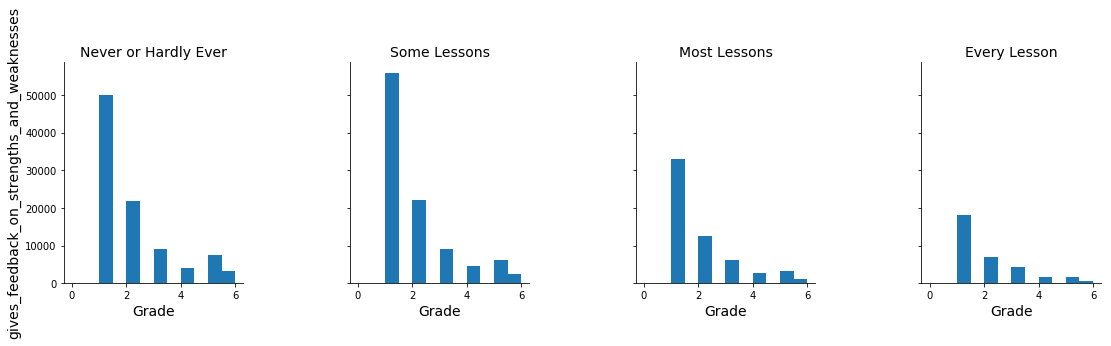

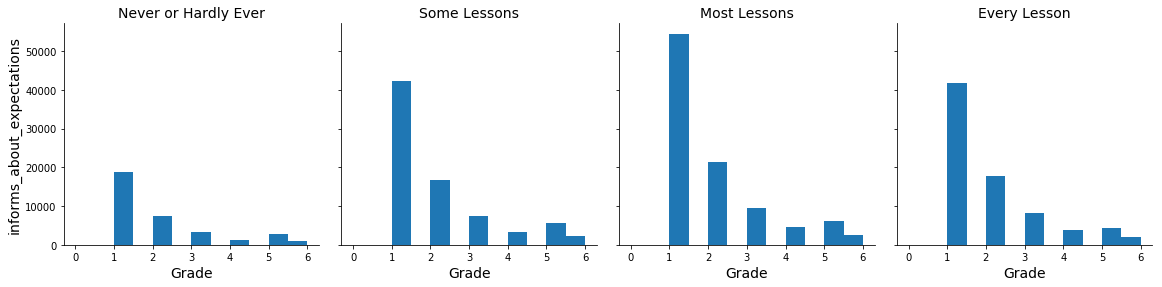

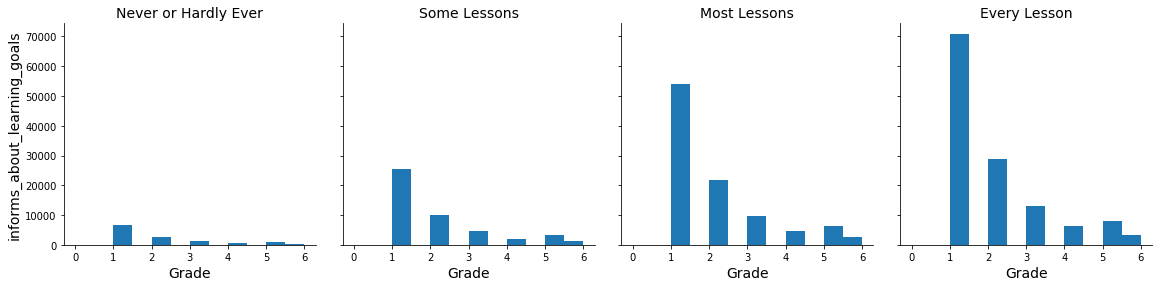

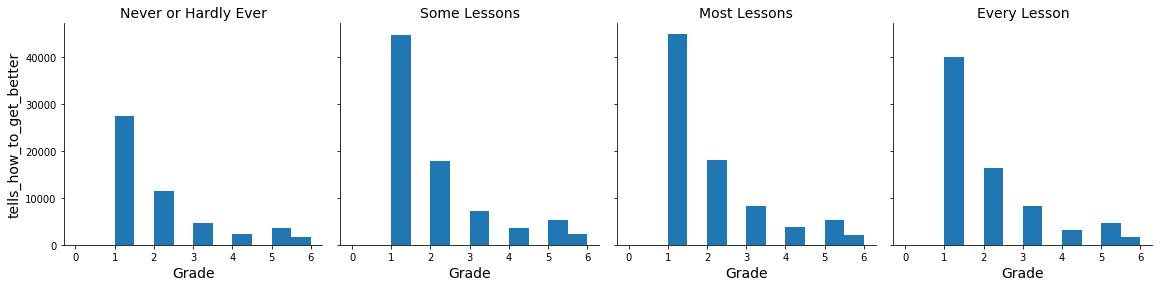

In [95]:
# Let's see the distribution for each one alone using faceting
make_dist(teacher_instructions, teacher_roles_df_clean)

Setting goals is important to get high grades and as you remind your self or your students increases the grades<br>
Encourge to think and reasoning is poitive relation with grades as you encourge student more grades increases<br>
giving feedback does not affect the grades very much
checks understanding affects the grades tremendously
summarizing affects the grades a bit
listing of how to get better increases the grades

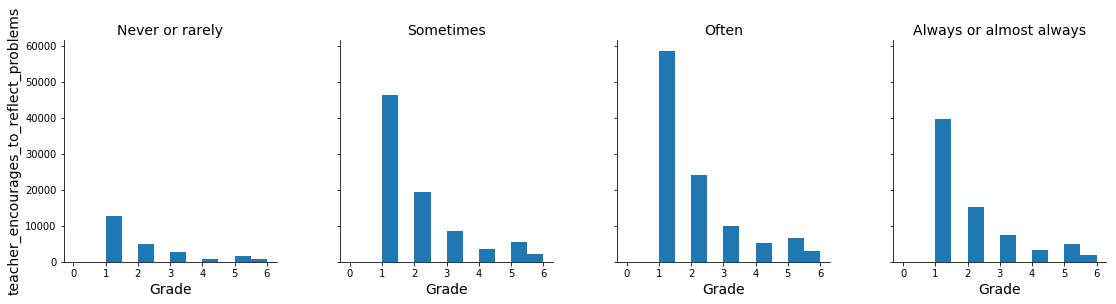

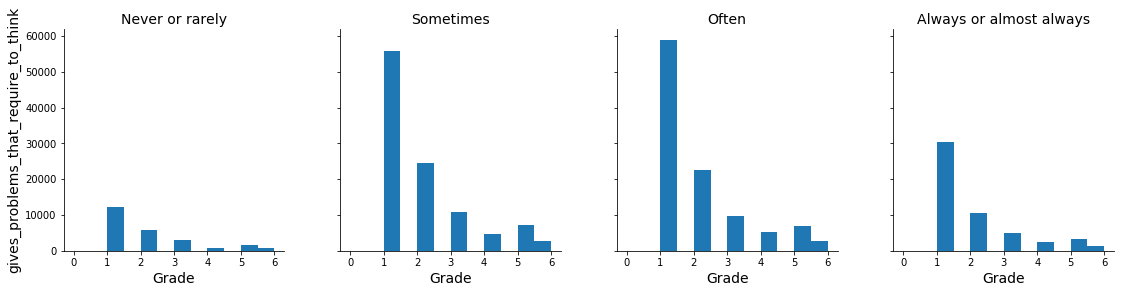

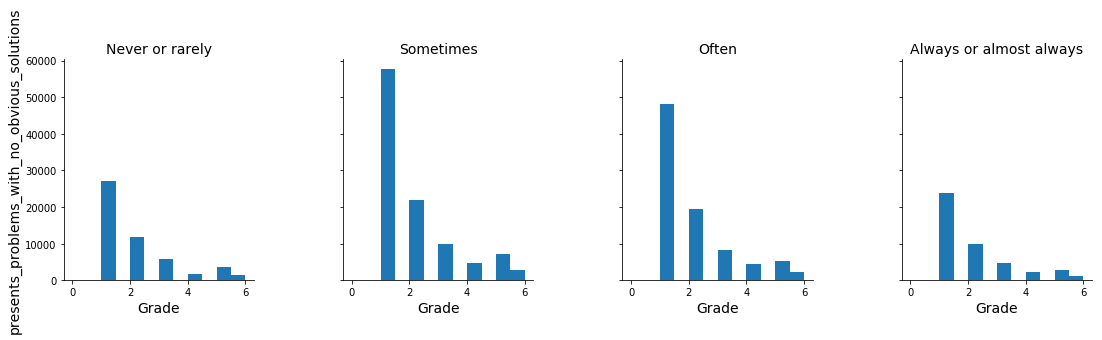

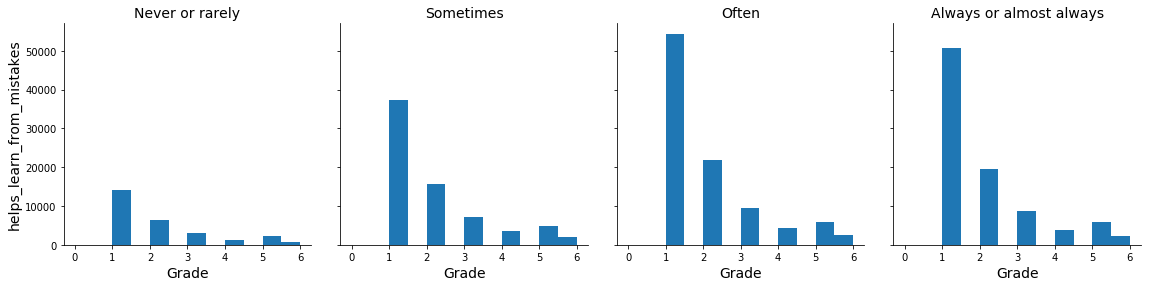

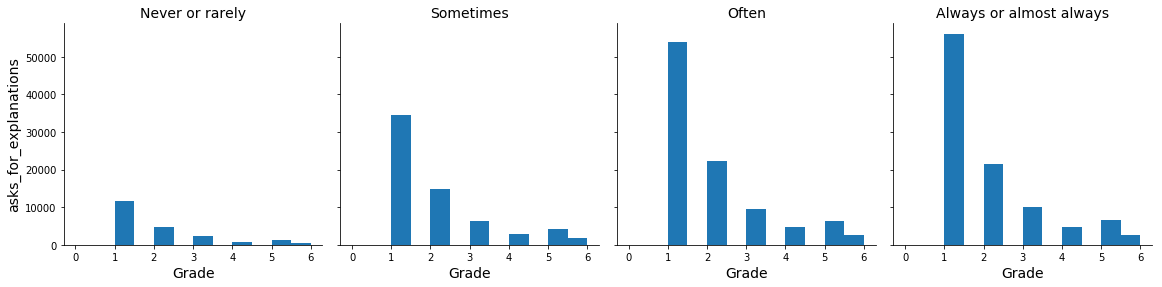

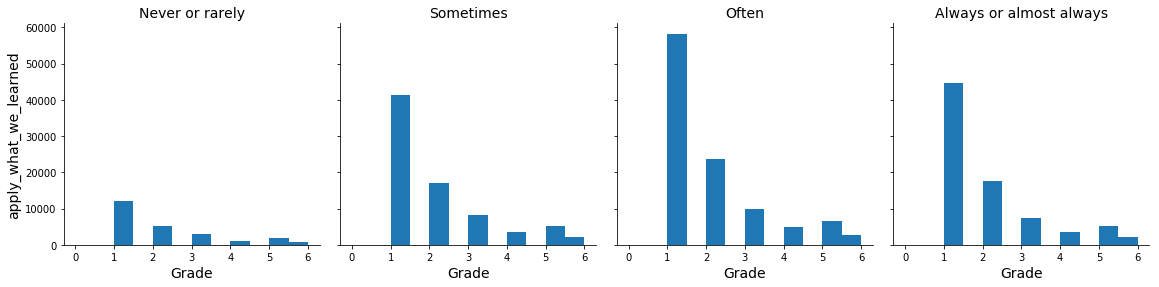

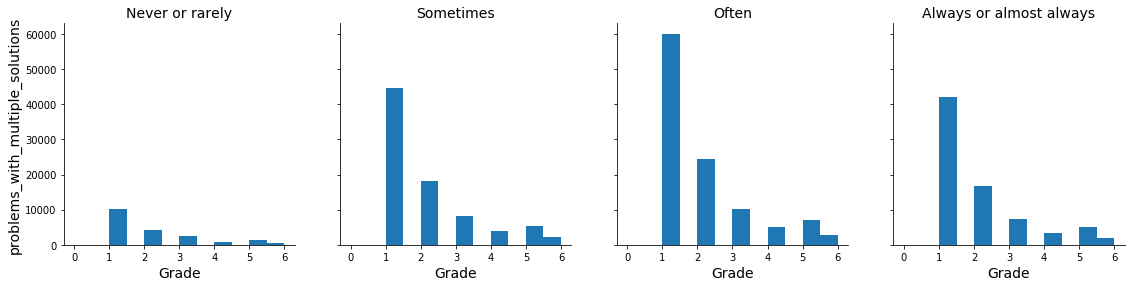

In [96]:
# Let's see the distribution for each one alone using faceting
make_dist(teacher_role1, teacher_roles_df_clean)

Making students think help in increasing the grades but not always teachers sometimes need to help students<br>
As teacher asks students for explainations increases grades increases<br>
Making students apply what they learned help in increasing the grades but teachers should not do that always

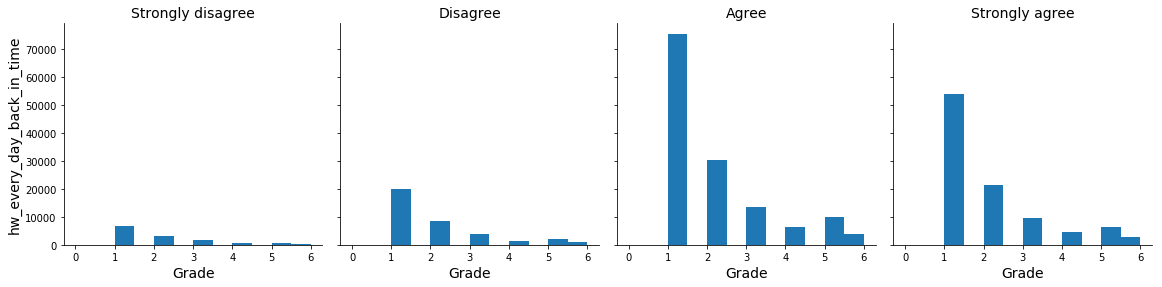

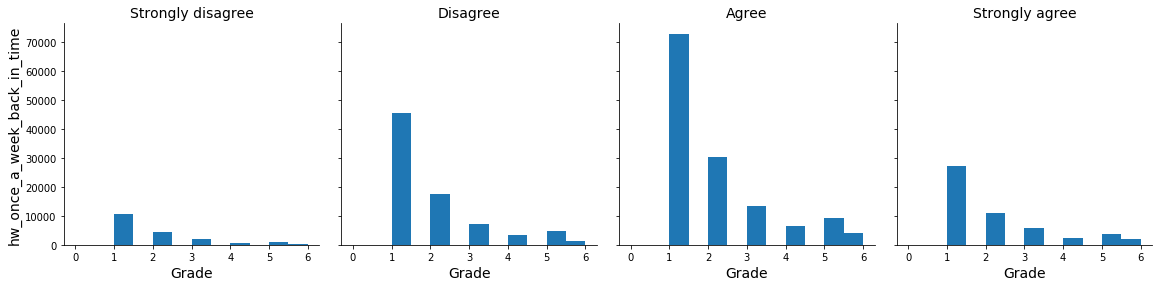

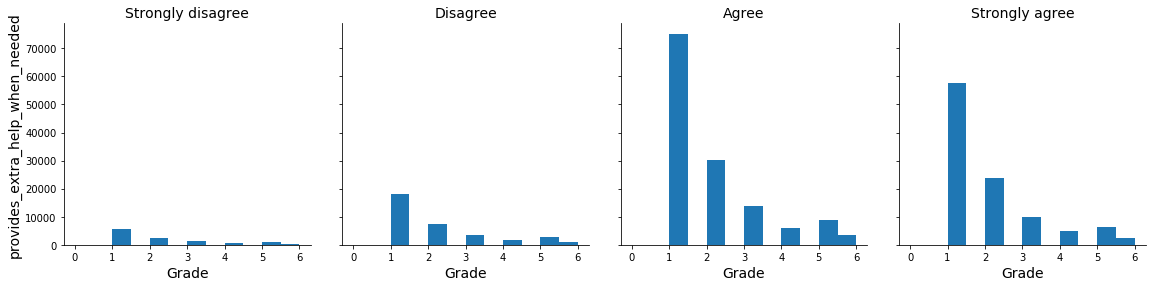

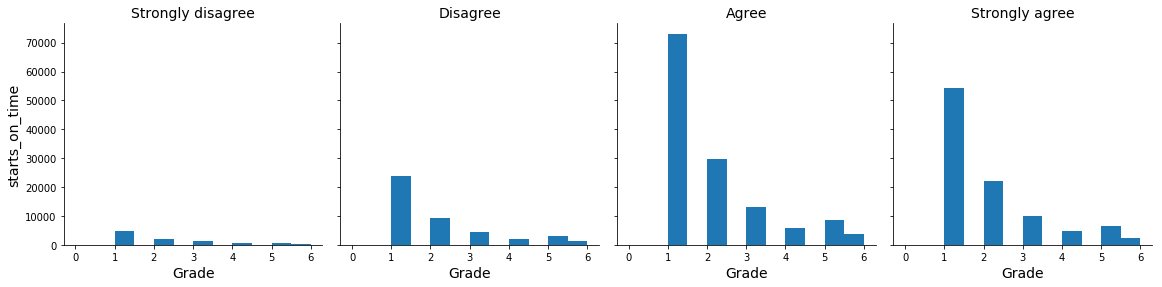

In [97]:
# Let's see the distribution for each one alone using faceting
make_dist(teacher_support, teacher_roles_df_clean)

Again teacher's role is important 

More homework means more grades

Let's go to the next one

#### Does confidence affect the grades?

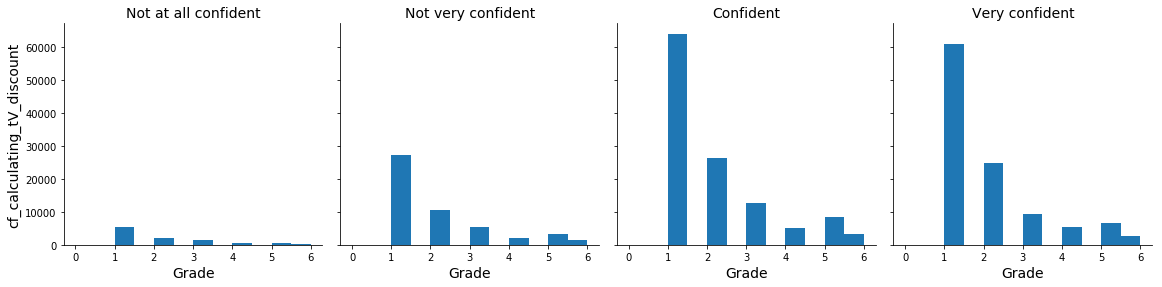

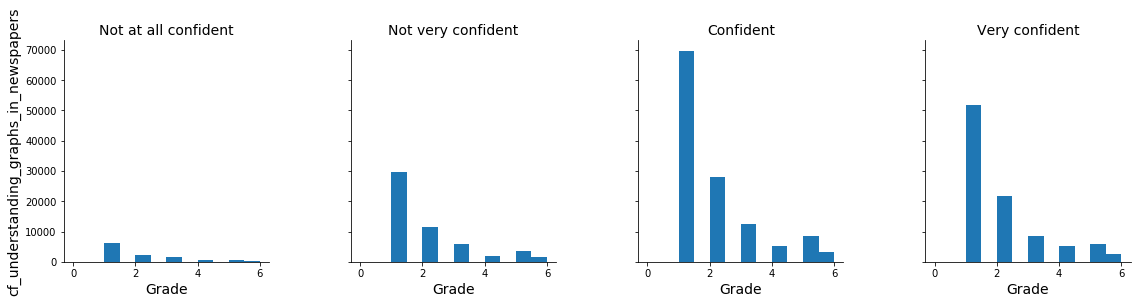

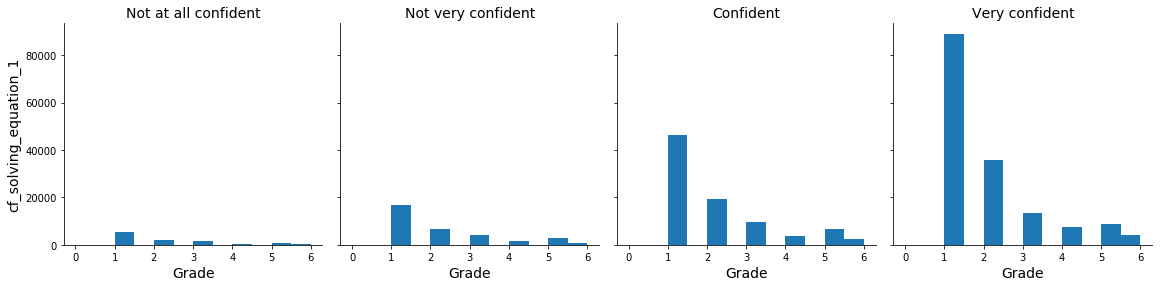

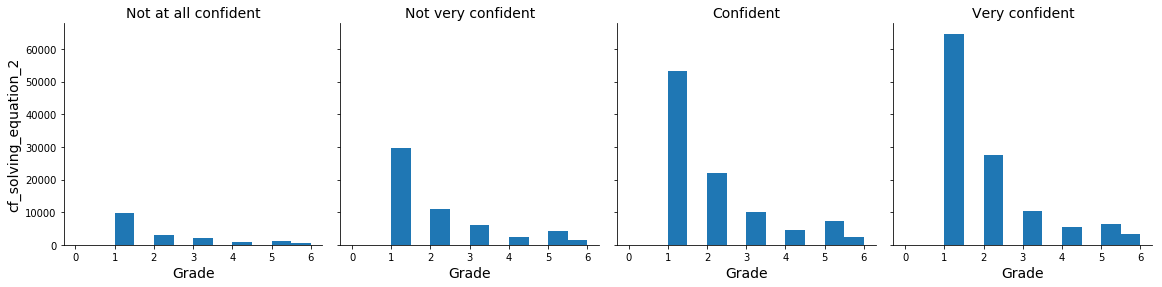

In [98]:
# Let's see the distribution for each one alone using faceting
make_dist(student_confidence, student_roles_df_clean)

You needn't to be very confident just confident at most of the previous data to get high grades
You prefered to be very confident at solving equation to get high grades as confident increases high grades increases

#### What students say about bad grades and what the impact of this on the grades?

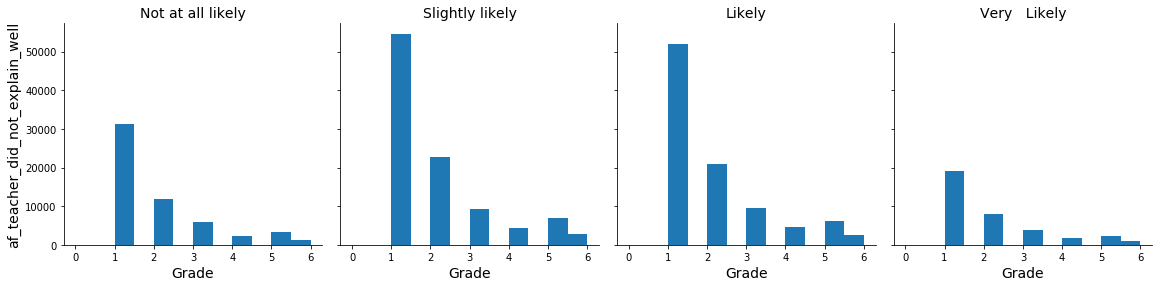

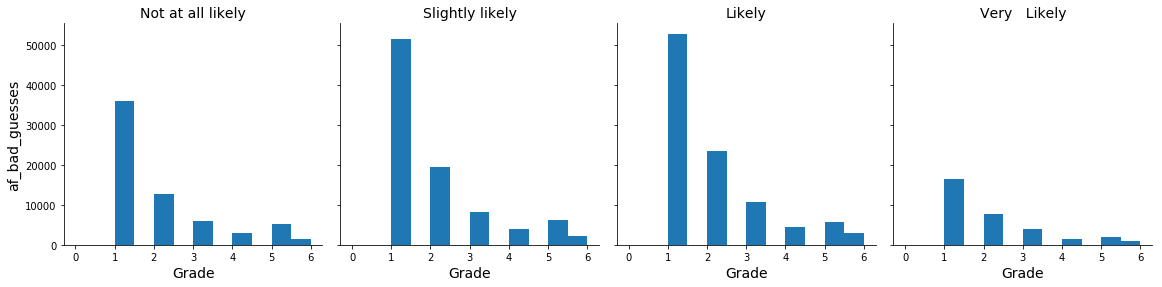

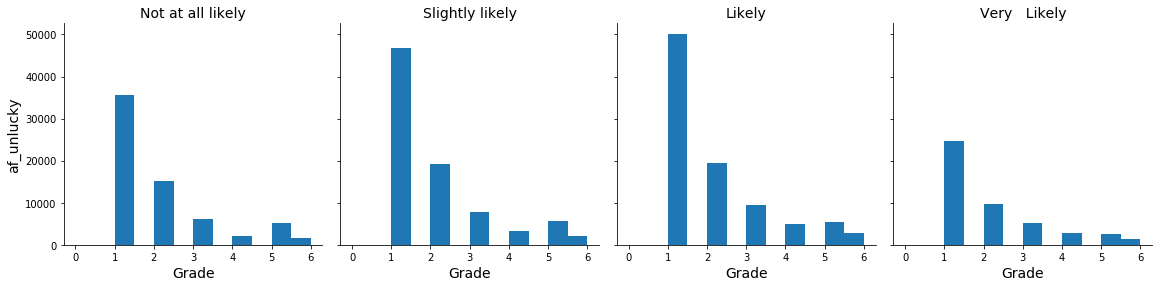

In [99]:
# Let's see the distribution for each one alone using faceting
make_dist(student_attribution_failure, student_roles_df_clean)

Students that thought that they aren't good at math likely to get high grades
Students that thought that teachers slightly didn't explain well more likely to get high grades
Students that form bad guesses doesn't affect the garde
Students that thought that material get the highest mark
teacher didn't get students interested doesn't affect the grades
Students that thought doesn't affect the grades

#### what make student good at math?

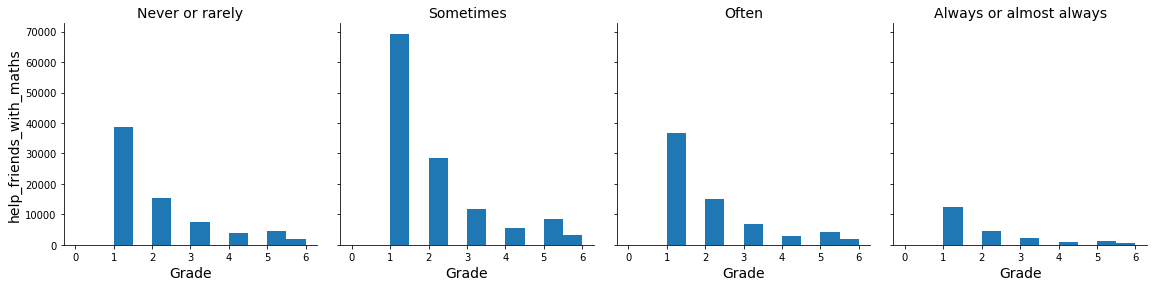

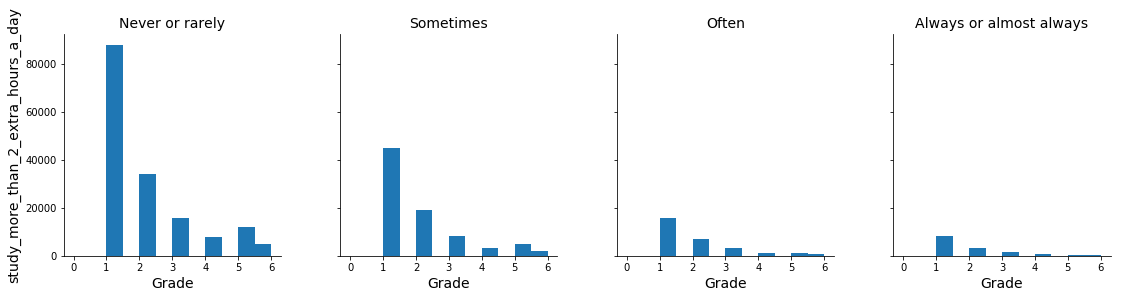

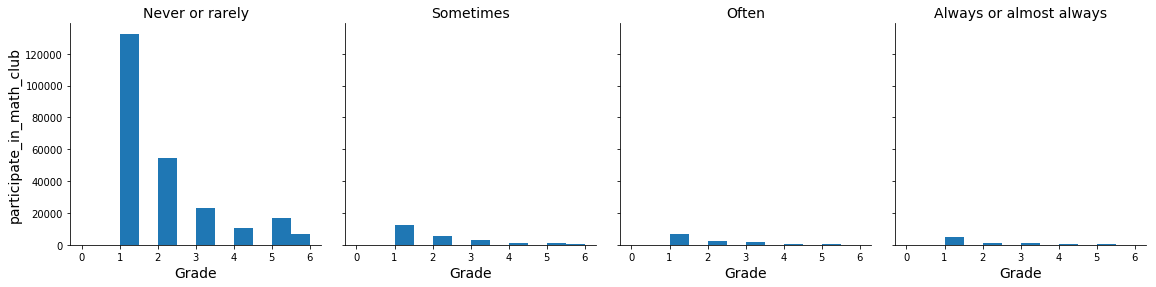

In [100]:
# Let's see the distribution for each one alone using faceting
make_dist(student_way, student_roles_df_clean)

Good grades doesn't depends on participating in activity related to subject

In [101]:
# Let's see the distribution for each one alone using faceting
make_dist(["important_parts_vs._existing_knowledge_vs._learn_by_heart", "improve_understanding_vs._new_ways_vs._memory", 
           "other_subjects_vs._learning_goals_vs._rehearse_problems", "repeat_examples_vs._everyday_applications_vs._more_information"], student_roles_df_clean)

You should study the most important, improve understanding, put a learning goal and finally repeat examples

#### Does Student Orientation affect the grades?

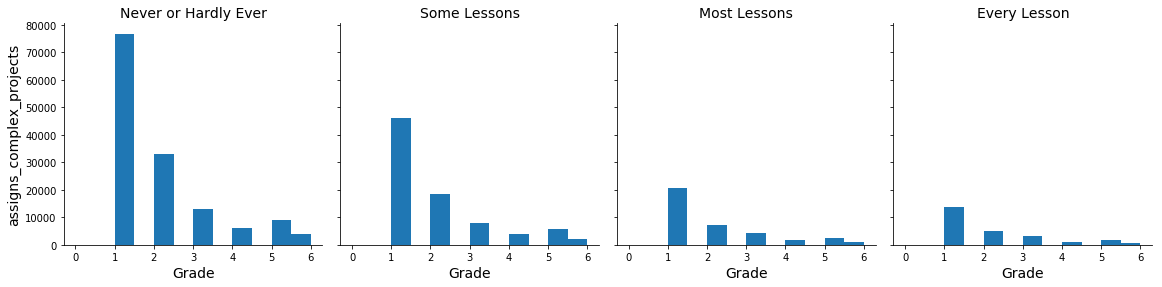

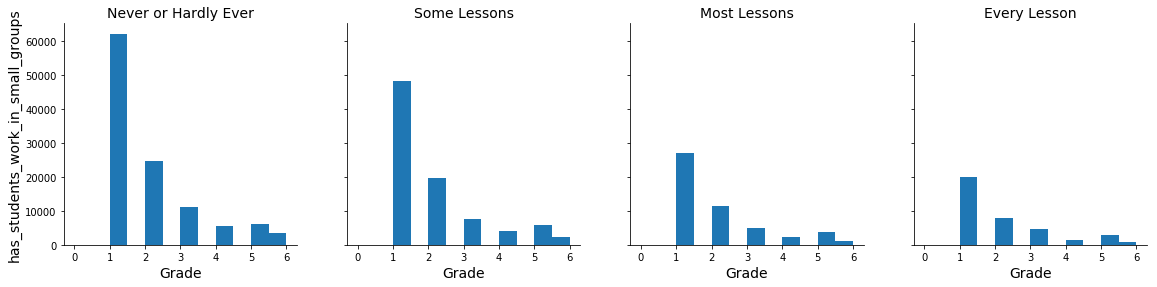

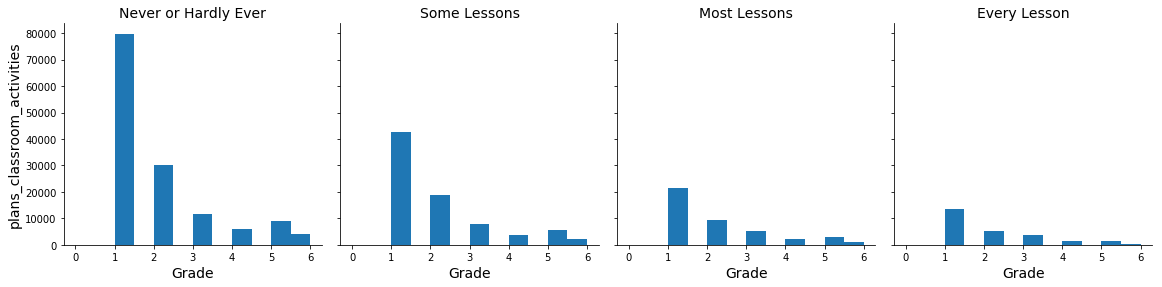

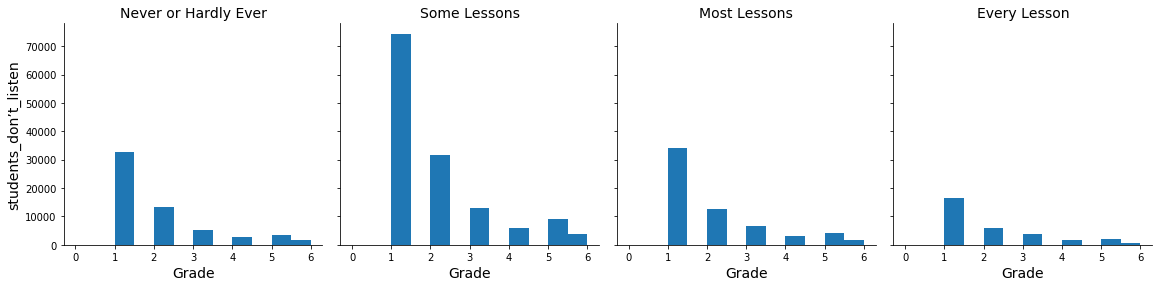

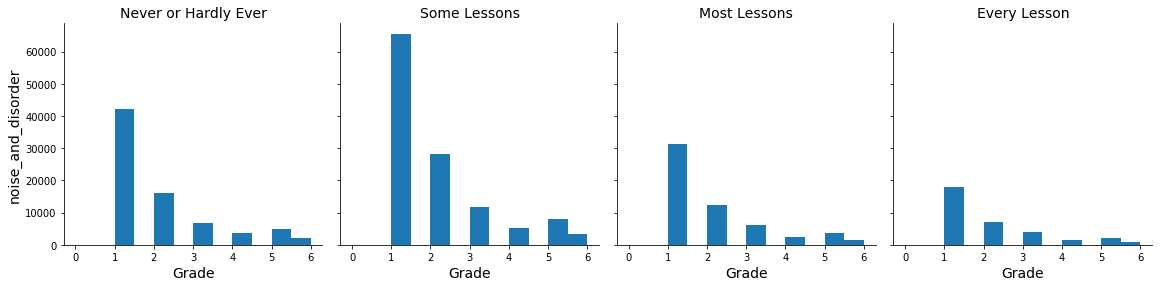

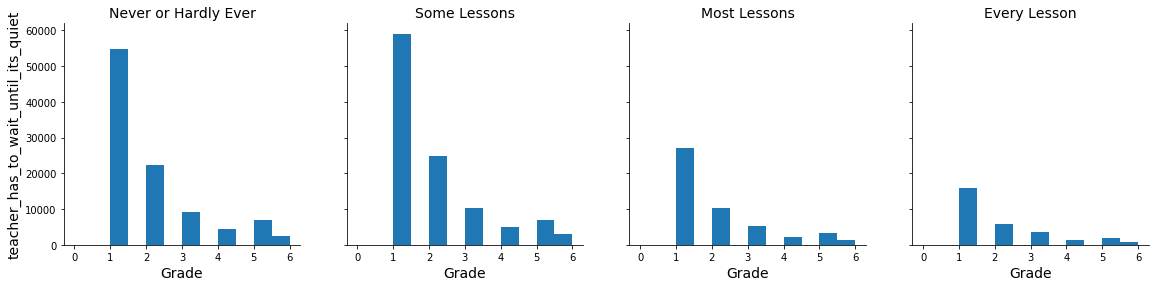

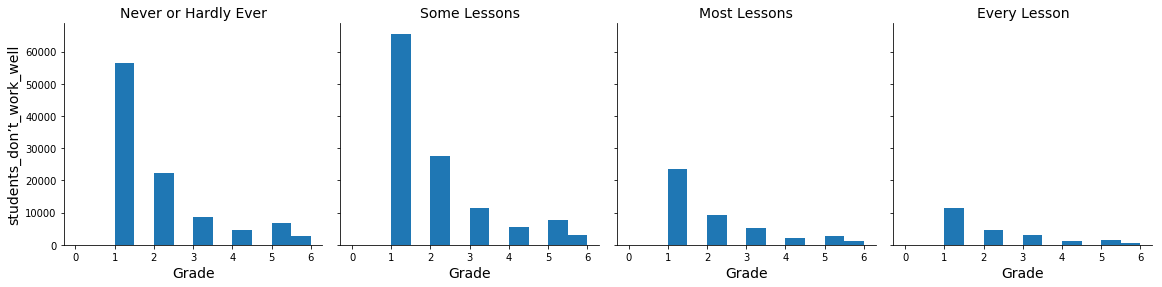

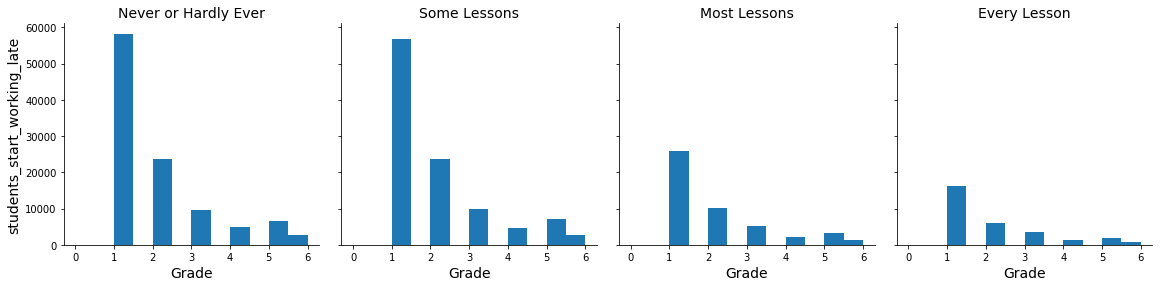

In [102]:
# Let's see the distribution for each one alone using faceting
make_dist(student_orientation, student_roles_df_clean)

Students who never assign complex or small projects tends to get high grades


#### What did you should do when you face a problem? 


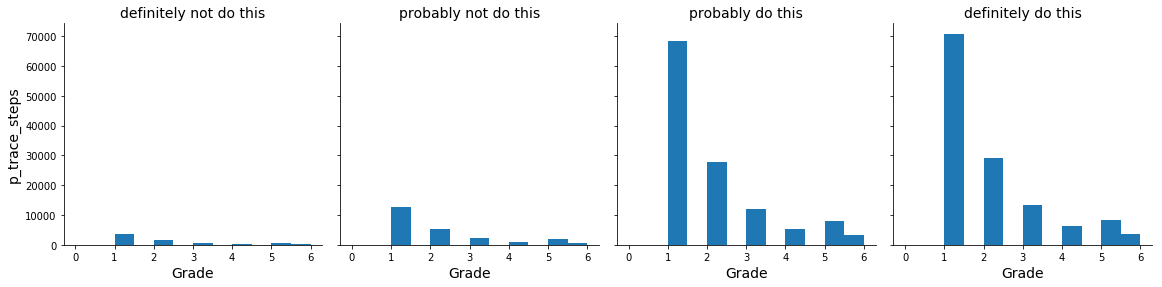

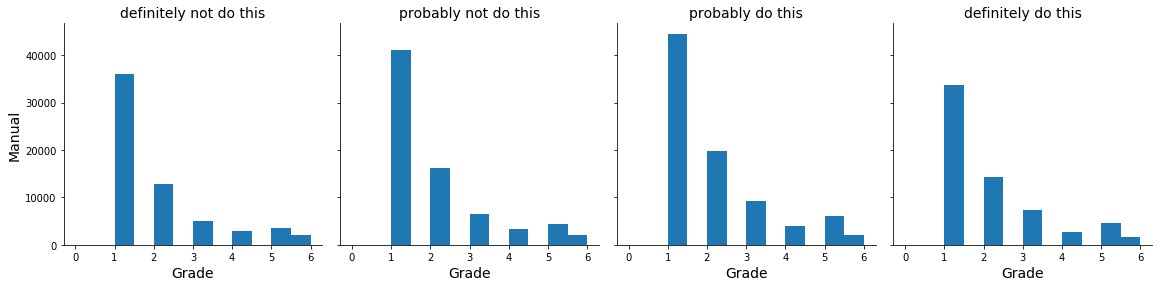

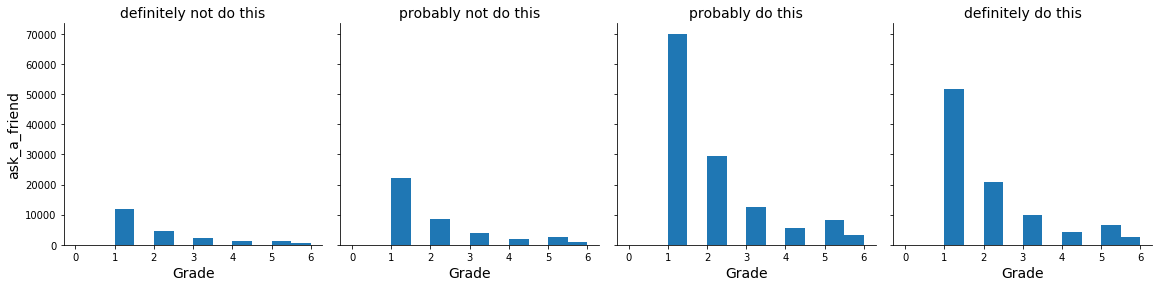

In [103]:
# Let's see the distribution for each one alone using faceting
make_dist(student_and_problem, student_roles_df_clean)

Traceing the problem and asking friends leads to high grades

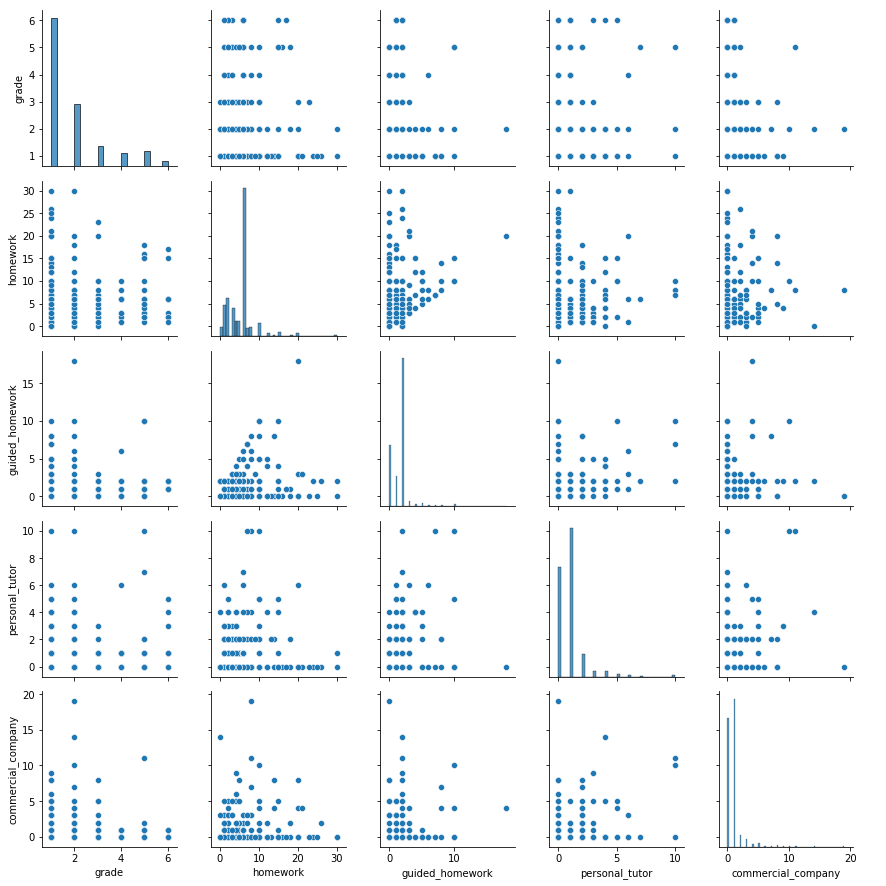

In [104]:
# plot matrix: sample 500 student_roles_df_clean so that plots are clearer and
# they render faster
samples = np.random.choice(student_roles_df_clean.shape[0], 500, replace = False)
student_samp = student_roles_df_clean.iloc[samples]

g = sb.pairplot(data = student_samp, vars = list(student_roles_df_clean.describe().columns[:5]))


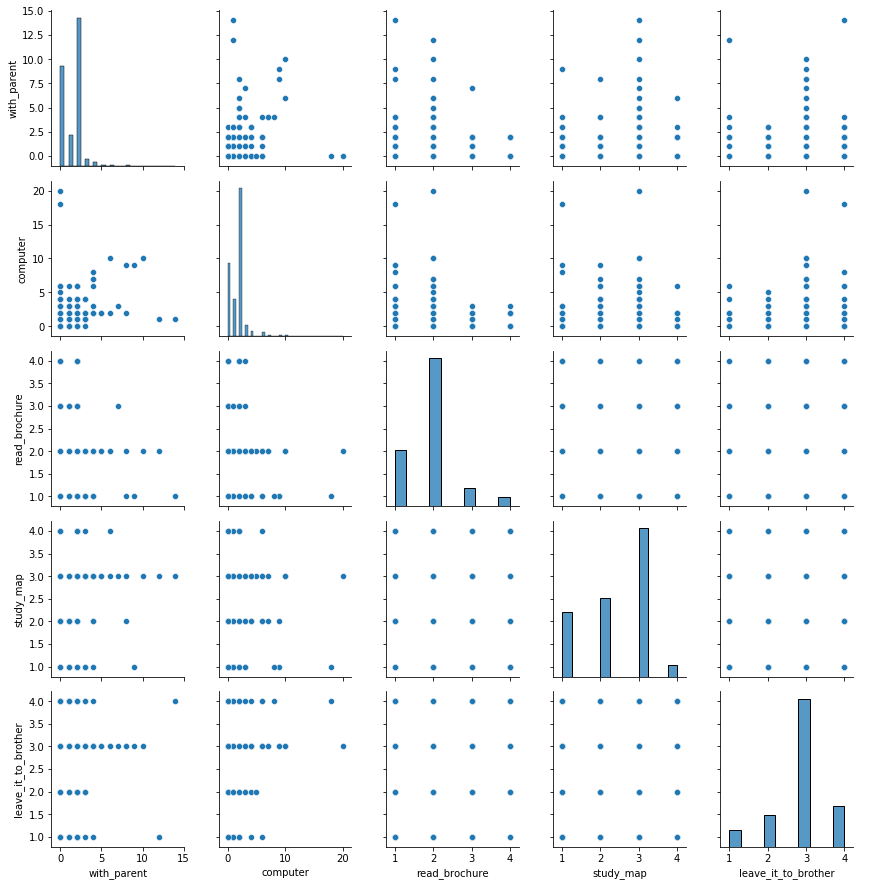

In [105]:
# plot matrix: sample 500 student_roles_df_clean so that plots are clearer and
# they render faster
sb.pairplot(data = student_samp, vars = list(student_roles_df_clean.describe().columns[5:10]))

In [106]:
# plot matrix: sample 500 student_roles_df_clean so that plots are clearer and
# they render faster
sb.pairplot(data = student_samp, vars = list(student_roles_df_clean.describe().columns[10:]))

In [107]:
# correlation plot of student
plt.figure(figsize = [20, 10])
sb.heatmap(student_roles_df_clean[student_roles_df_clean.describe().columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


The correlation is weak

C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\pc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

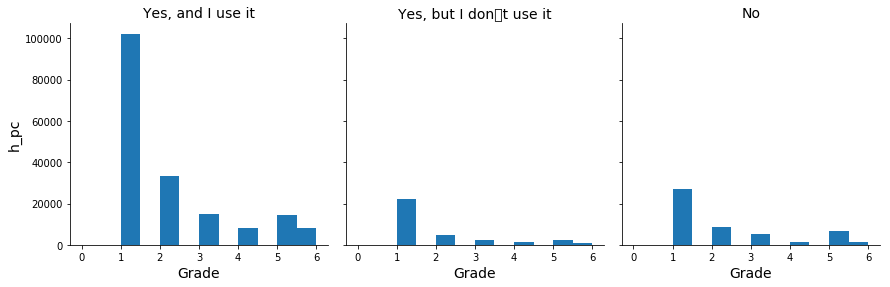

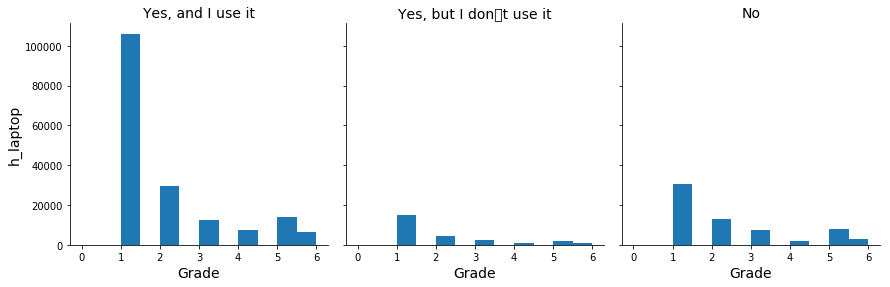

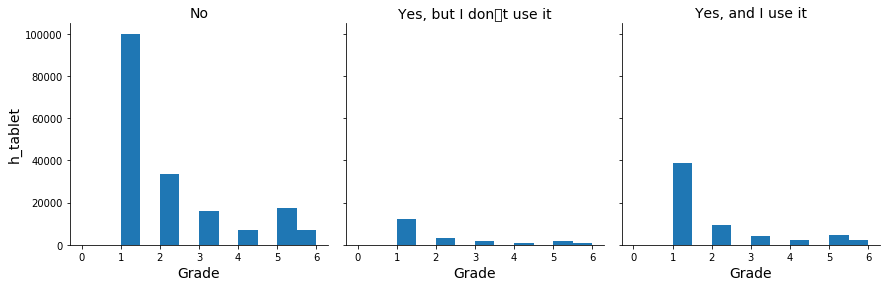

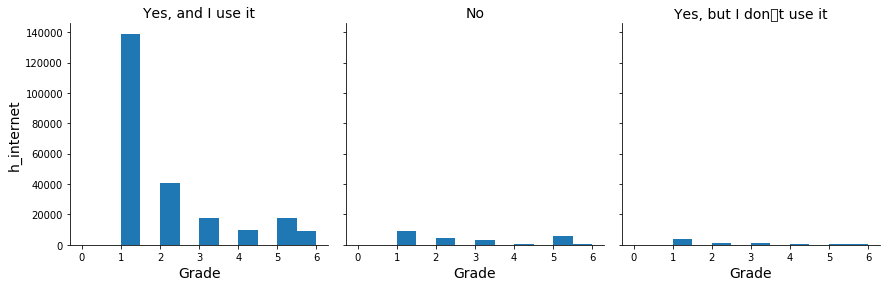

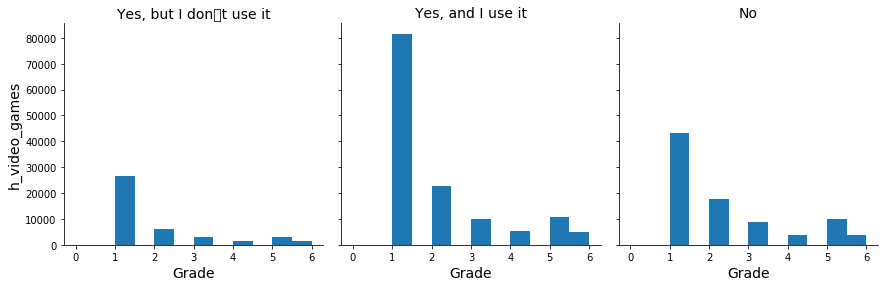

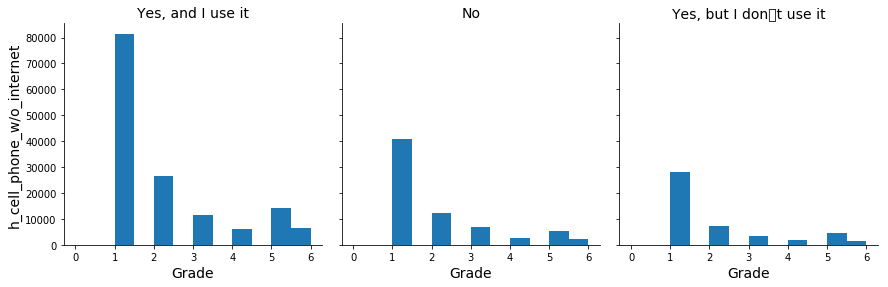

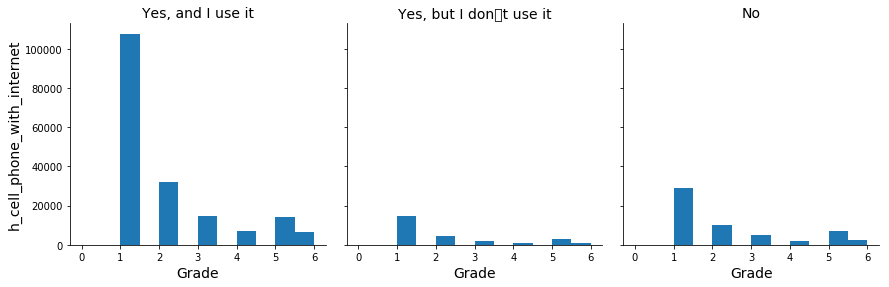

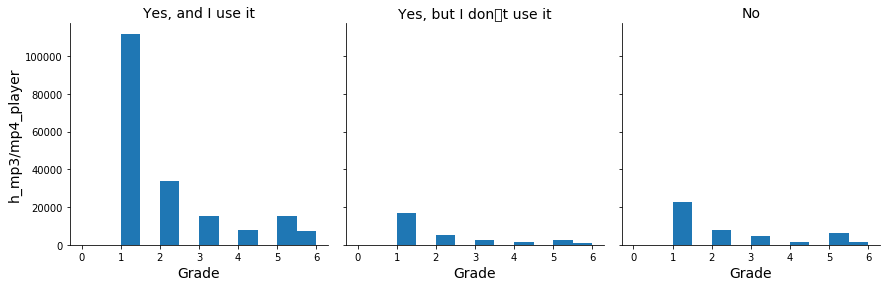

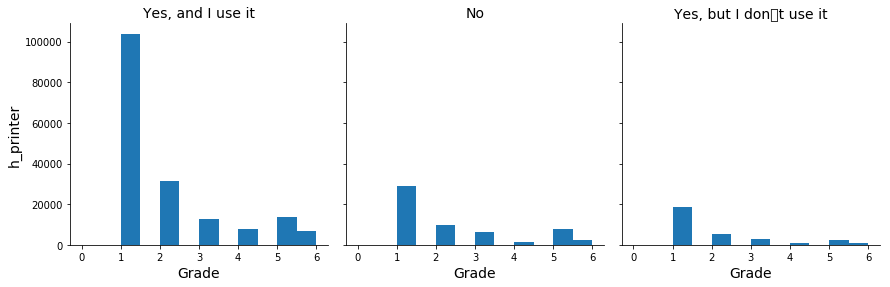

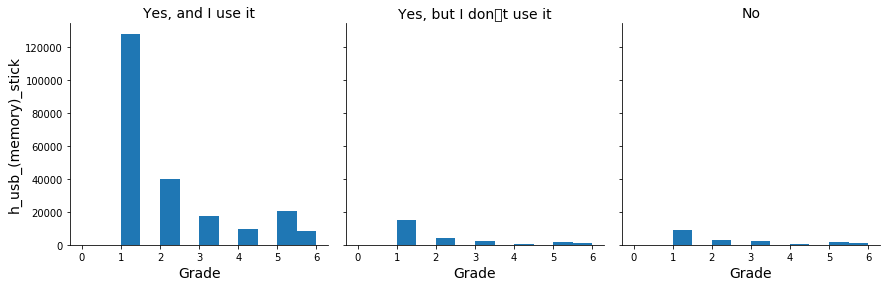

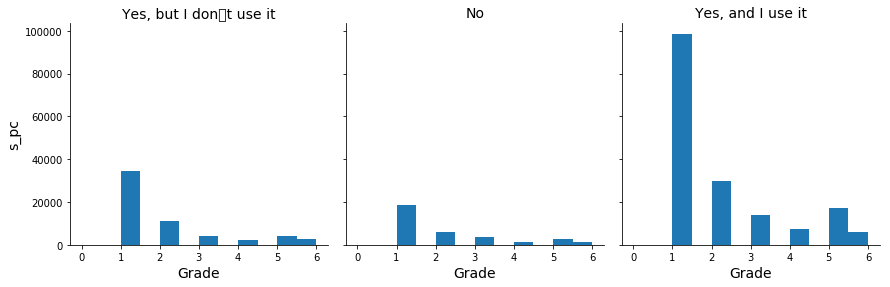

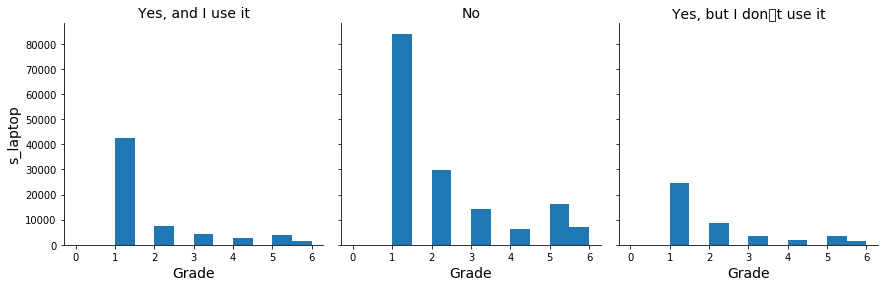

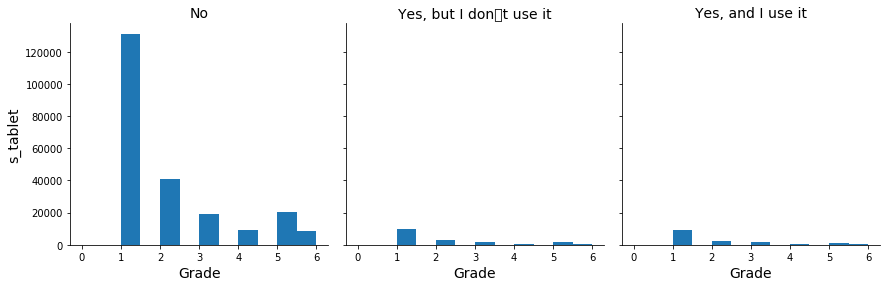

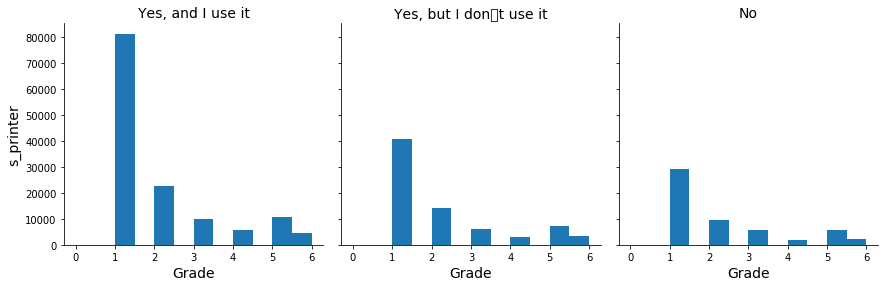

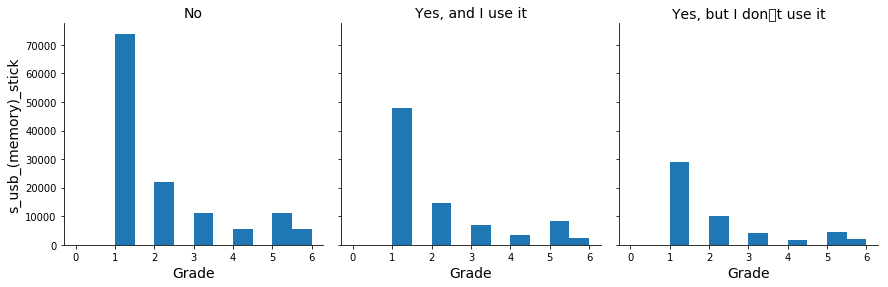

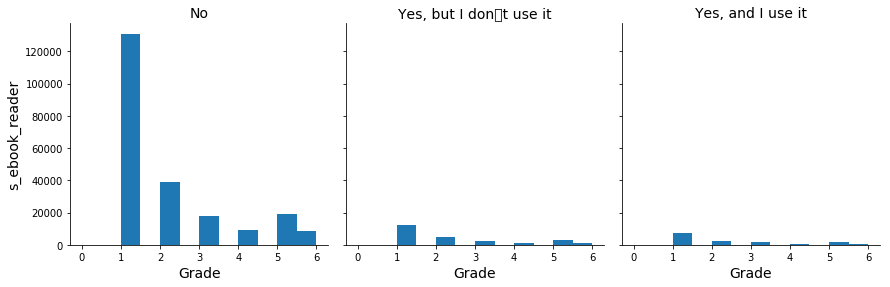

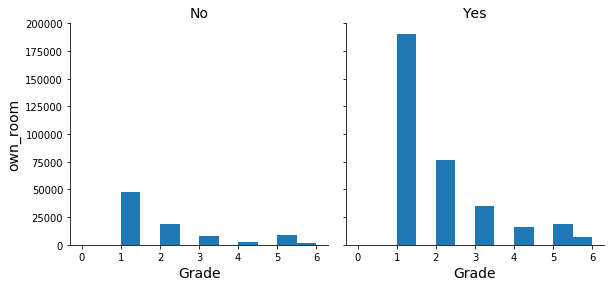

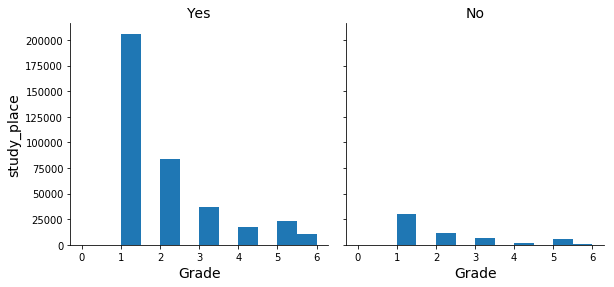

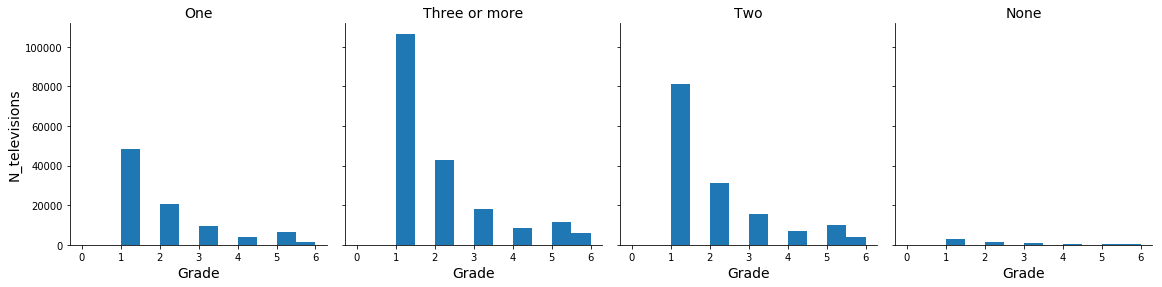

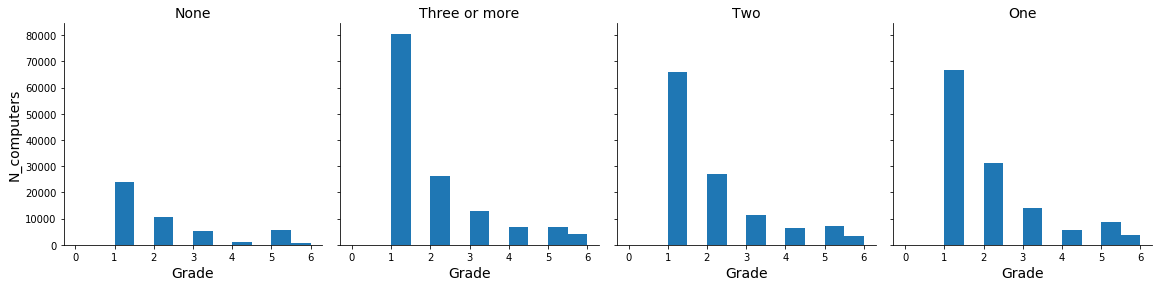

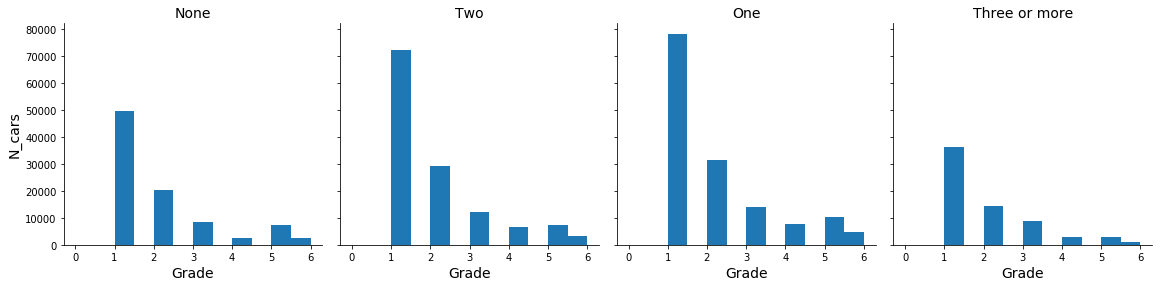

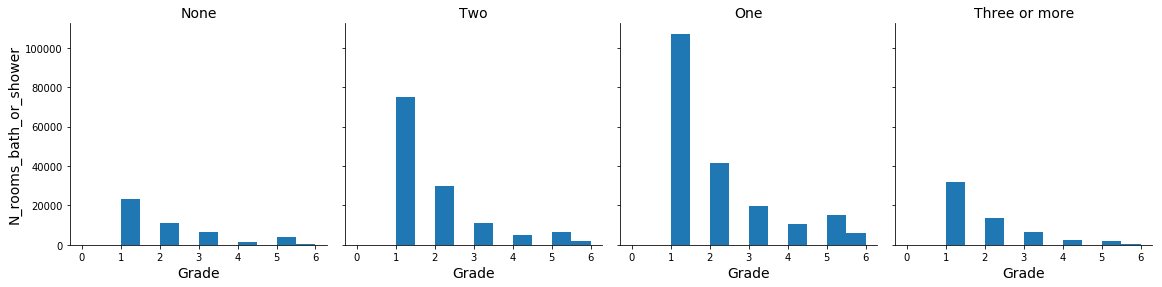

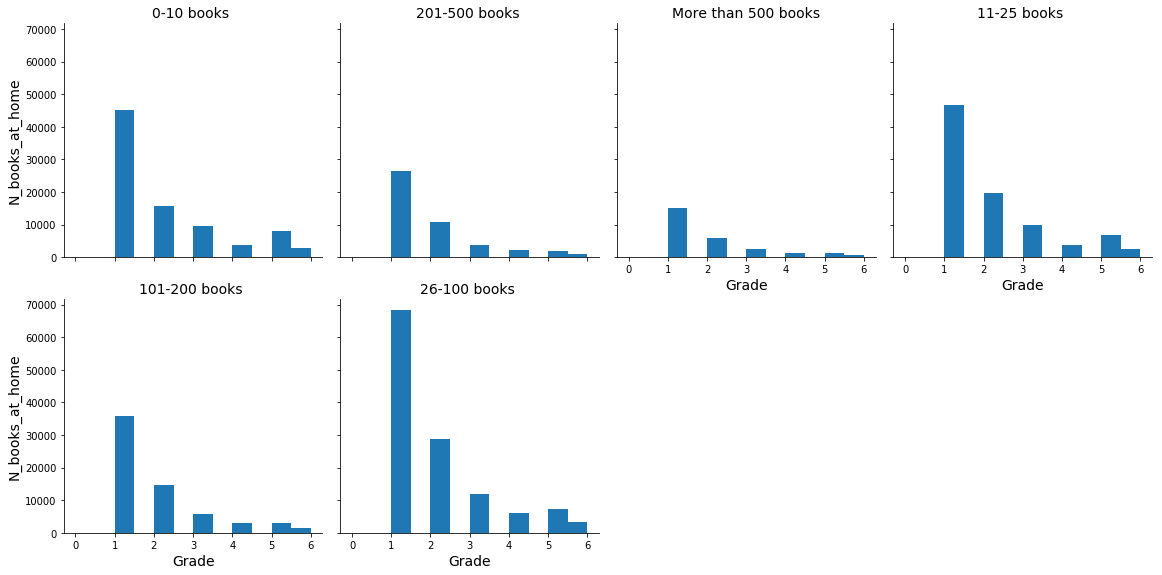

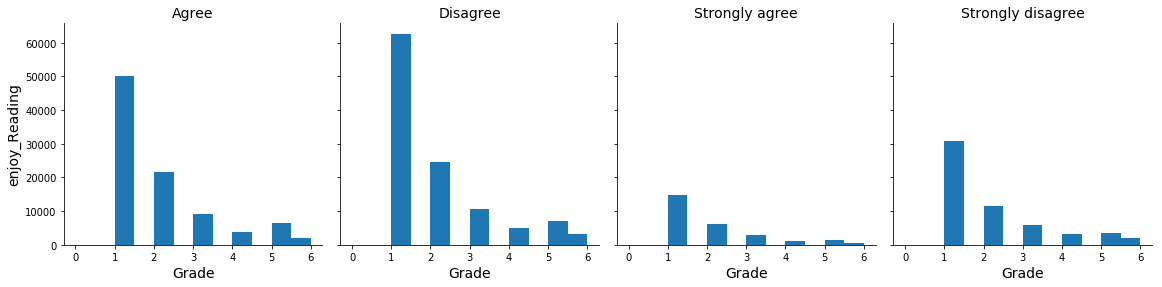

In [108]:
make_dist(facilities_col[1:], facilities_df_clean)

Facility helps to get high grades, but the urgent one only (internet, pc, laptop, cell phone)
Reading doesn't affects the grades as well as number of books at home 

#### Does the gender affect the grade?

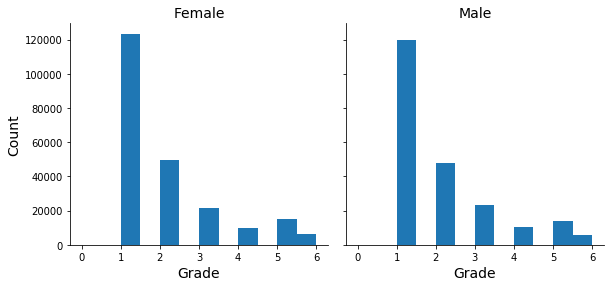

In [109]:
group_means = pisa_df.groupby(["ST04Q01"]).mean()
group_order = group_means.sort_values(['ST02Q01'], ascending = False).index

g = sb.FacetGrid(data = pisa_df, col = "ST04Q01", col_wrap = 4, height = 4)
g.map(plt.hist, "ST02Q01",  bins = np.arange(0, 6+0.5, 0.5))
g.set_ylabels("Count", size=14)
g.set_xlabels("Grade", size=14)

g.set_titles('{col_name}', size=14)


No bias between gender

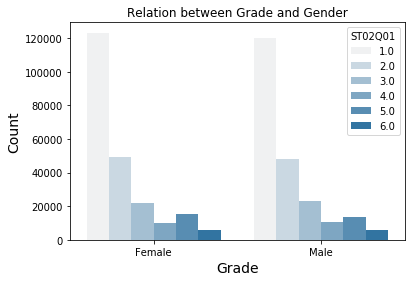

In [110]:
sb.countplot(data = pisa_df, x = 'ST04Q01', hue = 'ST02Q01', color=default_color)

# Set label
plt.xlabel("Grade", size=14);
plt.ylabel("Count", size=14);

# Set title
plt.title("Relation between Grade and Gender");

Gender doesn't affect the grade

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Good believes, good thoughts about school and self confident lead to high grades and bad believes leads to poor grades
* Effort has a positive relation with grades
* Relationship with teachers is positive correlation with grades and teachers have a great role in high grades
* The outsiders get lower mark, belonging to school and making friends easily lead to high grades.
* Psychological state affect the grade
* Parents beliefs affects students grades

* You should study the most important, improve understanding, put a learning goal and finally repeat examples


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Most of the data are categorical and the numerical one has weak relation with grade so they won't be explored further.There was a relation between student efforts and grades more efforts appear to have slightly better grades


<span id="Multi"></span>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### what is the effect of completing homework on time and work hard on it?

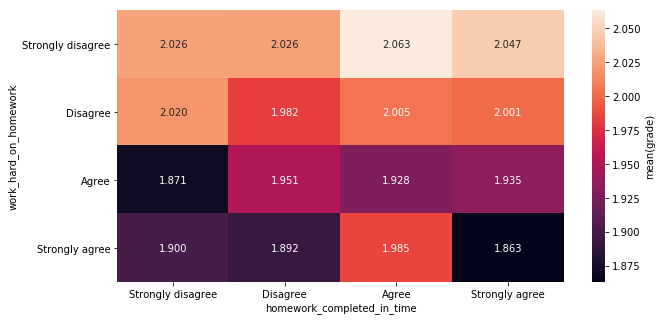

In [111]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = agree_disagree_df_clean.groupby(['homework_completed_in_time', 'work_hard_on_homework']).mean()['grade']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'work_hard_on_homework', columns = 'homework_completed_in_time',
                            values = 'grade_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});



Students who completed HW on time but doesn't work hard on it get the highest mark.

Let's see the relation between taking hw everyday and completing in time
Since, they are from different tables we will use `pisa__df` to use both

In [187]:
# Let's order them first 
var=["Strongly disagree", "Disagree", "Agree", "Strongly agree"]
cols=["ST46Q01", "ST46Q02", "ST46Q03", "ST46Q04", "ST46Q05", "ST46Q06", "ST46Q07", "ST46Q08", "ST46Q09", 
      "ST82Q01", "ST82Q02", "ST82Q03", "ST83Q01"]   

for col in cols:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
    pisa_df[col] = pisa_df[col].astype(ordered_var)


In [113]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");

Student who complete homework in time with teacher giving homework everyday back in time gets higher grades.

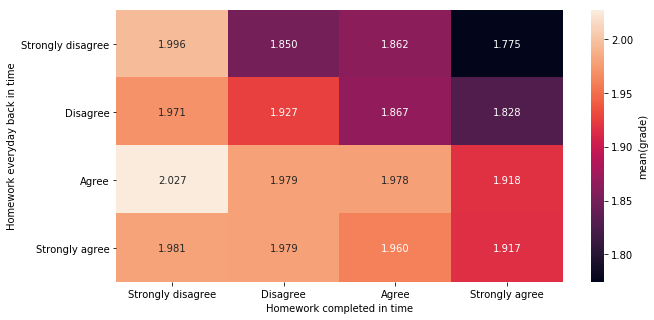

In [114]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q01', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q01',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Homework completed in time");

Teacher who gives H.W. everyday back in time with student complete it in time get higher grades 

In [115]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");

Text(0.5, 0, 'Homework completed in time')

From the previous chart it is obvious that students who take Hw everyday and complete it in time get the highest grade 

#### What about students  who took homework Once a Week/Back in Time and completed in time

In [116]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q02',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework Once a Week/Back in Time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");

Homework once a week back in time get higher grades than everyday <br>
Student who didn't complete homework even took it once a week not back in time or not get an average grade<br>


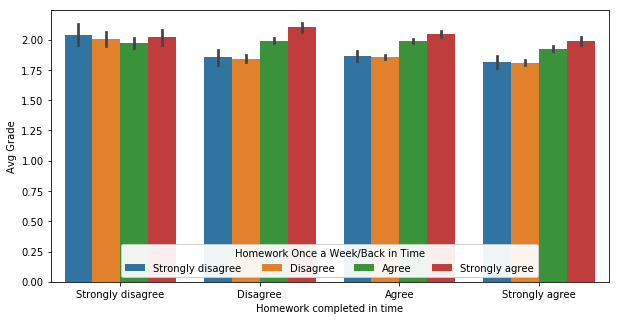

In [117]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q02')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 20, title = 'Homework Once a Week/Back in Time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");

Student who complete homework in time with teacher giving homework once a week back in time gets higher grades.

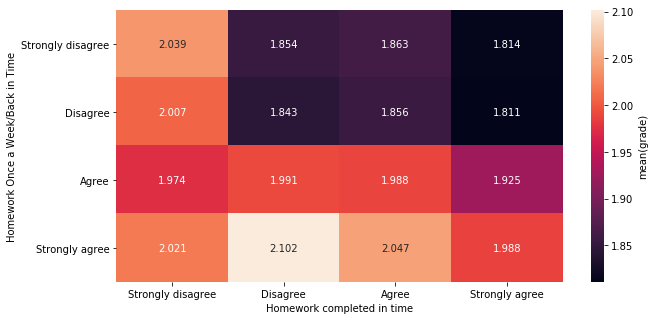

In [118]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q01', 'ST82Q02']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q02', columns = 'ST46Q01',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework Once a Week/Back in Time")
plt.xlabel("Homework completed in time");

There is a strong correlation between HW/Week back in time and high grade wheather complete it or not

#### What about students  who took homework Once a Week/Not Back in Time and completed in time

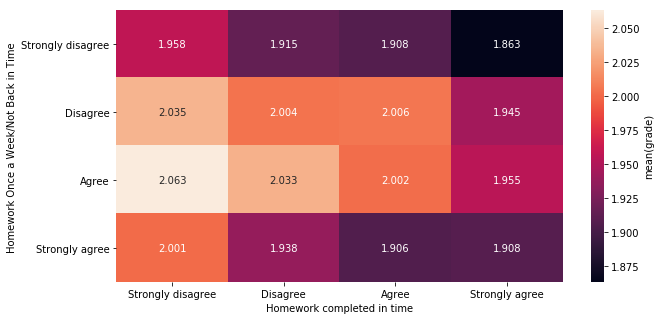

In [119]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q01', 'ST82Q03']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q03', columns = 'ST46Q01',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework Once a Week/Not Back in Time ")
plt.xlabel("Homework completed in time");

There is a strong correlation between students who doesn't take HW/Week not back in time or took it but not always or back in time and high grade wheather complete it or not but if the student complete it the grade increases.

In [120]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q03')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 20, title = 'Homework Once a Week/Not Back in Time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time");

Student who complete homework in time with teacher giving homework once a week not back in time gets lower grades.

In [121]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST82Q03',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework Once a Week/Not Back in Time ');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time")

Text(0.5, 0, 'Homework completed in time')

Student who didn't take homework once a week not back in time and complete it or not get high grade but who complete it get higher grade


#### What about teachers that encourage the students and students completed homework  in time

In [122]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q01', 'ST83Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST83Q01', columns = 'ST46Q01',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Lets Us Know We Have to Work Hard")
plt.xlabel("Homework completed in time");

Teacher who didn't let student know that they should to work hard with the student who completed homework in time get highest grades

In [123]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q01', y = 'ST02Q01', hue = 'ST83Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Lets Us Know We Have to Work Hard');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Homework completed in time")

Text(0.5, 0, 'Homework completed in time')

Teacher who let student know that they should to work hard get the worst grade and teacher who didn't make them get highest grades.

#### Does student who works hard on homework and took homework everyday/Back in Time

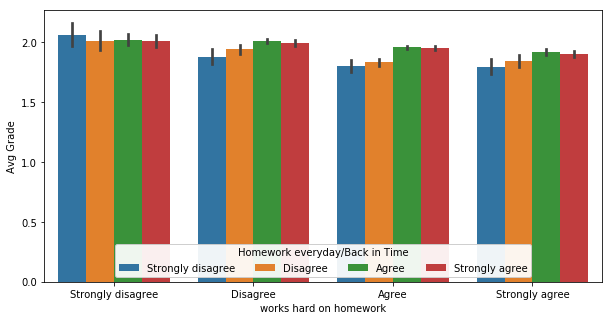

In [124]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q02', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 20, title = 'Homework everyday/Back in Time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("works hard on homework");

Student who doesn't work hard on homework gets highest mark whether took homework everyday or not

In [125]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q02', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q02',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday/Back in Time")
plt.xlabel("works hard on homework");

As student works harder on the homework get lower mark 

#### Does student who prepared for exams and took homework everyday Back in Time

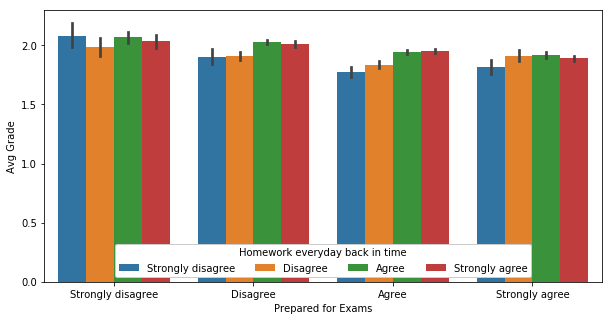

In [126]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Student who prepare for exam with teacher giving homework everyday back in time gets higher grades.

In [127]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q03', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q03',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Prepared for Exams");

Students who took homework everyday back in time got higher grades regardless prepared for exam or not

#### Does student who prepared for exams and took homework once a week/ Back in Time

In [134]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST82Q02')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework once a week back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Student who prepares for exams with teacher giving homework once a week back in time gets higher grades.

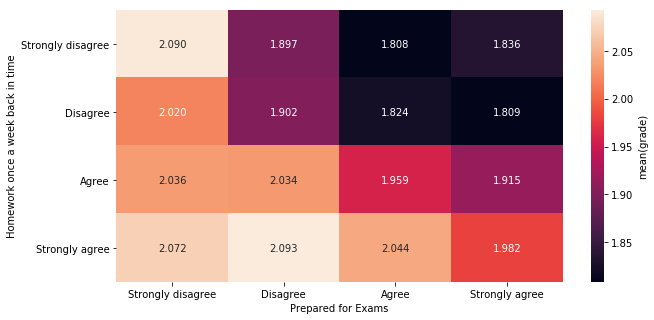

In [135]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q03', 'ST82Q02']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q02', columns = 'ST46Q03',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework once a week back in time")
plt.xlabel("Prepared for Exams");

Students who took homework once a week back in time got higher grades as they deosn't prepare for exam

Text(0.5, 0, 'Prepared for Exams')

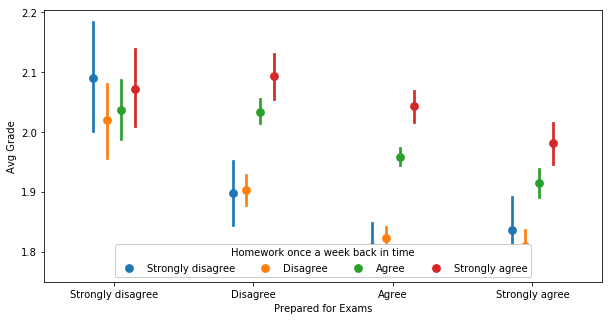

In [152]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST82Q02',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework once a week back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams")

Students who prepared for exams got high marks regardless took homework once a week or not

#### Does student who prepared for exams and took homework once a week/ Not Back in Time

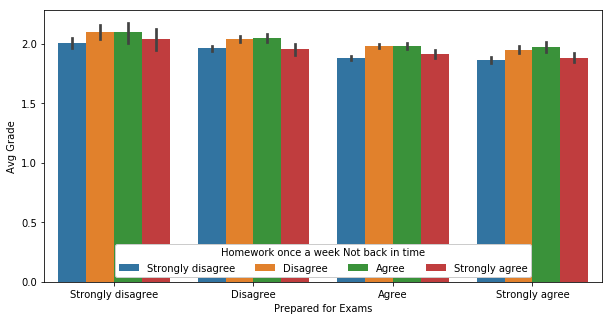

In [139]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST82Q03')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework once a week Not back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Student who prepare for exam with teacher giving homework everyday not back in time gets lower grades.

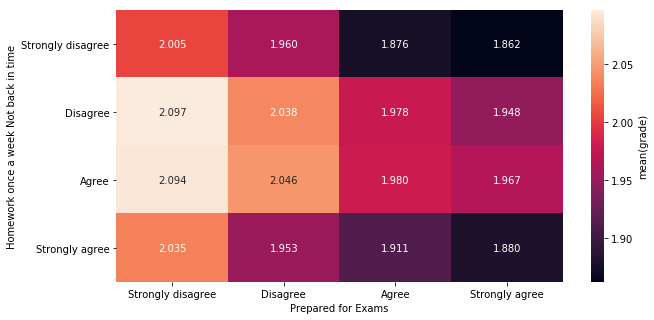

In [140]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q03', 'ST82Q03']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q03', columns = 'ST46Q03',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework once a week Not back in time")
plt.xlabel("Prepared for Exams");

Students who often took homework everyday not back in time got higher grades regardless prepared for exam or not

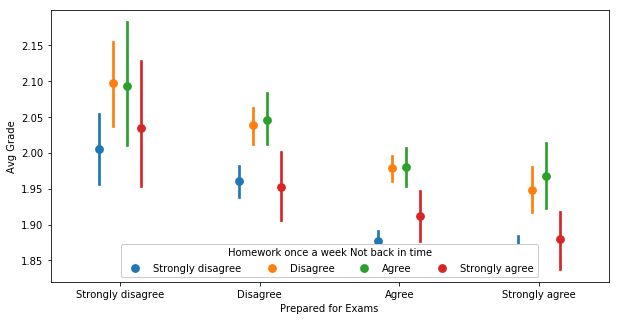

In [151]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST82Q03',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework once a week Not back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Students who not always or never took homework once a week got higher grades regardless prepared for exams or not

#### What about teachers that encourage the students and students prepare for exams

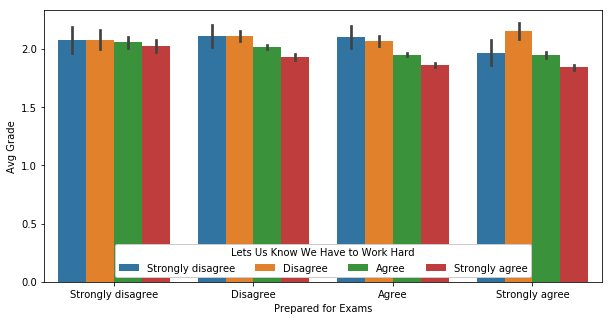

In [147]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST83Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Lets Us Know We Have to Work Hard');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Student who prepare for exam with teacher lets them Know they have to work hard gets lower grades.

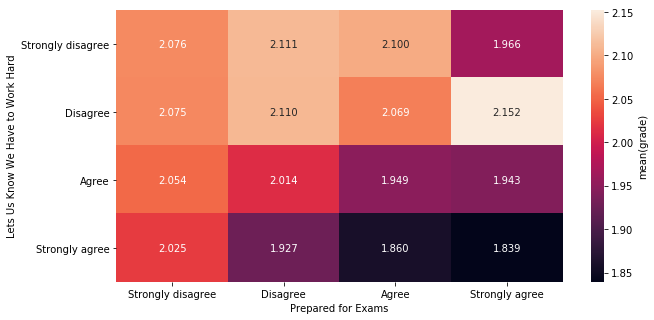

In [148]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q03', 'ST83Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST83Q01', columns = 'ST46Q03',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Lets Us Know We Have to Work Hard")
plt.xlabel("Prepared for Exams");

Students whose teacher lets them Know they have to work hard and don't prepared for exams got higher grades

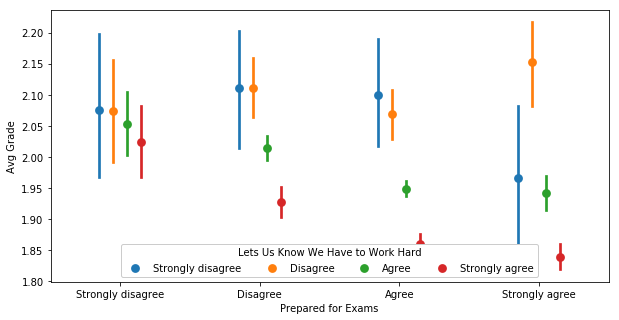

In [150]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q03', y = 'ST02Q01', hue = 'ST83Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Lets Us Know We Have to Work Hard');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Prepared for Exams");

Teachers that don't lets student Know that they have to work hard their students get higher grades regardless prepared for exams or not

#### Does studying hard with homework everyday leads to high grades?

In [156]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q04', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Study hard for quizzes");

Teachers who gives homework everyday leads to high grades regardless students study hard for quiz or not

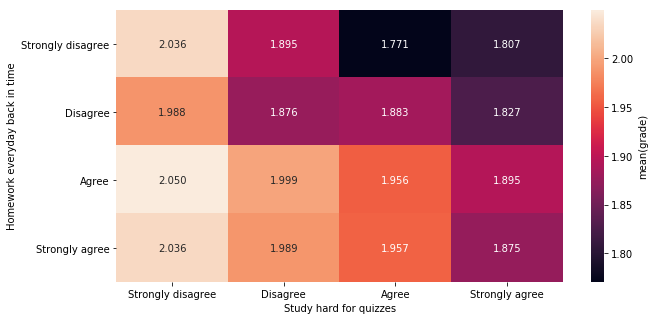

In [159]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q04', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q04',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Study hard for quizzes");

High grades is positive correlation with doesn't study hard

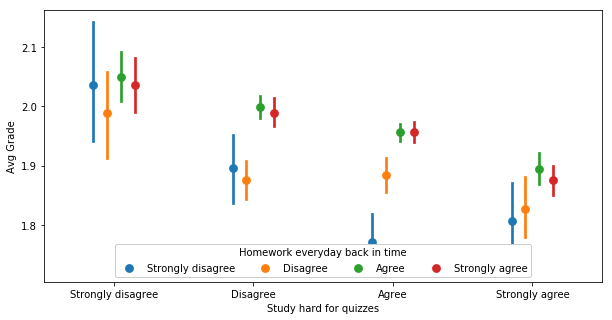

In [158]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q04', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Study hard for quizzes");

Students who study hard got higher grades and in the heatmap the correlation may be because at students who don't study hard and got the highest grades this may be an outliers

#### Does studying until understand with homework everyday leads to high grades?

In [160]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q05', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Study until I understand everything");

Teachers who gives homework everyday leads to high grades regardless students study hard for quiz or not

In [163]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q05', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q05',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Study until I understand everything");

High grades is positive correlation with doesn't study until they understand

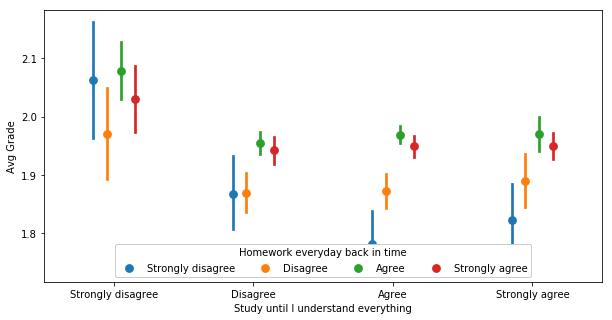

In [164]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q05', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Study until I understand everything");

Students who study until they understand got higher grades and in the heatmap the correlation may be because at students who don't study until they understand and got the highest grades this may be an outliers

#### Does paying attention in classes with homework everyday leads to high grades?

In [176]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q06', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Pay attention in classes");

Teachers who gives homework everyday leads to high grades regardless students study hard for quiz or not

In [166]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q06', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q06',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Pay attention in classes");

High grades is positive correlation with doesn't study until they understand

In [168]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q06', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Pay attention in classes");

Students who are paying attention in classes got higher grades and in the heatmap the correlation may be because at students who are paying attention and got the highest grades this may be an outliers

#### Does listening in class with homework everyday leads to high grades?

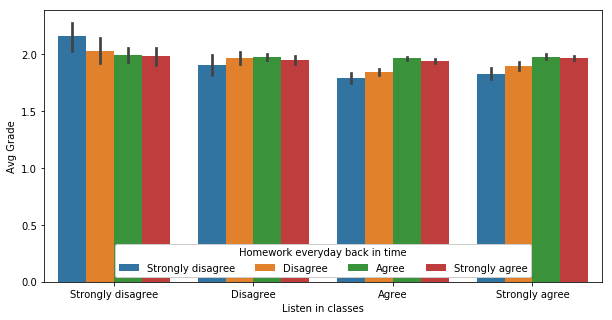

In [177]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q07', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Listen in classes");

Teachers who gives homework every day get leads to high grades regardless students study hard for quiz or not

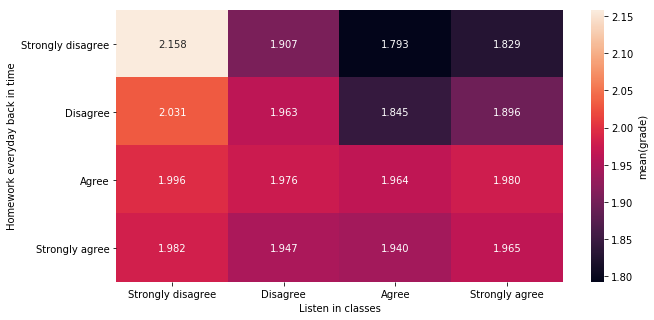

In [178]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q07', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q07',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Listen in classes");

High grades is positive correlation with homework everyday

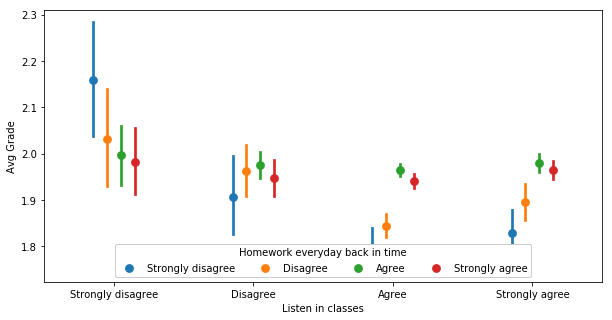

In [179]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q07', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Listen in classes");

Students who listen in class got higher grades and in the heatmap the correlation may be because at students who don't listen in class and got the highest grades this may be an outliers

#### Does avoid distractions when studying with homework everyday leads to high grades?

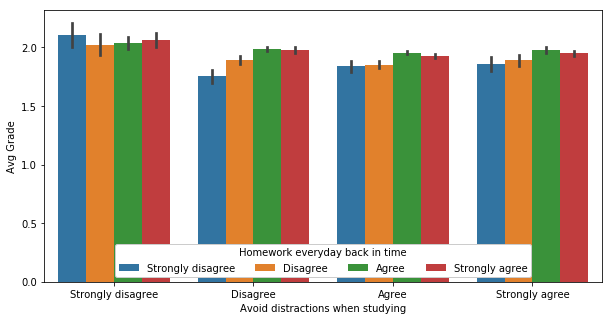

In [180]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q08', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Avoid distractions when studying");

Teachers who gives homework everyday leads to high grades regardless students avoid distractions or not

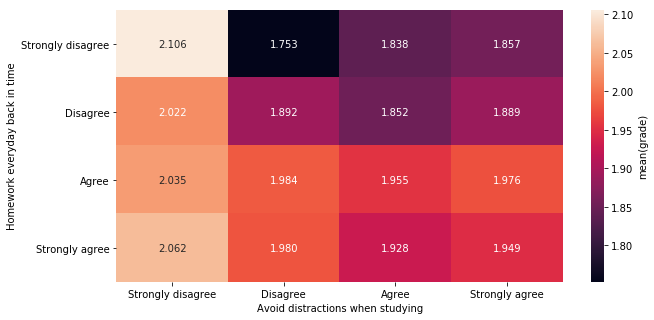

In [182]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q08', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q08',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Avoid distractions when studying");

High grades is positive correlation with doesn't avoiding distractions when studying

In [183]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q08', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Avoid distractions when studying");

Students who avoid distractions when studying got higher grades and in the heatmap the correlation may be because at students who don't avoid distractions and got the highest grades this may be an outliers

#### Does keep workorganized with homework everyday leads to high grades?

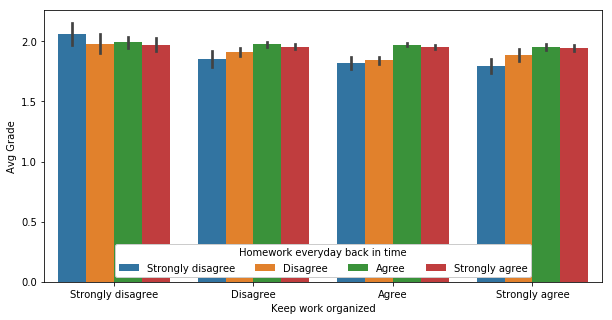

In [184]:
# Let's draw realtion in bar chart
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.barplot(data = pisa_df, x = 'ST46Q09', y = 'ST02Q01', hue = 'ST82Q01')

# Set the legend
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Keep work organized");

Teachers who gives homework every day get higher grades regardless students keep work organized or not

In [185]:
# Let's draw realtion in heatmap
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

cat_means = pisa_df.groupby(['ST46Q09', 'ST82Q01']).mean()['ST02Q01']
cat_means = cat_means.reset_index(name = 'grade_avg')
cat_means = cat_means.pivot(index = 'ST82Q01', columns = 'ST46Q09',
                            values = 'grade_avg')

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(grade)'});

# Set the labels
plt.ylabel("Homework everyday back in time")
plt.xlabel("Keep work organized");

High grades is positive correlation with student who isn't organized

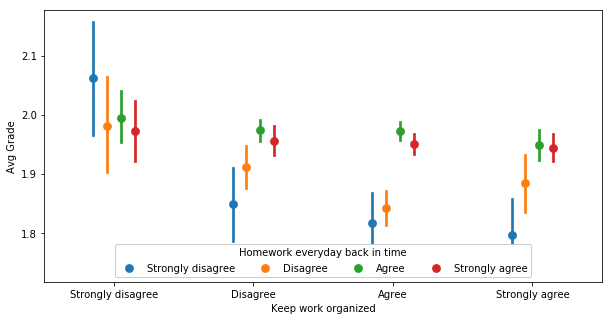

In [186]:
# Let's draw realtion in pointplot
# Change figure size to be bigger
fig=plt.figure(figsize=[10, 5])

ax = sb.pointplot(data = pisa_df, x = 'ST46Q09', y = 'ST02Q01', hue = 'ST82Q01',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Homework everyday back in time');

# Set the labels
ax.set_ylabel("Avg Grade")
ax.set_xlabel("Keep work organized");

Students who keep work organized got higher grades and in the heatmap the correlation may be because at students who don't keep work organized and got the highest grades this may be an outliers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* Students who take homework everyday and complete it in time get the highest grade
* There is a strong correlation between HW/Week and high grade wheather complete it or not
* Homework once a week back in time get higher grades than everyday
* Completing the homework is important to get high grade
* Student who takes homework(study) everyday gets higher grades regardless prepared for exam or not


### Were there any interesting or surprising interactions between features?
As assignment increases the grade increases but if it increases too much the grade starts to decrease, also teacher who let student know that they should to work hard get the worst grade and teacher who didn't make them get highest grades.


In [133]:
# Let's save our cleaned data 
agree_disagree_df_clean.to_csv("agree_disagree_df_clean.csv")
teacher_roles_df_clean.to_csv("teacher_roles_df_clean.csv")
student_roles_df_clean.to_csv("student_roles_df_clean.csv")
facilities_df_clean.to_csv("facilities_df_clean.csv")